In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
weather_data = pd.read_csv("../FomaldihydeAnalysis/OtherData/3645245.csv"
                          ,parse_dates=["DATE"])

In [4]:
weather_data.head()

STATION            NAME  LATITUDE  LONGITUDE  ELEVATION       DATE  \
0  CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0 2019-01-02   
1  CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0 2019-01-03   
2  CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0 2019-01-04   
3  CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0 2019-01-05   
4  CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0 2019-01-06   

   PRCP PRCP_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  TMAX TMAX_ATTRIBUTES  TMIN  \
0   0.0             ,,S    78            H,,S   NaN             NaN  72.0   
1   0.0             ,,S    81            H,,S  87.0             ,,S  71.0   
2   0.0             ,,S    83            H,,S  88.0             ,,S  69.0   
3   0.0             ,,S    84            H,,S  90.0             ,,S  65.0   
4   0.0             ,,S    82            H,,S  88.0             ,,S  71.0   

  TMIN_ATTRIBUTES  
0             ,,S  
1             ,,S  
2             ,,S  
3             ,,S  
4             ,,S

In [5]:
weather_data.drop(columns=["STATION", "PRCP_ATTRIBUTES", "TAVG_ATTRIBUTES", "TMAX_ATTRIBUTES", "TMIN_ATTRIBUTES"], inplace=True)

In [6]:
weather_data.head()

NAME  LATITUDE  LONGITUDE  ELEVATION       DATE  PRCP  TAVG  \
0  KURUNEGALA, CE     7.467     80.367      116.0 2019-01-02   0.0    78   
1  KURUNEGALA, CE     7.467     80.367      116.0 2019-01-03   0.0    81   
2  KURUNEGALA, CE     7.467     80.367      116.0 2019-01-04   0.0    83   
3  KURUNEGALA, CE     7.467     80.367      116.0 2019-01-05   0.0    84   
4  KURUNEGALA, CE     7.467     80.367      116.0 2019-01-06   0.0    82   

   TMAX  TMIN  
0   NaN  72.0  
1  87.0  71.0  
2  88.0  69.0  
3  90.0  65.0  
4  88.0  71.0

In [7]:
weather_data["NAME"].unique()

array(['KURUNEGALA, CE', 'COLOMBO, CE', 'NUWARA ELIYA, CE'], dtype=object)

In [8]:
weather_data.rename(columns={"NAME": "Region"}, inplace=True)

def update_region(x):
    if x == "KURUNEGALA, CE":
        return "Kurunegala Proper"
    elif x == "COLOMBO, CE":
        return "Colombo Proper"
    elif x == "NUWARA ELIYA, CE":
        return "Nuwara Eliya Proper"
    else:
        return x

weather_data["Region"] = weather_data["Region"].apply(update_region)

In [9]:
weather_data["DATE"].max() , weather_data["DATE"].min()

(Timestamp('2024-01-01 00:00:00'), Timestamp('2019-01-01 00:00:00'))

In [10]:
weather_data.head()

Region  LATITUDE  LONGITUDE  ELEVATION       DATE  PRCP  TAVG  \
0  Kurunegala Proper     7.467     80.367      116.0 2019-01-02   0.0    78   
1  Kurunegala Proper     7.467     80.367      116.0 2019-01-03   0.0    81   
2  Kurunegala Proper     7.467     80.367      116.0 2019-01-04   0.0    83   
3  Kurunegala Proper     7.467     80.367      116.0 2019-01-05   0.0    84   
4  Kurunegala Proper     7.467     80.367      116.0 2019-01-06   0.0    82   

   TMAX  TMIN  
0   NaN  72.0  
1  87.0  71.0  
2  88.0  69.0  
3  90.0  65.0  
4  88.0  71.0

In [11]:
weather_kurunegala = weather_data[weather_data["Region"] == "Kurunegala Proper"]
weather_nuwara_eliya = weather_data[weather_data["Region"] == "Nuwara Eliya Proper"]
weather_colombo = weather_data[weather_data["Region"] == "Colombo Proper"]

## Kurunegala Weather Analysis

In [12]:
weather_kurunegala.head()

Region  LATITUDE  LONGITUDE  ELEVATION       DATE  PRCP  TAVG  \
0  Kurunegala Proper     7.467     80.367      116.0 2019-01-02   0.0    78   
1  Kurunegala Proper     7.467     80.367      116.0 2019-01-03   0.0    81   
2  Kurunegala Proper     7.467     80.367      116.0 2019-01-04   0.0    83   
3  Kurunegala Proper     7.467     80.367      116.0 2019-01-05   0.0    84   
4  Kurunegala Proper     7.467     80.367      116.0 2019-01-06   0.0    82   

   TMAX  TMIN  
0   NaN  72.0  
1  87.0  71.0  
2  88.0  69.0  
3  90.0  65.0  
4  88.0  71.0

In [13]:
weather_kurunegala.shape

(1705, 9)

In [14]:
weather_kurunegala.isnull().sum()

Region         0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
PRCP           3
TAVG           0
TMAX         160
TMIN         266
dtype: int64

In [15]:
# Create a DataFrame with a single row containing the date "2019-01-01"
new_row = pd.DataFrame({'DATE': ['2019-01-01']})

# Convert 'DATE' column to datetime
new_row['DATE'] = pd.to_datetime(new_row['DATE'])

# Concatenate the new row with the original DataFrame
weather_kurunegala = pd.concat([new_row, weather_kurunegala], ignore_index=True)

# Set 'DATE' column as the index
weather_kurunegala['DATE'] = pd.to_datetime(weather_kurunegala['DATE'])
weather_kurunegala.set_index('DATE', inplace=True)

# Reindex the DataFrame with a complete date range
full_date_range = pd.date_range(start=weather_kurunegala.index.min(), end=weather_kurunegala.index.max(), freq='D')
weather_kurunegala = weather_kurunegala.reindex(full_date_range)

# Reset index to remove 'DATE' as index and restore it as a column
weather_kurunegala.reset_index(inplace=True)

In [16]:
weather_kurunegala.shape

(1827, 9)

In [17]:
weather_kurunegala.head()

index             Region  LATITUDE  LONGITUDE  ELEVATION  PRCP  TAVG  \
0 2019-01-01                NaN       NaN        NaN        NaN   NaN   NaN   
1 2019-01-02  Kurunegala Proper     7.467     80.367      116.0   0.0  78.0   
2 2019-01-03  Kurunegala Proper     7.467     80.367      116.0   0.0  81.0   
3 2019-01-04  Kurunegala Proper     7.467     80.367      116.0   0.0  83.0   
4 2019-01-05  Kurunegala Proper     7.467     80.367      116.0   0.0  84.0   

   TMAX  TMIN  
0   NaN   NaN  
1   NaN  72.0  
2  87.0  71.0  
3  88.0  69.0  
4  90.0  65.0

In [18]:
weather_kurunegala["DATE"] = weather_kurunegala["index"]
weather_kurunegala.drop(columns=["index"], inplace=True)

In [19]:
weather_kurunegala.describe()

LATITUDE     LONGITUDE  ELEVATION         PRCP         TAVG  \
count  1.705000e+03  1.705000e+03     1705.0  1702.000000  1705.000000   
mean   7.467000e+00  8.036700e+01      116.0     0.239565    81.655132   
min    7.467000e+00  8.036700e+01      116.0     0.000000    69.000000   
25%    7.467000e+00  8.036700e+01      116.0     0.000000    80.000000   
50%    7.467000e+00  8.036700e+01      116.0     0.000000    82.000000   
75%    7.467000e+00  8.036700e+01      116.0     0.180000    83.000000   
max    7.467000e+00  8.036700e+01      116.0     7.430000    92.000000   
std    8.884390e-16  1.421502e-14        0.0     0.597408     2.706194   

              TMAX         TMIN                 DATE  
count  1545.000000  1439.000000                 1827  
mean     89.972168    74.627519  2021-07-02 00:00:00  
min      77.000000    63.000000  2019-01-01 00:00:00  
25%      88.000000    73.000000  2020-04-01 12:00:00  
50%      90.000000    75.000000  2021-07-02 00:00:00  
75%      92.000000    76.000000  2022-10-01 12:00:00  
max     101.000000    81.000000  2024-01-01 00:00:00  
std       3.776959     2.630773                  NaN

In [20]:
weather_kurunegala.isnull().sum()

Region       122
LATITUDE     122
LONGITUDE    122
ELEVATION    122
PRCP         125
TAVG         122
TMAX         282
TMIN         388
DATE           0
dtype: int64

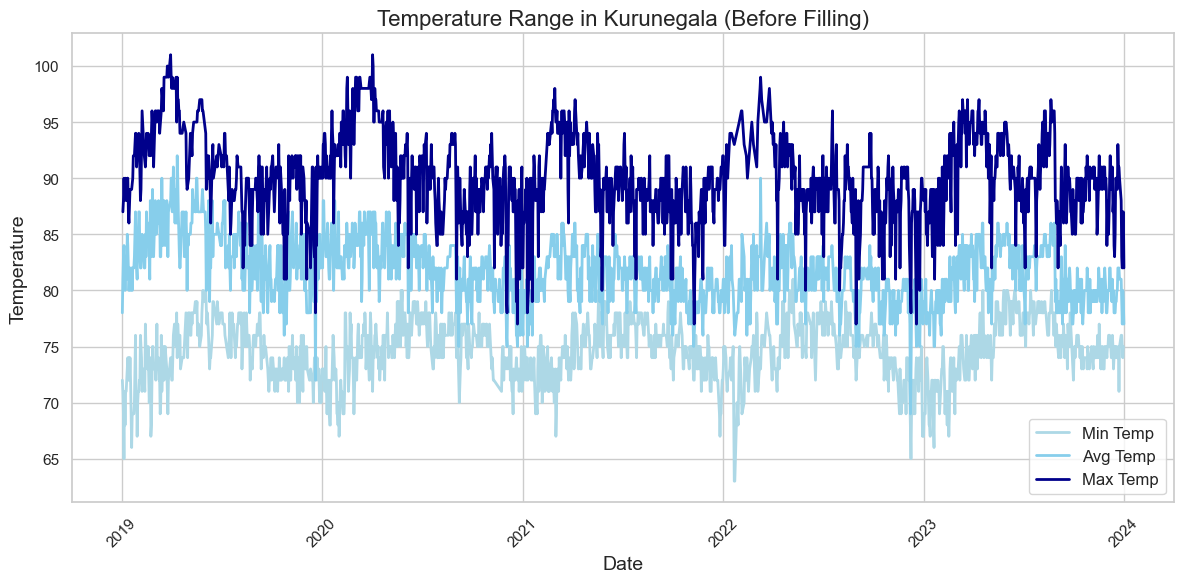

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_kurunegala, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_kurunegala, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_kurunegala, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Kurunegala (Before Filling)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [22]:
weather_kurunegala['PRCP'] = weather_kurunegala['PRCP'].fillna(weather_kurunegala['PRCP'].rolling(3, min_periods=1).mean())
weather_kurunegala["PRCP"] = weather_kurunegala["PRCP"].fillna(method="ffill")
weather_kurunegala["PRCP"] = weather_kurunegala["PRCP"].fillna(method="bfill")

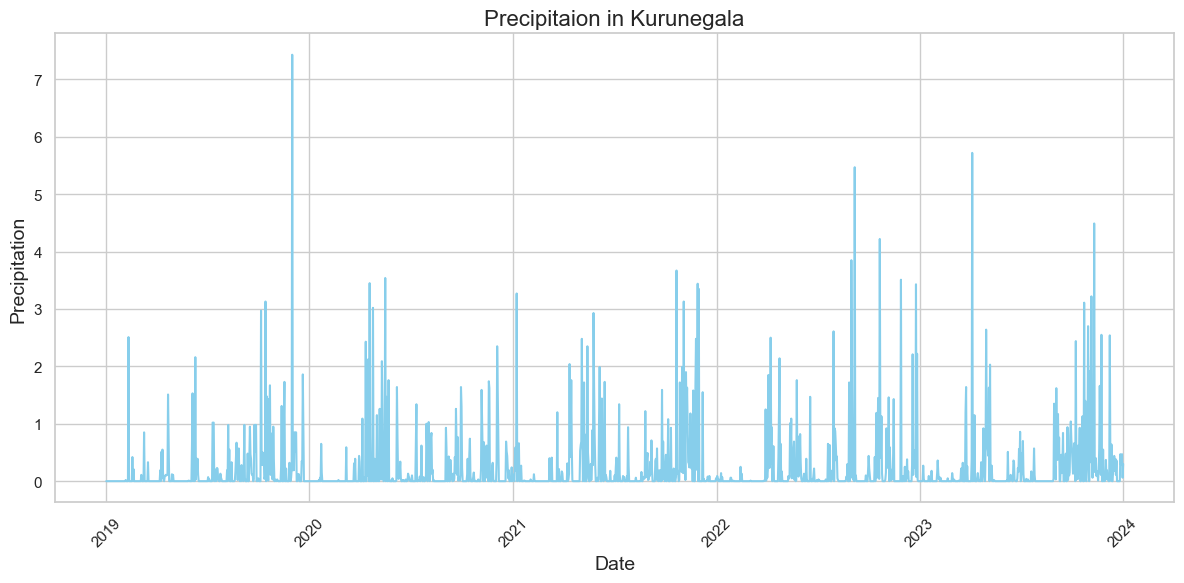

In [23]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_kurunegala['DATE'], weather_kurunegala['PRCP'], linestyle='-', color='skyblue')


plt.title('Precipitaion in Kurunegala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
weather_kurunegala['TMAX'] = weather_kurunegala['TMAX'].fillna(weather_kurunegala['TMAX'].rolling(3, min_periods=1).mean())
weather_kurunegala["TMAX"] = weather_kurunegala["TMAX"].fillna(method="ffill")
weather_kurunegala["TMAX"] = weather_kurunegala["TMAX"].fillna(method="bfill")

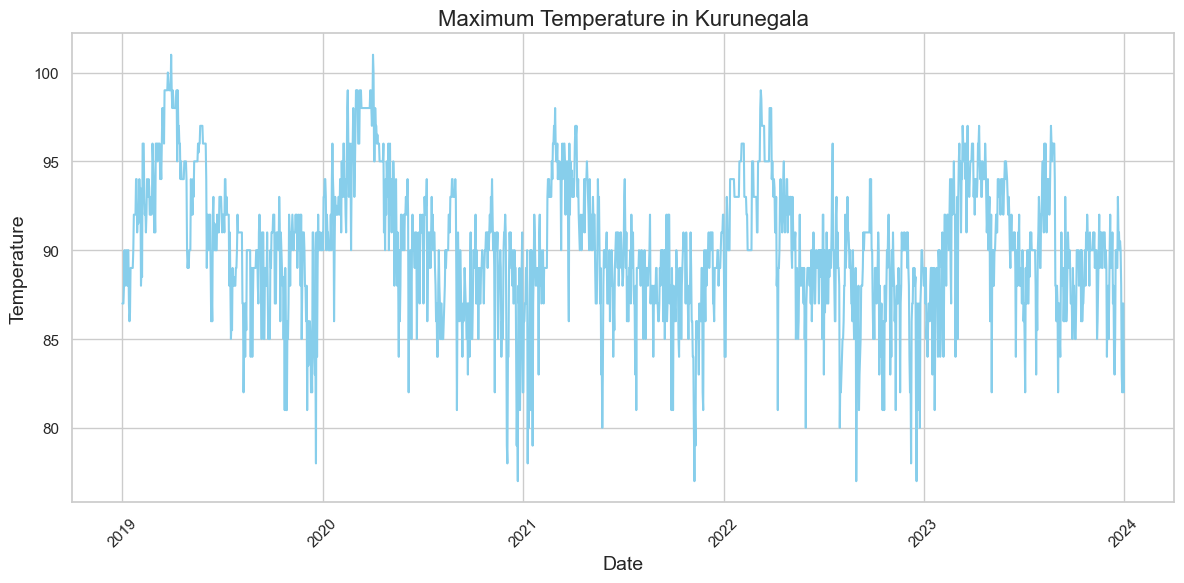

In [25]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_kurunegala['DATE'], weather_kurunegala['TMAX'], linestyle='-', color='skyblue')


plt.title('Maximum Temperature in Kurunegala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
weather_kurunegala.isnull().sum()

Region       122
LATITUDE     122
LONGITUDE    122
ELEVATION    122
PRCP           0
TAVG         122
TMAX           0
TMIN         388
DATE           0
dtype: int64

In [27]:
weather_kurunegala['TMIN'] = weather_kurunegala['TMIN'].fillna(weather_kurunegala['TMIN'].rolling(3, min_periods=1).mean())
weather_kurunegala["TMIN"] = weather_kurunegala["TMIN"].fillna(method="ffill")
weather_kurunegala["TMIN"] = weather_kurunegala["TMIN"].fillna(method="bfill")

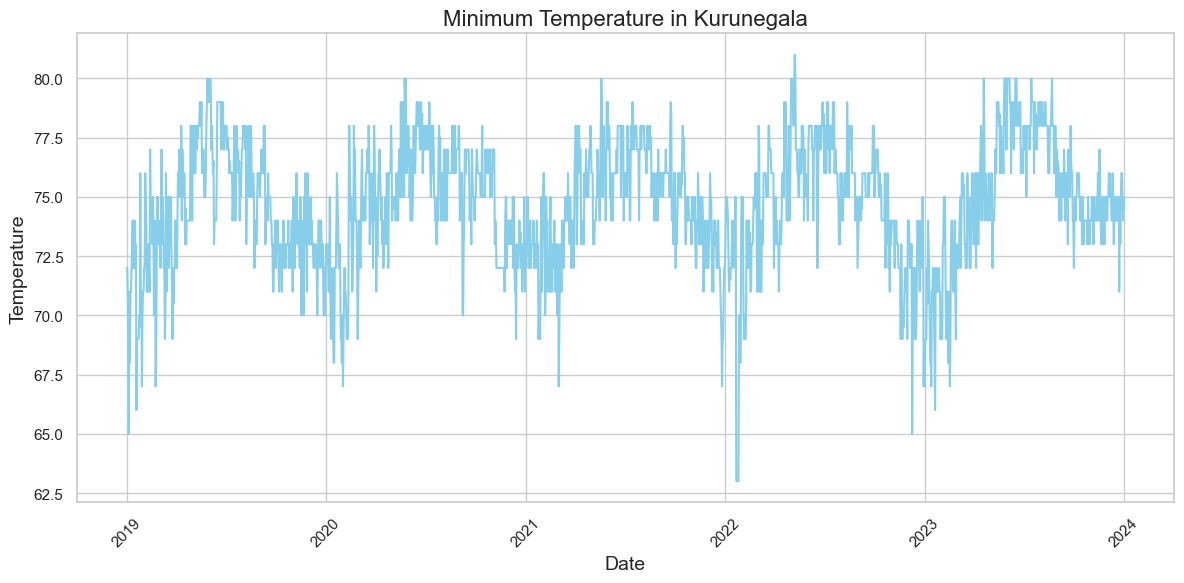

In [28]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_kurunegala['DATE'], weather_kurunegala['TMIN'], linestyle='-', color='skyblue')


plt.title('Minimum Temperature in Kurunegala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
weather_kurunegala['TAVG'] = weather_kurunegala['TAVG'].fillna(weather_kurunegala['TAVG'].rolling(3, min_periods=1).mean())
weather_kurunegala["TAVG"] = weather_kurunegala["TAVG"].fillna(method="ffill")
weather_kurunegala["TAVG"] = weather_kurunegala["TAVG"].fillna(method="bfill")

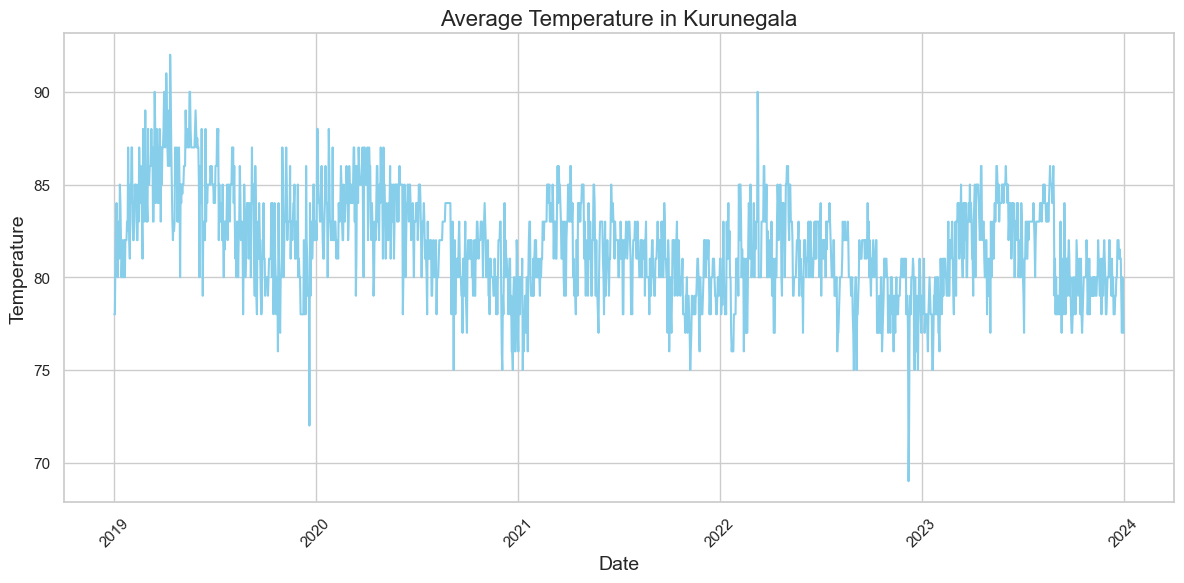

In [30]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_kurunegala['DATE'], weather_kurunegala['TAVG'], linestyle='-', color='skyblue')


plt.title('Average Temperature in Kurunegala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
latitude_value = weather_kurunegala["LATITUDE"].mean()
longitude_value = weather_kurunegala["LONGITUDE"].mean()
elevation_value = weather_kurunegala["ELEVATION"].mean()
region_value = "Kurunegala Proper"

weather_kurunegala["LATITUDE"] =  weather_kurunegala["LATITUDE"].apply(lambda x : latitude_value)
weather_kurunegala["LONGITUDE"] = weather_kurunegala["LONGITUDE"].apply(lambda x : longitude_value)
weather_kurunegala["ELEVATION"] = weather_kurunegala["ELEVATION"].apply(lambda x : elevation_value)
weather_kurunegala["Region"] =  weather_kurunegala["Region"].apply(lambda x : region_value)

In [32]:
weather_kurunegala.isnull().sum()

Region       0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
PRCP         0
TAVG         0
TMAX         0
TMIN         0
DATE         0
dtype: int64

In [33]:
weather_kurunegala.head()

Region  LATITUDE  LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  TMIN  \
0  Kurunegala Proper     7.467     80.367      116.0   0.0  78.0  87.0  72.0   
1  Kurunegala Proper     7.467     80.367      116.0   0.0  78.0  87.0  72.0   
2  Kurunegala Proper     7.467     80.367      116.0   0.0  81.0  87.0  71.0   
3  Kurunegala Proper     7.467     80.367      116.0   0.0  83.0  88.0  69.0   
4  Kurunegala Proper     7.467     80.367      116.0   0.0  84.0  90.0  65.0   

        DATE  
0 2019-01-01  
1 2019-01-02  
2 2019-01-03  
3 2019-01-04  
4 2019-01-05

In [34]:
weather_kurunegala.tail()

Region  LATITUDE  LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  \
1822  Kurunegala Proper     7.467     80.367      116.0  0.29  79.0  83.0   
1823  Kurunegala Proper     7.467     80.367      116.0  0.38  77.0  82.0   
1824  Kurunegala Proper     7.467     80.367      116.0  0.47  80.0  87.0   
1825  Kurunegala Proper     7.467     80.367      116.0  0.06  79.0  87.0   
1826  Kurunegala Proper     7.467     80.367      116.0  0.30  77.0  82.0   

      TMIN       DATE  
1822  76.0 2023-12-28  
1823  75.0 2023-12-29  
1824  74.0 2023-12-30  
1825  75.0 2023-12-31  
1826  74.5 2024-01-01

In [35]:
weather_kurunegala.describe()

LATITUDE     LONGITUDE  ELEVATION         PRCP         TAVG  \
count  1827.000  1.827000e+03     1827.0  1827.000000  1827.000000   
mean      7.467  8.036700e+01      116.0     0.228758    81.717843   
min       7.467  8.036700e+01      116.0     0.000000    69.000000   
25%       7.467  8.036700e+01      116.0     0.000000    80.000000   
50%       7.467  8.036700e+01      116.0     0.000000    82.000000   
75%       7.467  8.036700e+01      116.0     0.155000    83.000000   
max       7.467  8.036700e+01      116.0     7.430000    92.000000   
std       0.000  1.421475e-14        0.0     0.580994     2.728576   

              TMAX         TMIN                 DATE  
count  1827.000000  1827.000000                 1827  
mean     90.268199    74.693213  2021-07-02 00:00:00  
min      77.000000    63.000000  2019-01-01 00:00:00  
25%      88.000000    73.000000  2020-04-01 12:00:00  
50%      90.000000    75.000000  2021-07-02 00:00:00  
75%      93.000000    76.500000  2022-10-01 12:00:00  
max     101.000000    81.000000  2024-01-01 00:00:00  
std       3.847595     2.642105                  NaN

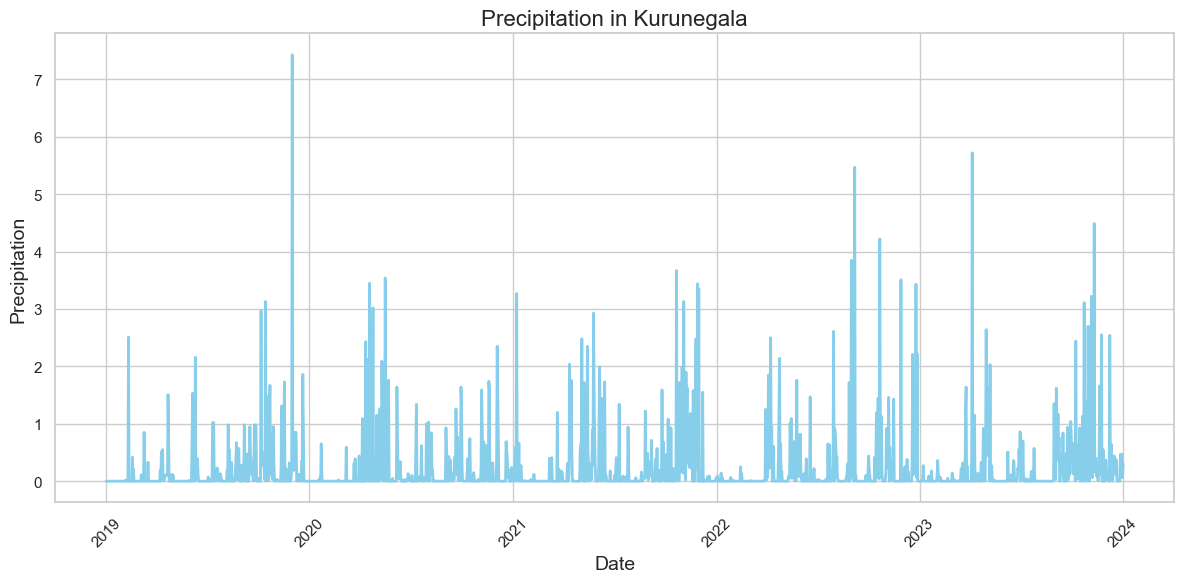

In [36]:
# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_kurunegala, x='DATE', y='PRCP', color='skyblue', linewidth=2)

# Customize titles and labels
plt.title('Precipitation in Kurunegala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

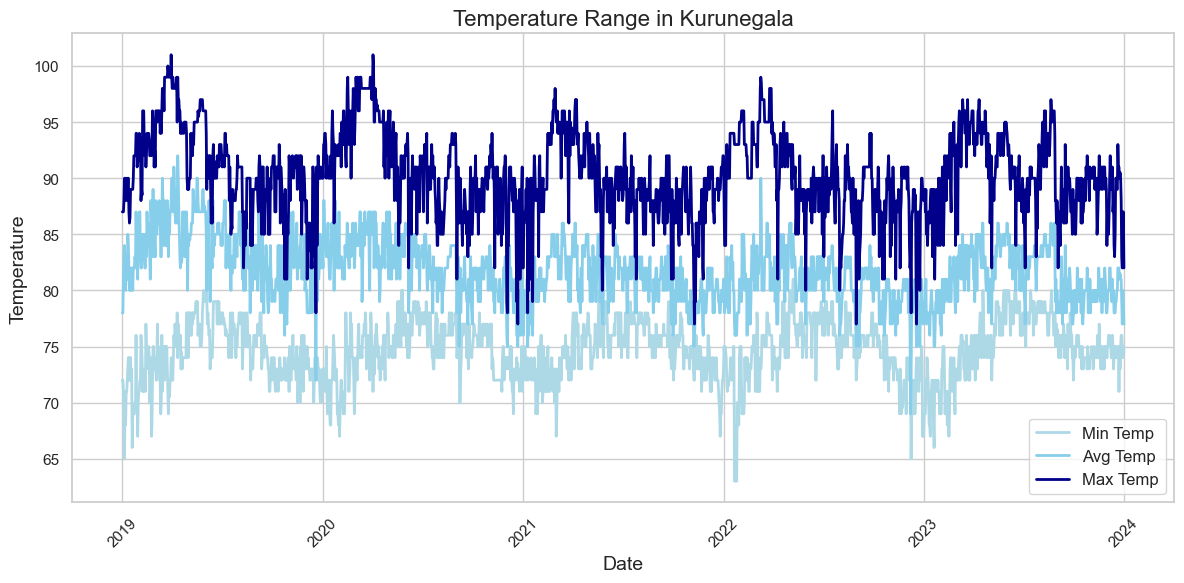

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_kurunegala, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_kurunegala, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_kurunegala, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Kurunegala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [38]:
fomaldihyde_kurunagala = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/KurunegalaProperHandledNullValues.csv")

In [39]:
fomaldihyde_kurunagala.head()

Current Date   Next Date  HCHO reading
0   2019-01-01  2019-01-02      0.000088
1   2019-01-02  2019-01-03      0.000137
2   2019-01-03  2019-01-04      0.000148
3   2019-01-04  2019-01-05     -0.000002
4   2019-01-05  2019-01-06      0.000249

In [40]:
weather_kurunegala.rename(columns={"DATE":"Current Date"}, inplace=True)

In [41]:
# Convert the column in the 'object' type DataFrame to 'datetime64[ns]'
fomaldihyde_kurunagala['Current Date'] = pd.to_datetime(fomaldihyde_kurunagala['Current Date'])

# Perform outer join
kurunegala_data = pd.merge(fomaldihyde_kurunagala, weather_kurunegala, on='Current Date', how='outer')

In [42]:
weather_kurunegala["Current Date"].unique().shape 

(1827,)

In [43]:
weather_kurunegala.isnull().sum() 

Region          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
Current Date    0
dtype: int64

In [44]:
kurunegala_data.drop(1826, inplace=True)
kurunegala_data.shape

(1826, 11)

In [45]:
kurunegala_data.isnull().sum() 

Current Date    0
Next Date       0
HCHO reading    0
Region          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
dtype: int64

In [46]:
fomaldihyde_kurunagala.head()

Current Date   Next Date  HCHO reading
0   2019-01-01  2019-01-02      0.000088
1   2019-01-02  2019-01-03      0.000137
2   2019-01-03  2019-01-04      0.000148
3   2019-01-04  2019-01-05     -0.000002
4   2019-01-05  2019-01-06      0.000249

In [47]:
kurunegala_data.head()

Current Date   Next Date  HCHO reading             Region  LATITUDE  \
0   2019-01-01  2019-01-02      0.000088  Kurunegala Proper     7.467   
1   2019-01-02  2019-01-03      0.000137  Kurunegala Proper     7.467   
2   2019-01-03  2019-01-04      0.000148  Kurunegala Proper     7.467   
3   2019-01-04  2019-01-05     -0.000002  Kurunegala Proper     7.467   
4   2019-01-05  2019-01-06      0.000249  Kurunegala Proper     7.467   

   LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  TMIN  
0     80.367      116.0   0.0  78.0  87.0  72.0  
1     80.367      116.0   0.0  78.0  87.0  72.0  
2     80.367      116.0   0.0  81.0  87.0  71.0  
3     80.367      116.0   0.0  83.0  88.0  69.0  
4     80.367      116.0   0.0  84.0  90.0  65.0

In [48]:
kurunegala_data.tail()

Current Date   Next Date  HCHO reading             Region  LATITUDE  \
1821   2023-12-27  2023-12-28      0.000075  Kurunegala Proper     7.467   
1822   2023-12-28  2023-12-29      0.000110  Kurunegala Proper     7.467   
1823   2023-12-29  2023-12-30      0.000110  Kurunegala Proper     7.467   
1824   2023-12-30  2023-12-31      0.000158  Kurunegala Proper     7.467   
1825   2023-12-31  2024-01-01      0.000127  Kurunegala Proper     7.467   

      LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  TMIN  
1821     80.367      116.0  0.47  81.0  88.0  76.0  
1822     80.367      116.0  0.29  79.0  83.0  76.0  
1823     80.367      116.0  0.38  77.0  82.0  75.0  
1824     80.367      116.0  0.47  80.0  87.0  74.0  
1825     80.367      116.0  0.06  79.0  87.0  75.0

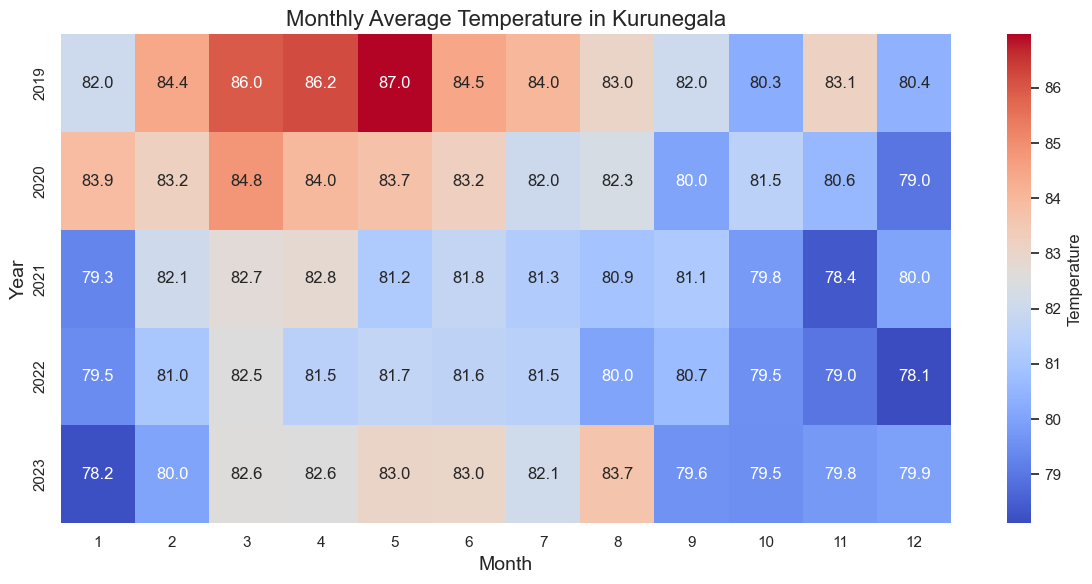

In [49]:
# Convert the 'Current Date' column to datetime format
kurunegala_data['Year'] = kurunegala_data['Current Date'].dt.year
kurunegala_data['Month'] = kurunegala_data['Current Date'].dt.month

# Pivot the data to have years as rows and months as columns
weather_pivot = kurunegala_data.pivot_table(index='Year', columns='Month', values='TAVG', aggfunc='mean')

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the heatmap
sns.heatmap(weather_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Temperature'})

# Customize titles and labels
plt.title('Monthly Average Temperature in Kurunegala', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [50]:
kurunegala_data.drop(columns=["Year", "Month"], inplace=True)

In [51]:
fomaldihyde_kurunagala.tail()

Current Date   Next Date  HCHO reading
1821   2023-12-27  2023-12-28      0.000075
1822   2023-12-28  2023-12-29      0.000110
1823   2023-12-29  2023-12-30      0.000110
1824   2023-12-30  2023-12-31      0.000158
1825   2023-12-31  2024-01-01      0.000127

In [52]:
kurunegala_data.describe()

Current Date  HCHO reading  LATITUDE     LONGITUDE  ELEVATION  \
count                 1826   1826.000000  1826.000  1.826000e+03     1826.0   
mean   2021-07-01 12:00:00      0.000127     7.467  8.036700e+01      116.0   
min    2019-01-01 00:00:00     -0.000078     7.467  8.036700e+01      116.0   
25%    2020-04-01 06:00:00      0.000081     7.467  8.036700e+01      116.0   
50%    2021-07-01 12:00:00      0.000121     7.467  8.036700e+01      116.0   
75%    2022-09-30 18:00:00      0.000171     7.467  8.036700e+01      116.0   
max    2023-12-31 00:00:00      0.000330     7.467  8.036700e+01      116.0   
std                    NaN      0.000067     0.000  2.842950e-14        0.0   

              PRCP         TAVG         TMAX         TMIN  
count  1826.000000  1826.000000  1826.000000  1826.000000  
mean      0.228719    81.720427    90.272727    74.693319  
min       0.000000    69.000000    77.000000    63.000000  
25%       0.000000    80.000000    88.000000    73.000000  
50%       0.000000    82.000000    90.000000    75.000000  
75%       0.150000    83.000000    93.000000    76.500000  
max       7.430000    92.000000   101.000000    81.000000  
std       0.581151     2.727087     3.843777     2.642825

In [53]:
kurunegala_data[kurunegala_data["LATITUDE"].isna() == True] 

Empty DataFrame
Columns: [Current Date, Next Date, HCHO reading, Region, LATITUDE, LONGITUDE, ELEVATION, PRCP, TAVG, TMAX, TMIN]
Index: []

In [54]:
kurunegala_data_copy = kurunegala_data.copy()

# Drop specified columns
kurunegala_data_copy.drop(columns=["LATITUDE", "LONGITUDE", "ELEVATION"], inplace=True)

# Calculate correlation matrix using Pearson method
correlation_matrix = kurunegala_data_copy.corr(method="pearson", numeric_only=True)
correlation_matrix

HCHO reading      PRCP      TAVG      TMAX      TMIN
HCHO reading      1.000000 -0.020175  0.174568  0.342388 -0.095334
PRCP             -0.020175  1.000000 -0.271417 -0.242136 -0.111818
TAVG              0.174568 -0.271417  1.000000  0.726114  0.330163
TMAX              0.342388 -0.242136  0.726114  1.000000  0.039618
TMIN             -0.095334 -0.111818  0.330163  0.039618  1.000000

#### This shows that Maximum temperatures have a slight correlation with HCHO reading compared to other readings

In [55]:
kurunegala_data_copy.corr(method="pearson", numeric_only=True)["HCHO reading"]

HCHO reading    1.000000
PRCP           -0.020175
TAVG            0.174568
TMAX            0.342388
TMIN           -0.095334
Name: HCHO reading, dtype: float64

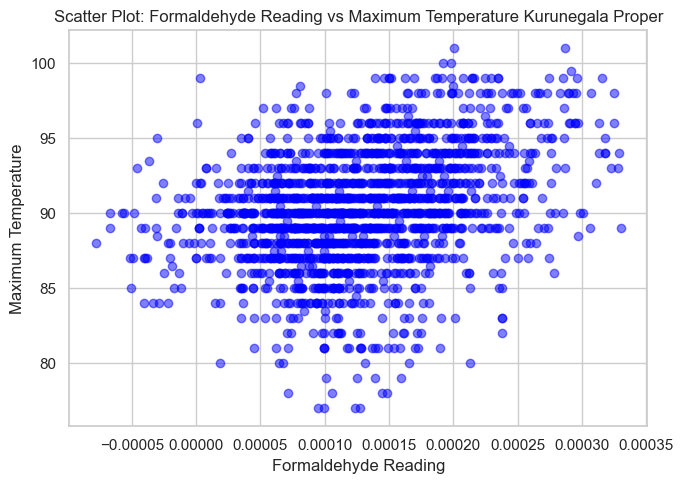

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(kurunegala_data["HCHO reading"], kurunegala_data["TMAX"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Maximum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Maximum Temperature Kurunegala Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

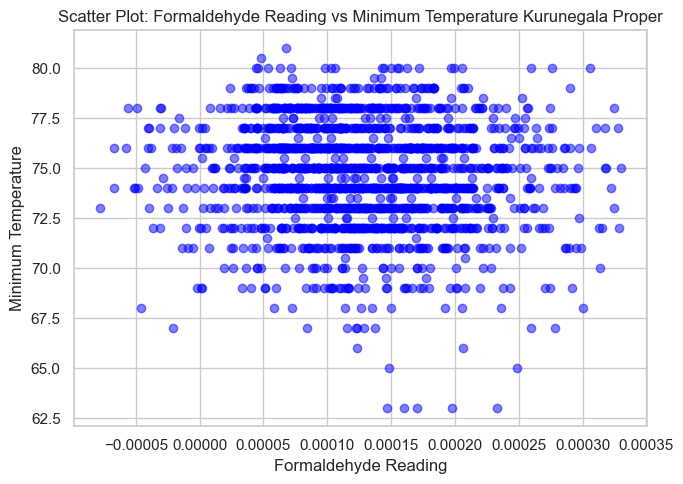

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(kurunegala_data["HCHO reading"], kurunegala_data["TMIN"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Minimum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Minimum Temperature Kurunegala Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

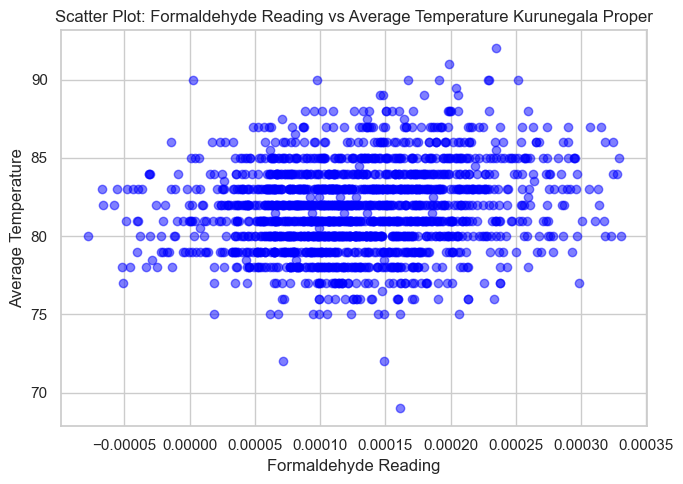

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(kurunegala_data["HCHO reading"], kurunegala_data["TAVG"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Average Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Average Temperature Kurunegala Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Colombo Weather Analysis

In [59]:
weather_colombo.head()

Region  LATITUDE  LONGITUDE  ELEVATION       DATE  PRCP  TAVG  \
1705  Colombo Proper       6.9     79.867        7.0 2019-01-01   0.0    81   
1706  Colombo Proper       6.9     79.867        7.0 2019-01-02   0.0    78   
1707  Colombo Proper       6.9     79.867        7.0 2019-01-03   0.0    81   
1708  Colombo Proper       6.9     79.867        7.0 2019-01-04   0.0    81   
1709  Colombo Proper       6.9     79.867        7.0 2019-01-05   0.0    81   

      TMAX  TMIN  
1705  89.0  74.0  
1706   NaN  74.0  
1707  90.0  74.0  
1708  91.0  72.0  
1709  90.0  74.0

In [60]:
weather_colombo.shape

(1766, 9)

In [61]:
weather_colombo.isnull().sum()

Region         0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
PRCP           9
TAVG           0
TMAX         210
TMIN         318
dtype: int64

In [62]:
# Assuming 'DATE' is a datetime column in your DataFrame
weather_colombo['DATE'] = pd.to_datetime(weather_colombo['DATE'])

# Set 'DATE' column as the index
weather_colombo.set_index('DATE', inplace=True)

# Reindex the DataFrame with a complete date range
full_date_range = pd.date_range(start=weather_colombo.index.min(), end=weather_colombo.index.max(), freq='D')
weather_colombo = weather_colombo.reindex(full_date_range)

# Reset index to remove 'DATE' as index and restore it as a column
weather_colombo.reset_index(inplace=True)


weather_colombo["DATE"] = weather_colombo["index"]    
weather_colombo.drop(columns=["index"], inplace=True)

In [63]:
weather_colombo.describe()

LATITUDE     LONGITUDE  ELEVATION         PRCP         TAVG  \
count  1.766000e+03  1.766000e+03     1766.0  1757.000000  1766.000000   
mean   6.900000e+00  7.986700e+01        7.0     0.293773    82.433749   
min    6.900000e+00  7.986700e+01        7.0     0.000000    75.000000   
25%    6.900000e+00  7.986700e+01        7.0     0.000000    81.000000   
50%    6.900000e+00  7.986700e+01        7.0     0.010000    83.000000   
75%    6.900000e+00  7.986700e+01        7.0     0.260000    84.000000   
max    6.900000e+00  7.986700e+01        7.0     5.940000    87.000000   
std    1.776860e-15  1.421488e-14        0.0     0.654846     2.010137   

              TMAX         TMIN                 DATE  
count  1556.000000  1448.000000                 1827  
mean     88.094473    77.293508  2021-07-02 00:00:00  
min      79.000000    68.000000  2019-01-01 00:00:00  
25%      87.000000    75.000000  2020-04-01 12:00:00  
50%      88.000000    77.000000  2021-07-02 00:00:00  
75%      90.000000    79.000000  2022-10-01 12:00:00  
max      97.000000    84.000000  2024-01-01 00:00:00  
std       2.237522     2.610152                  NaN

In [64]:
weather_colombo.isnull().sum()

Region        61
LATITUDE      61
LONGITUDE     61
ELEVATION     61
PRCP          70
TAVG          61
TMAX         271
TMIN         379
DATE           0
dtype: int64

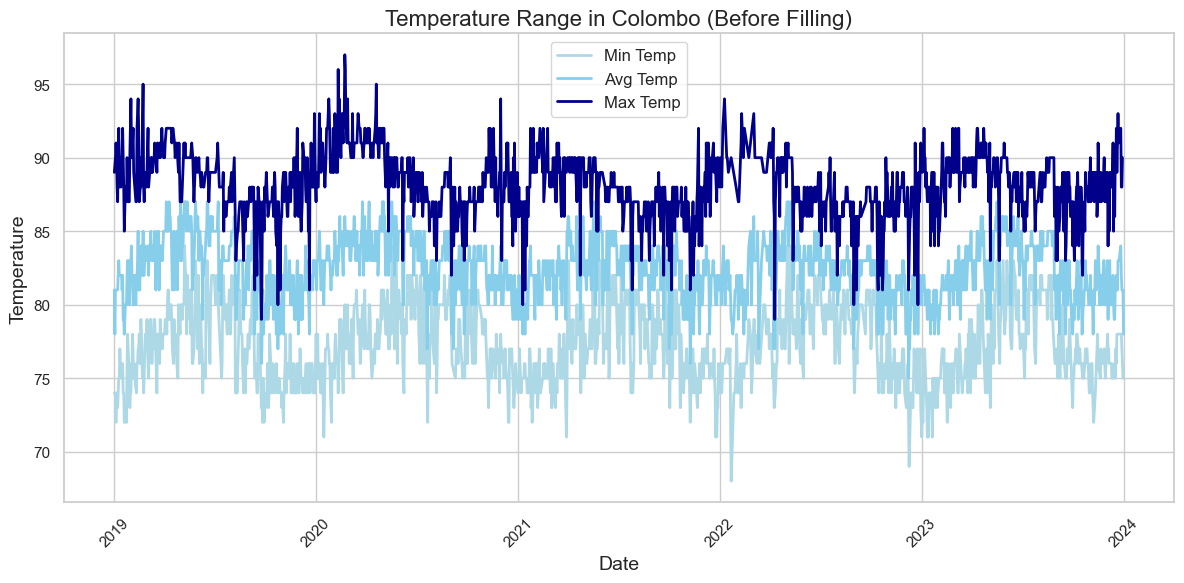

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_colombo, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_colombo, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_colombo, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Colombo (Before Filling)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [66]:
weather_colombo['PRCP'] = weather_colombo['PRCP'].fillna(weather_colombo['PRCP'].rolling(3, min_periods=1).mean())
weather_colombo["PRCP"] = weather_colombo["PRCP"].fillna(method="ffill")
weather_colombo["PRCP"] = weather_colombo["PRCP"].fillna(method="bfill")

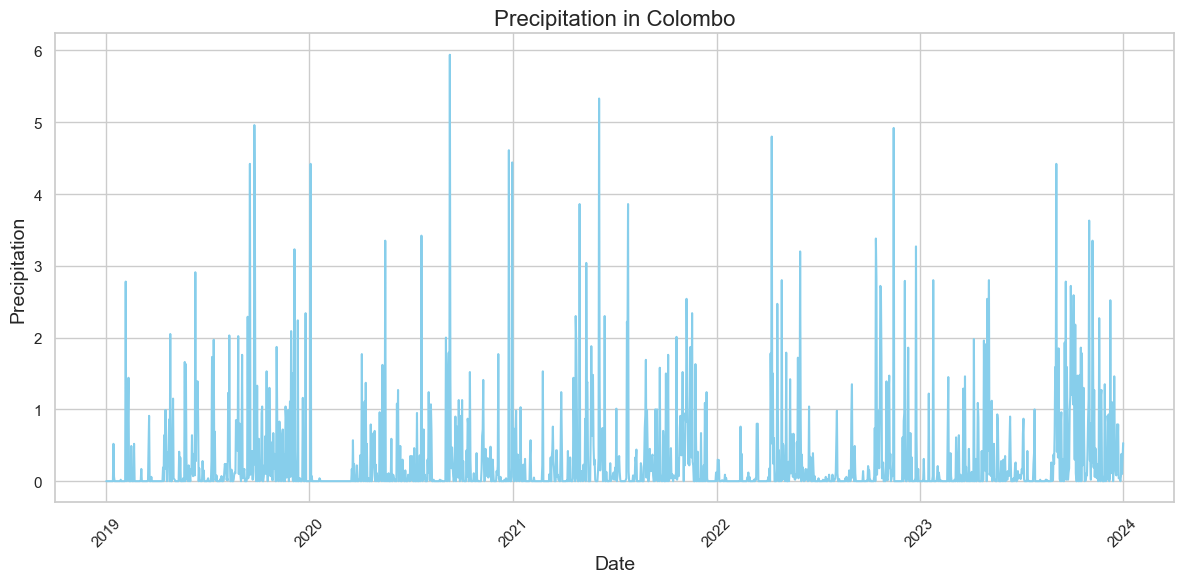

In [67]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_colombo['DATE'], weather_colombo['PRCP'], linestyle='-', color='skyblue')


plt.title('Precipitation in Colombo', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
weather_colombo['TMAX'] = weather_colombo['TMAX'].fillna(weather_colombo['TMAX'].rolling(3, min_periods=1).mean())
weather_colombo["TMAX"] = weather_colombo["TMAX"].fillna(method="ffill")
weather_colombo["TMAX"] = weather_colombo["TMAX"].fillna(method="bfill")

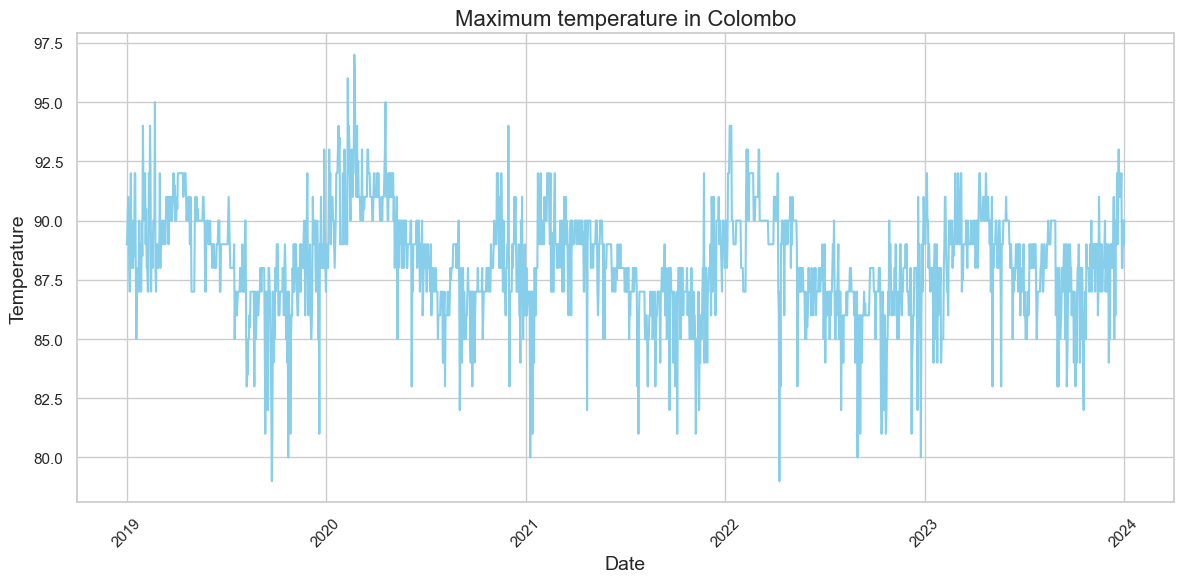

In [69]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_colombo['DATE'], weather_colombo['TMAX'], linestyle='-', color='skyblue')


plt.title('Maximum temperature in Colombo', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
weather_colombo['TMIN'] = weather_colombo['TMIN'].fillna(weather_colombo['TMIN'].rolling(3, min_periods=1).mean())
weather_colombo["TMIN"] = weather_colombo["TMIN"].fillna(method="ffill")
weather_colombo["TMIN"] = weather_colombo["TMIN"].fillna(method="bfill")

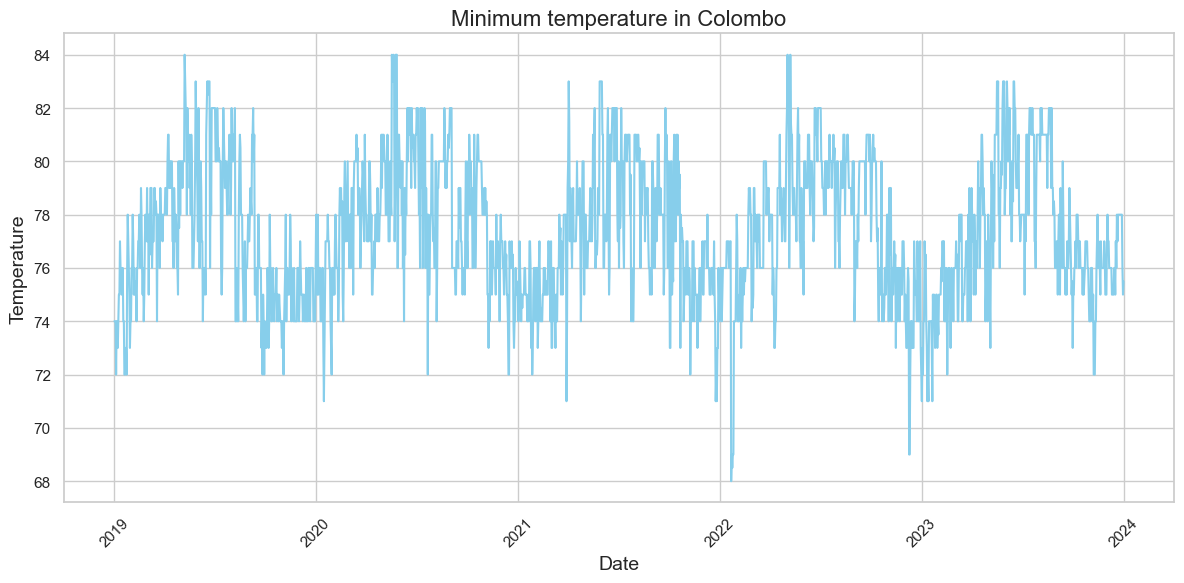

In [71]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_colombo['DATE'], weather_colombo['TMIN'], linestyle='-', color='skyblue')


plt.title('Minimum temperature in Colombo', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
weather_colombo['TAVG'] = weather_colombo['TAVG'].fillna(weather_colombo['TAVG'].rolling(3, min_periods=1).mean())
weather_colombo["TAVG"] = weather_colombo["TAVG"].fillna(method="ffill")
weather_colombo["TAVG"] = weather_colombo["TAVG"].fillna(method="bfill")

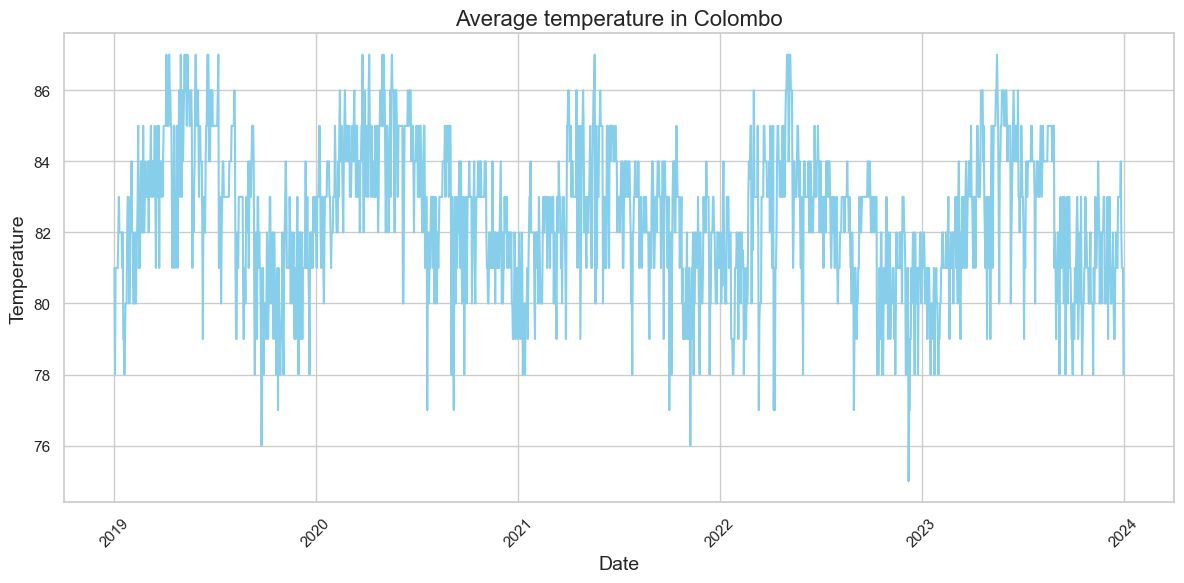

In [73]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_colombo['DATE'], weather_colombo['TAVG'], linestyle='-', color='skyblue')


plt.title('Average temperature in Colombo', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
weather_colombo.isnull().sum()

Region       61
LATITUDE     61
LONGITUDE    61
ELEVATION    61
PRCP          0
TAVG          0
TMAX          0
TMIN          0
DATE          0
dtype: int64

In [75]:
latitude_value = weather_colombo["LATITUDE"].mean()
longitude_value = weather_colombo["LONGITUDE"].mean()
elevation_value = weather_colombo["ELEVATION"].mean()
region_value = "Colombo Proper"

weather_colombo["LATITUDE"] =  weather_colombo["LATITUDE"].apply(lambda x : latitude_value)
weather_colombo["LONGITUDE"] = weather_colombo["LONGITUDE"].apply(lambda x : longitude_value)
weather_colombo["ELEVATION"] = weather_colombo["ELEVATION"].apply(lambda x : elevation_value)
weather_colombo["Region"] =  weather_colombo["Region"].apply(lambda x : region_value)

In [76]:
weather_colombo.isnull().sum()

Region       0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
PRCP         0
TAVG         0
TMAX         0
TMIN         0
DATE         0
dtype: int64

In [77]:
weather_colombo.describe()

LATITUDE     LONGITUDE  ELEVATION         PRCP         TAVG  \
count  1.827000e+03  1.827000e+03     1827.0  1827.000000  1827.000000   
mean   6.900000e+00  7.986700e+01        7.0     0.286519    82.429666   
min    6.900000e+00  7.986700e+01        7.0     0.000000    75.000000   
25%    6.900000e+00  7.986700e+01        7.0     0.000000    81.000000   
50%    6.900000e+00  7.986700e+01        7.0     0.010000    83.000000   
75%    6.900000e+00  7.986700e+01        7.0     0.240000    84.000000   
max    6.900000e+00  7.986700e+01        7.0     5.940000    87.000000   
std    3.553686e-15  1.421475e-14        0.0     0.645145     2.003381   

              TMAX         TMIN                 DATE  
count  1827.000000  1827.000000                 1827  
mean     88.207991    77.365353  2021-07-02 00:00:00  
min      79.000000    68.000000  2019-01-01 00:00:00  
25%      87.000000    76.000000  2020-04-01 12:00:00  
50%      88.000000    77.000000  2021-07-02 00:00:00  
75%      90.000000    79.000000  2022-10-01 12:00:00  
max      97.000000    84.000000  2024-01-01 00:00:00  
std       2.244924     2.610680                  NaN

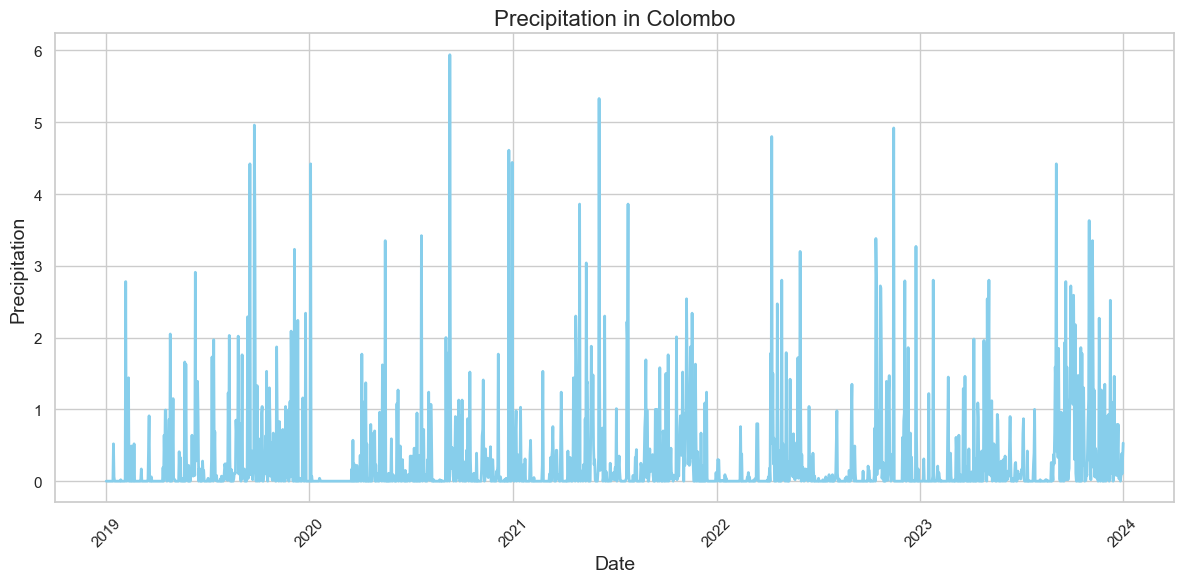

In [78]:
# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_colombo, x='DATE', y='PRCP', color='skyblue', linewidth=2)

# Customize titles and labels
plt.title('Precipitation in Colombo', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

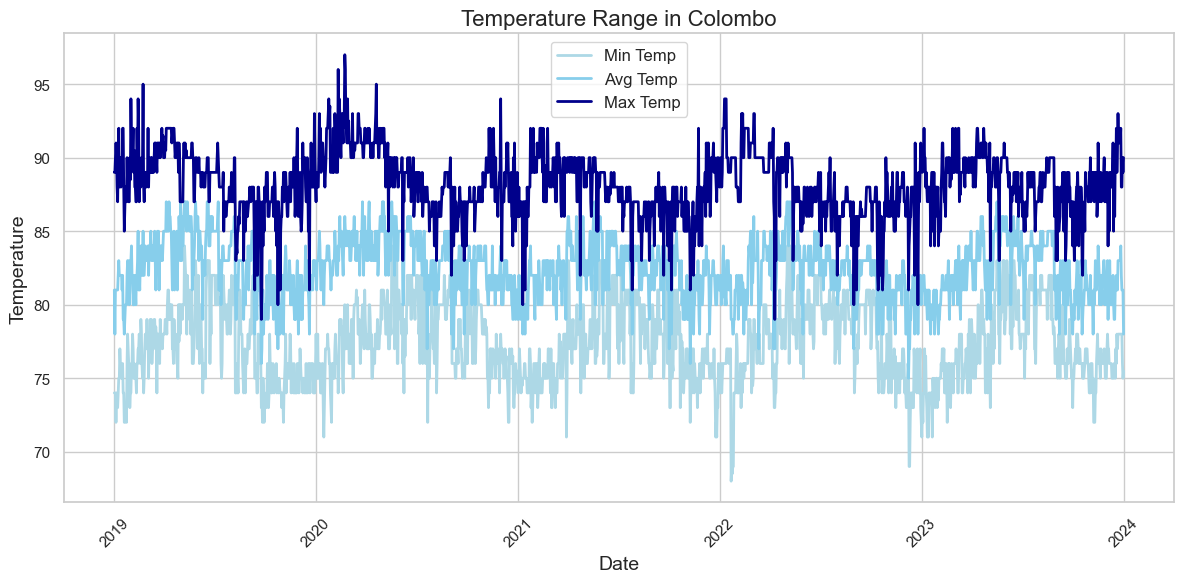

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_colombo, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_colombo, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_colombo, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Colombo', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [80]:
fomaldihyde_colombo = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/ColomboProperHandledNullValues.csv")

In [81]:
fomaldihyde_colombo.head()

Current Date   Next Date  HCHO reading
0   2019-01-01  2019-01-02      0.000197
1   2019-01-02  2019-01-03      0.000263
2   2019-01-03  2019-01-04      0.000099
3   2019-01-04  2019-01-05      0.000210
4   2019-01-05  2019-01-06      0.000179

In [82]:
fomaldihyde_colombo.tail()

Current Date   Next Date  HCHO reading
1821   2023-12-27  2023-12-28      0.000118
1822   2023-12-28  2023-12-29      0.000226
1823   2023-12-29  2023-12-30      0.000232
1824   2023-12-30  2023-12-31      0.000140
1825   2023-12-31  2024-01-01      0.000080

In [83]:
fomaldihyde_colombo.describe()

HCHO reading
count   1826.000000
mean       0.000151
std        0.000086
min       -0.000112
25%        0.000092
50%        0.000144
75%        0.000209
max        0.000415

In [84]:
weather_colombo.head() 

Region  LATITUDE  LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  TMIN  \
0  Colombo Proper       6.9     79.867        7.0   0.0  81.0  89.0  74.0   
1  Colombo Proper       6.9     79.867        7.0   0.0  78.0  89.0  74.0   
2  Colombo Proper       6.9     79.867        7.0   0.0  81.0  90.0  74.0   
3  Colombo Proper       6.9     79.867        7.0   0.0  81.0  91.0  72.0   
4  Colombo Proper       6.9     79.867        7.0   0.0  81.0  90.0  74.0   

        DATE  
0 2019-01-01  
1 2019-01-02  
2 2019-01-03  
3 2019-01-04  
4 2019-01-05

In [85]:
weather_colombo.rename(columns={"DATE":"Current Date"}, inplace=True)

In [86]:
# Convert the column in the 'object' type DataFrame to 'datetime64[ns]'
fomaldihyde_colombo['Current Date'] = pd.to_datetime(fomaldihyde_colombo['Current Date'])

# Perform outer join
colombo_data = pd.merge(fomaldihyde_colombo, weather_colombo, on='Current Date', how='outer')

In [87]:
weather_colombo["Current Date"].unique().shape

(1827,)

In [88]:
weather_colombo.isnull().sum() 

Region          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
Current Date    0
dtype: int64

In [89]:
colombo_data.drop(1826, inplace=True)
colombo_data.shape

(1826, 11)

In [90]:
colombo_data.isnull().sum() 

Current Date    0
Next Date       0
HCHO reading    0
Region          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
dtype: int64

In [91]:
colombo_data.head()

Current Date   Next Date  HCHO reading          Region  LATITUDE  LONGITUDE  \
0   2019-01-01  2019-01-02      0.000197  Colombo Proper       6.9     79.867   
1   2019-01-02  2019-01-03      0.000263  Colombo Proper       6.9     79.867   
2   2019-01-03  2019-01-04      0.000099  Colombo Proper       6.9     79.867   
3   2019-01-04  2019-01-05      0.000210  Colombo Proper       6.9     79.867   
4   2019-01-05  2019-01-06      0.000179  Colombo Proper       6.9     79.867   

   ELEVATION  PRCP  TAVG  TMAX  TMIN  
0        7.0   0.0  81.0  89.0  74.0  
1        7.0   0.0  78.0  89.0  74.0  
2        7.0   0.0  81.0  90.0  74.0  
3        7.0   0.0  81.0  91.0  72.0  
4        7.0   0.0  81.0  90.0  74.0

In [92]:
colombo_data.tail()

Current Date   Next Date  HCHO reading          Region  LATITUDE  \
1821   2023-12-27  2023-12-28      0.000118  Colombo Proper       6.9   
1822   2023-12-28  2023-12-29      0.000226  Colombo Proper       6.9   
1823   2023-12-29  2023-12-30      0.000232  Colombo Proper       6.9   
1824   2023-12-30  2023-12-31      0.000140  Colombo Proper       6.9   
1825   2023-12-31  2024-01-01      0.000080  Colombo Proper       6.9   

      LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  TMIN  
1821     79.867        7.0  0.00  84.0  92.0  78.0  
1822     79.867        7.0  0.07  82.0  88.0  78.0  
1823     79.867        7.0  0.38  81.0  88.0  78.0  
1824     79.867        7.0  0.10  81.0  90.0  76.0  
1825     79.867        7.0  0.33  81.0  89.0  75.0

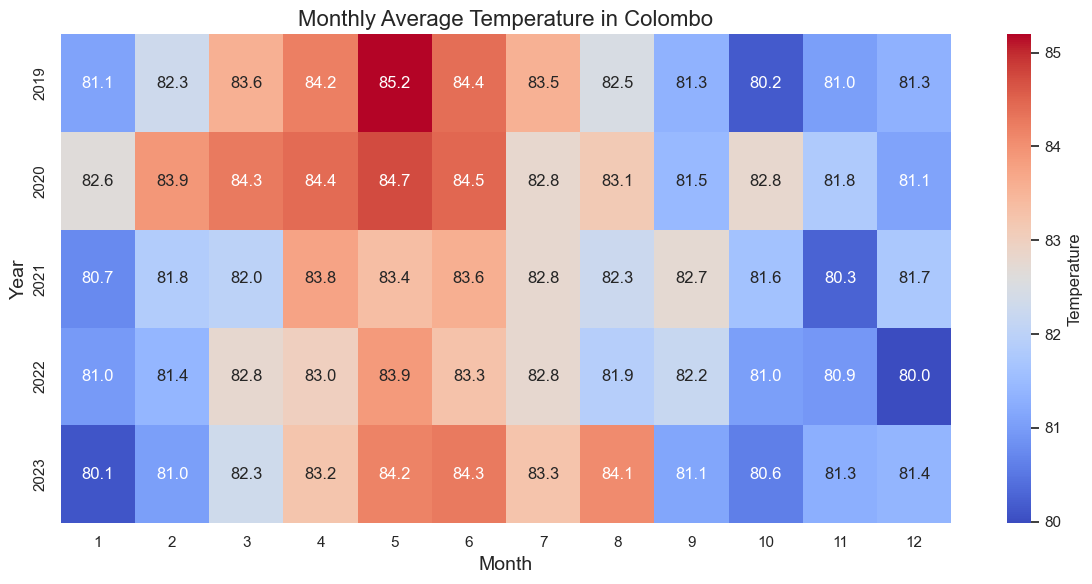

In [93]:
# Convert the 'Current Date' column to datetime format
colombo_data['Year'] = colombo_data['Current Date'].dt.year
colombo_data['Month'] = colombo_data['Current Date'].dt.month

# Pivot the data to have years as rows and months as columns
weather_pivot = colombo_data.pivot_table(index='Year', columns='Month', values='TAVG', aggfunc='mean')

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the heatmap
sns.heatmap(weather_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Temperature'})

# Customize titles and labels
plt.title('Monthly Average Temperature in Colombo', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [94]:
colombo_data.drop(columns=["Year", "Month"], inplace=True)

In [95]:
colombo_data.head()

Current Date   Next Date  HCHO reading          Region  LATITUDE  LONGITUDE  \
0   2019-01-01  2019-01-02      0.000197  Colombo Proper       6.9     79.867   
1   2019-01-02  2019-01-03      0.000263  Colombo Proper       6.9     79.867   
2   2019-01-03  2019-01-04      0.000099  Colombo Proper       6.9     79.867   
3   2019-01-04  2019-01-05      0.000210  Colombo Proper       6.9     79.867   
4   2019-01-05  2019-01-06      0.000179  Colombo Proper       6.9     79.867   

   ELEVATION  PRCP  TAVG  TMAX  TMIN  
0        7.0   0.0  81.0  89.0  74.0  
1        7.0   0.0  78.0  89.0  74.0  
2        7.0   0.0  81.0  90.0  74.0  
3        7.0   0.0  81.0  91.0  72.0  
4        7.0   0.0  81.0  90.0  74.0

In [96]:
colombo_data.describe()

Current Date  HCHO reading      LATITUDE     LONGITUDE  \
count                 1826   1826.000000  1.826000e+03  1.826000e+03   
mean   2021-07-01 12:00:00      0.000151  6.900000e+00  7.986700e+01   
min    2019-01-01 00:00:00     -0.000112  6.900000e+00  7.986700e+01   
25%    2020-04-01 06:00:00      0.000092  6.900000e+00  7.986700e+01   
50%    2021-07-01 12:00:00      0.000144  6.900000e+00  7.986700e+01   
75%    2022-09-30 18:00:00      0.000209  6.900000e+00  7.986700e+01   
max    2023-12-31 00:00:00      0.000415  6.900000e+00  7.986700e+01   
std                    NaN      0.000086  2.665265e-15  2.842950e-14   

       ELEVATION         PRCP         TAVG         TMAX         TMIN  
count     1826.0  1826.000000  1826.000000  1826.000000  1826.000000  
mean         7.0     0.286386    82.432092    88.207010    77.366375  
min          7.0     0.000000    75.000000    79.000000    68.000000  
25%          7.0     0.000000    81.000000    87.000000    76.000000  
50%          7.0     0.010000    83.000000    88.000000    77.000000  
75%          7.0     0.240000    84.000000    90.000000    79.000000  
max          7.0     5.940000    87.000000    97.000000    84.000000  
std          0.0     0.645297     2.001243     2.245147     2.611030

In [97]:
colombo_data[kurunegala_data["LATITUDE"].isna() == True] 

Empty DataFrame
Columns: [Current Date, Next Date, HCHO reading, Region, LATITUDE, LONGITUDE, ELEVATION, PRCP, TAVG, TMAX, TMIN]
Index: []

In [98]:
colombo_data_copy = colombo_data.copy()

# Drop specified columns
colombo_data_copy.drop(columns=["LATITUDE", "LONGITUDE", "ELEVATION"], inplace=True)

# Calculate correlation matrix using Pearson method
correlation_matrix =  colombo_data_copy.corr(method="pearson", numeric_only=True)
correlation_matrix

HCHO reading      PRCP      TAVG      TMAX      TMIN
HCHO reading      1.000000 -0.093883 -0.056770  0.337612 -0.235119
PRCP             -0.093883  1.000000 -0.359612 -0.321459 -0.277047
TAVG             -0.056770 -0.359612  1.000000  0.511461  0.659455
TMAX              0.337612 -0.321459  0.511461  1.000000  0.096884
TMIN             -0.235119 -0.277047  0.659455  0.096884  1.000000

#### This shows that Maximum and Minimum temperatures have a slight correlation with HCHO reading

In [99]:
colombo_data_copy.corr(method="pearson", numeric_only=True)["HCHO reading"]

HCHO reading    1.000000
PRCP           -0.093883
TAVG           -0.056770
TMAX            0.337612
TMIN           -0.235119
Name: HCHO reading, dtype: float64

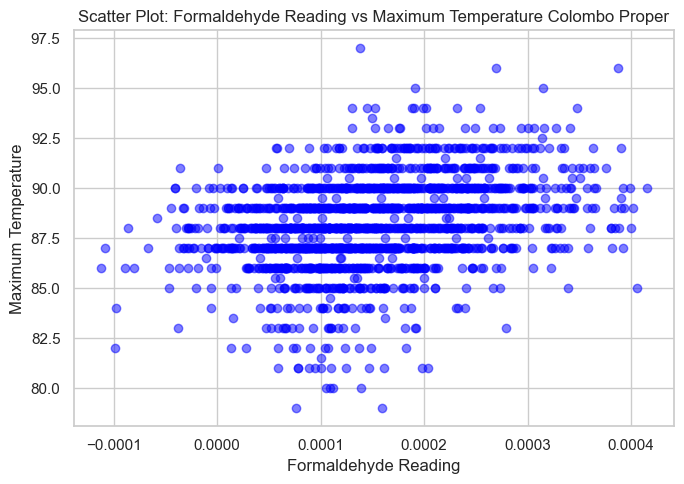

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(colombo_data["HCHO reading"], colombo_data["TMAX"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Maximum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Maximum Temperature Colombo Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout() 
plt.show()

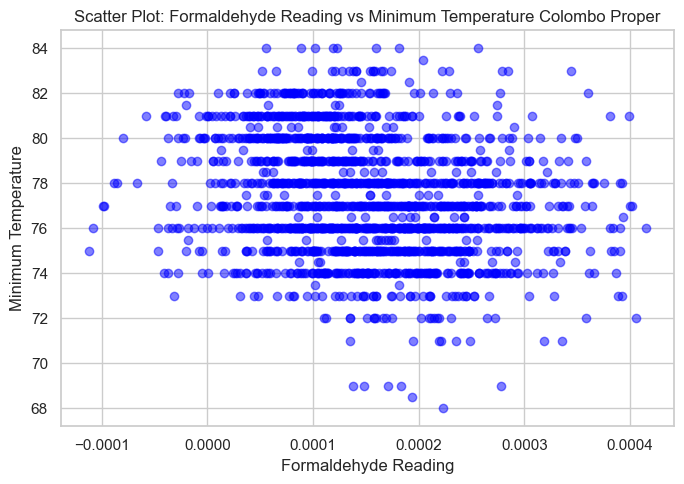

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(colombo_data["HCHO reading"], colombo_data["TMIN"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Minimum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Minimum Temperature Colombo Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

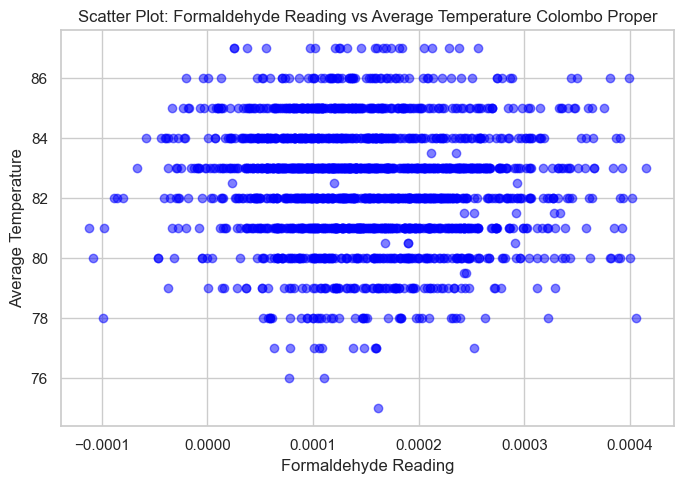

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(colombo_data["HCHO reading"], colombo_data["TAVG"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Average Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Average Temperature Colombo Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Nuwara Eliya Proper Analysis

In [103]:
weather_nuwara_eliya.head()

Region  LATITUDE  LONGITUDE  ELEVATION       DATE  PRCP  \
3471  Nuwara Eliya Proper     6.967     80.767     1880.0 2019-01-01   0.0   
3472  Nuwara Eliya Proper     6.967     80.767     1880.0 2019-01-02   0.0   
3473  Nuwara Eliya Proper     6.967     80.767     1880.0 2019-01-03   0.0   
3474  Nuwara Eliya Proper     6.967     80.767     1880.0 2019-01-04   0.0   
3475  Nuwara Eliya Proper     6.967     80.767     1880.0 2019-01-05   0.0   

      TAVG  TMAX  TMIN  
3471    61  71.0  49.0  
3472    59   NaN  49.0  
3473    59  71.0  49.0  
3474    59  72.0  47.0  
3475    55  68.0   NaN

In [104]:
weather_nuwara_eliya.shape

(1762, 9)

In [105]:
weather_nuwara_eliya.isnull().sum()

Region         0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
PRCP           5
TAVG           0
TMAX         214
TMIN         344
dtype: int64

In [106]:
# Assuming 'DATE' is a datetime column in your DataFrame
weather_nuwara_eliya['DATE'] = pd.to_datetime(weather_nuwara_eliya['DATE'])

# Set 'DATE' column as the index
weather_nuwara_eliya.set_index('DATE', inplace=True)

# Reindex the DataFrame with a complete date range
full_date_range = pd.date_range(start=weather_nuwara_eliya.index.min(), end=weather_nuwara_eliya.index.max(), freq='D')
weather_nuwara_eliya = weather_nuwara_eliya.reindex(full_date_range)

# Reset index to remove 'DATE' as index and restore it as a column
weather_nuwara_eliya.reset_index(inplace=True)


weather_nuwara_eliya["DATE"] = weather_nuwara_eliya["index"]    
weather_nuwara_eliya.drop(columns=["index"], inplace=True)

In [107]:
weather_nuwara_eliya.describe()

LATITUDE     LONGITUDE  ELEVATION         PRCP         TAVG  \
count  1762.000  1.762000e+03     1762.0  1757.000000  1762.000000   
mean      6.967  8.076700e+01     1880.0     0.206113    60.961975   
min       6.967  8.076700e+01     1880.0     0.000000    51.000000   
25%       6.967  8.076700e+01     1880.0     0.000000    60.000000   
50%       6.967  8.076700e+01     1880.0     0.010000    61.000000   
75%       6.967  8.076700e+01     1880.0     0.200000    62.000000   
max       6.967  8.076700e+01     1880.0     4.250000    68.000000   
std       0.000  1.421489e-14        0.0     0.430812     1.926304   

              TMAX         TMIN                 DATE  
count  1548.000000  1418.000000                 1827  
mean     68.684109    54.129055  2021-07-02 00:00:00  
min      56.000000    37.000000  2019-01-01 00:00:00  
25%      66.000000    52.000000  2020-04-01 12:00:00  
50%      69.000000    55.000000  2021-07-02 00:00:00  
75%      71.000000    57.000000  2022-10-01 12:00:00  
max      92.000000    61.000000  2024-01-01 00:00:00  
std       3.683374     3.882118                  NaN

In [108]:
weather_nuwara_eliya.isnull().sum()

Region        65
LATITUDE      65
LONGITUDE     65
ELEVATION     65
PRCP          70
TAVG          65
TMAX         279
TMIN         409
DATE           0
dtype: int64

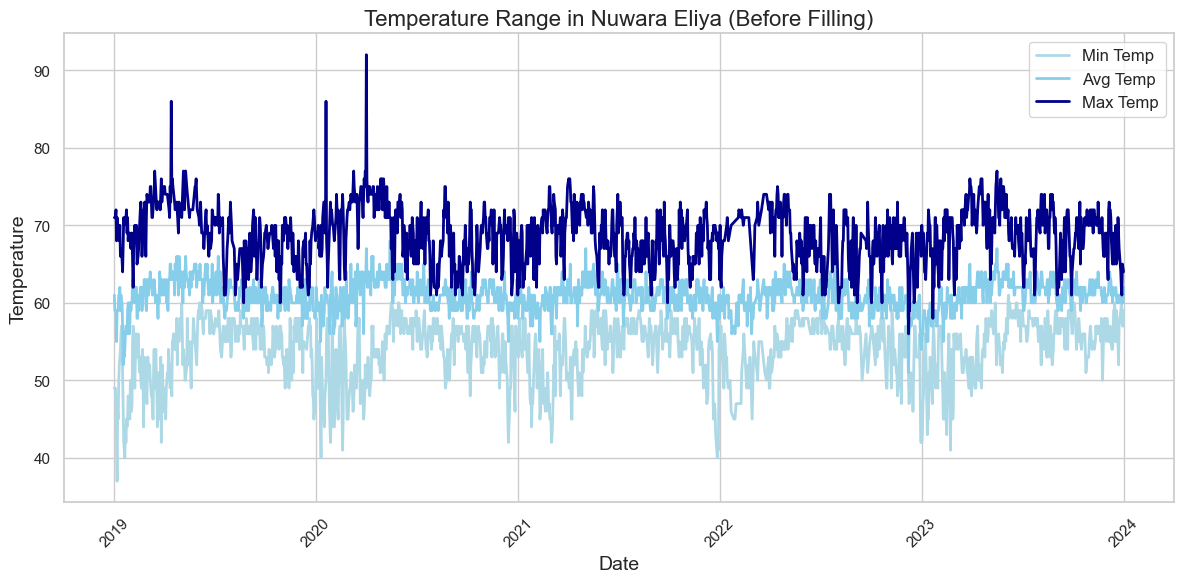

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Nuwara Eliya (Before Filling)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [110]:
weather_nuwara_eliya['PRCP'] = weather_nuwara_eliya['PRCP'].fillna(weather_nuwara_eliya['PRCP'].rolling(3, min_periods=1).mean())
weather_nuwara_eliya["PRCP"] = weather_nuwara_eliya["PRCP"].fillna(method="ffill")
weather_nuwara_eliya["PRCP"] = weather_nuwara_eliya["PRCP"].fillna(method="bfill")

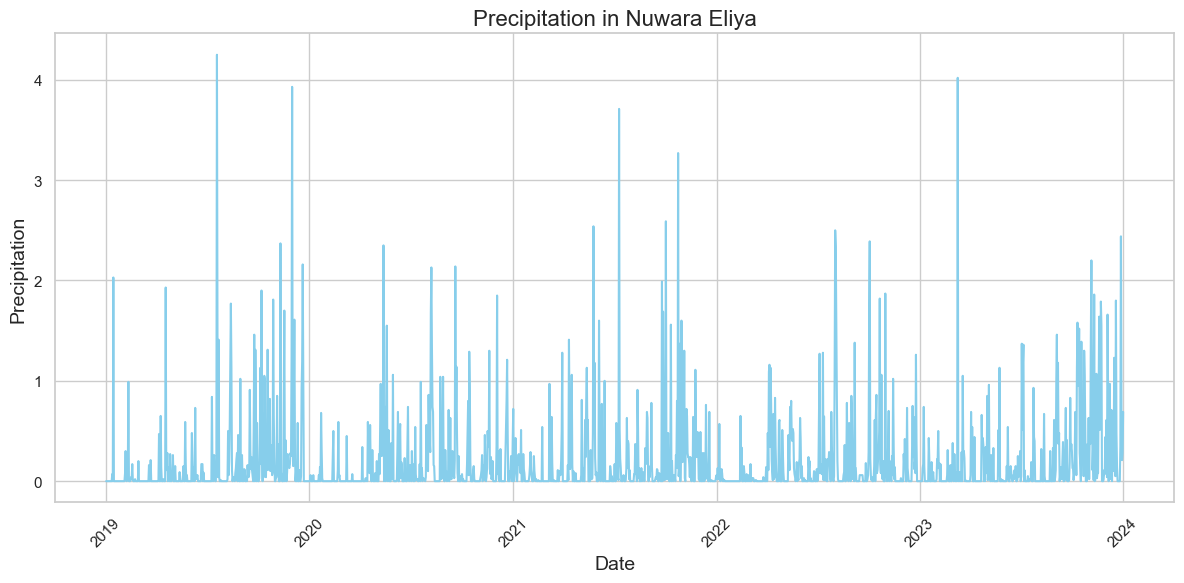

In [111]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_nuwara_eliya['DATE'], weather_nuwara_eliya['PRCP'], linestyle='-', color='skyblue')


plt.title('Precipitation in Nuwara Eliya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
weather_nuwara_eliya['TMAX'] = weather_nuwara_eliya['TMAX'].fillna(weather_nuwara_eliya['TMAX'].rolling(3, min_periods=1).mean())
weather_nuwara_eliya["TMAX"] = weather_nuwara_eliya["TMAX"].fillna(method="ffill")
weather_nuwara_eliya["TMAX"] = weather_nuwara_eliya["TMAX"].fillna(method="bfill")

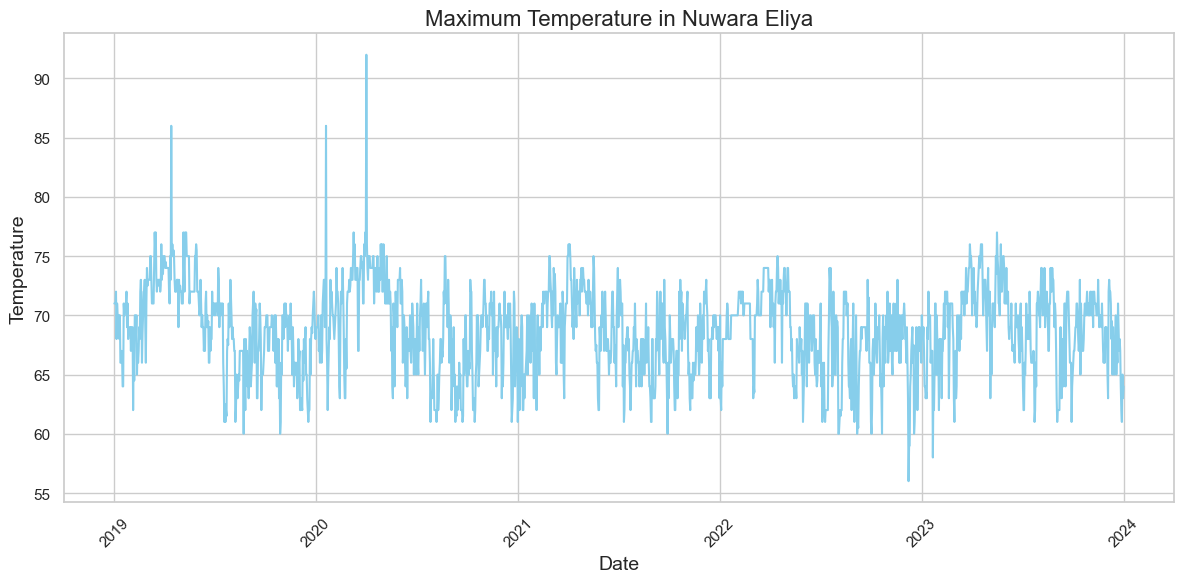

In [113]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_nuwara_eliya['DATE'], weather_nuwara_eliya['TMAX'], linestyle='-', color='skyblue')


plt.title('Maximum Temperature in Nuwara Eliya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [114]:
weather_nuwara_eliya['TMIN'] = weather_nuwara_eliya['TMIN'].fillna(weather_nuwara_eliya['TMIN'].rolling(3, min_periods=1).mean())
weather_nuwara_eliya["TMIN"] = weather_nuwara_eliya["TMIN"].fillna(method="ffill")
weather_nuwara_eliya["TMIN"] = weather_nuwara_eliya["TMIN"].fillna(method="bfill")

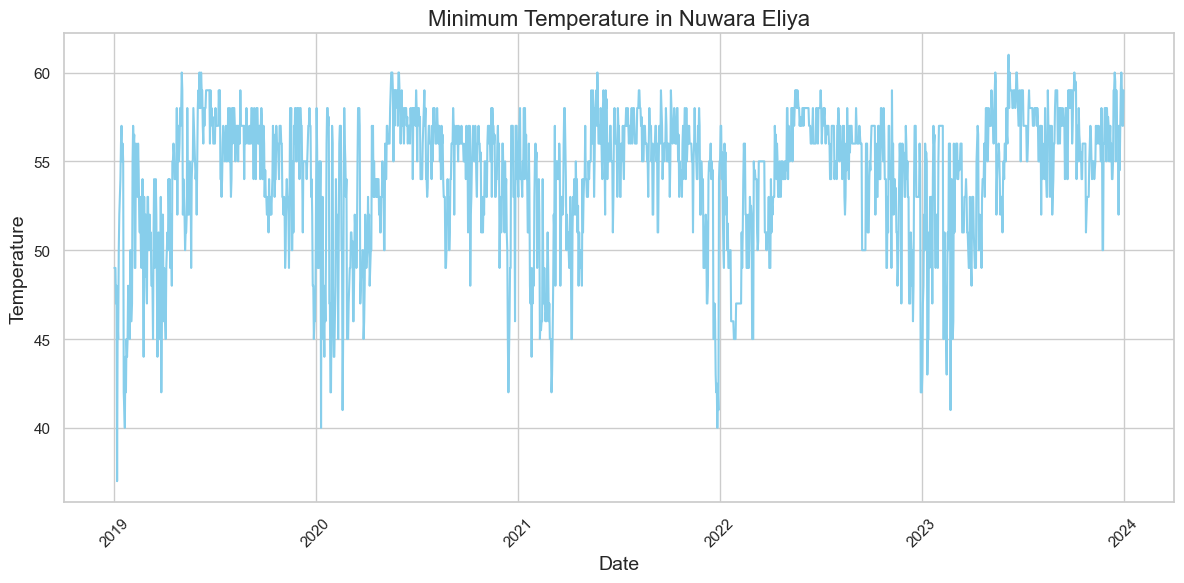

In [115]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_nuwara_eliya['DATE'], weather_nuwara_eliya['TMIN'], linestyle='-', color='skyblue')


plt.title('Minimum Temperature in Nuwara Eliya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [116]:
weather_nuwara_eliya['TAVG'] = weather_nuwara_eliya['TAVG'].fillna(weather_nuwara_eliya['TAVG'].rolling(3, min_periods=1).mean())
weather_nuwara_eliya["TAVG"] = weather_nuwara_eliya["TAVG"].fillna(method="ffill")
weather_nuwara_eliya["TAVG"] = weather_nuwara_eliya["TAVG"].fillna(method="bfill")

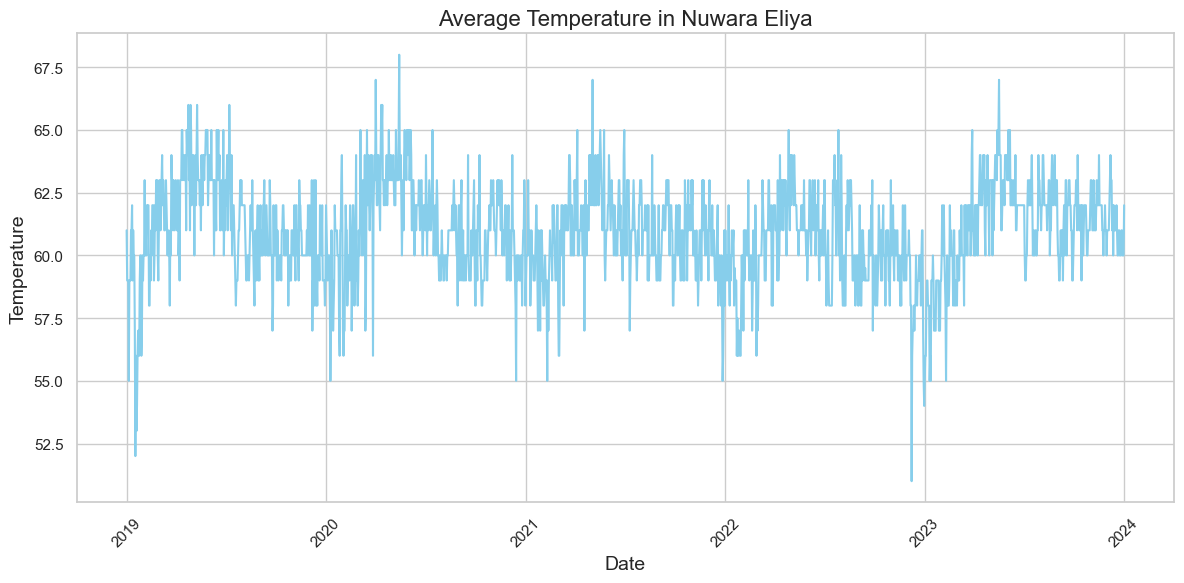

In [117]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(weather_nuwara_eliya['DATE'], weather_nuwara_eliya['TAVG'], linestyle='-', color='skyblue')


plt.title('Average Temperature in Nuwara Eliya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [118]:
weather_nuwara_eliya.isnull().sum()

Region       65
LATITUDE     65
LONGITUDE    65
ELEVATION    65
PRCP          0
TAVG          0
TMAX          0
TMIN          0
DATE          0
dtype: int64

In [119]:
latitude_value = weather_nuwara_eliya["LATITUDE"].mean()
longitude_value = weather_nuwara_eliya["LONGITUDE"].mean()
elevation_value = weather_nuwara_eliya["ELEVATION"].mean()
region_value = "Nuwara Eliya Proper"

weather_nuwara_eliya["LATITUDE"] =  weather_nuwara_eliya["LATITUDE"].apply(lambda x : latitude_value)
weather_nuwara_eliya["LONGITUDE"] = weather_nuwara_eliya["LONGITUDE"].apply(lambda x : longitude_value)
weather_nuwara_eliya["ELEVATION"] = weather_nuwara_eliya["ELEVATION"].apply(lambda x : elevation_value)
weather_nuwara_eliya["Region"] =  weather_nuwara_eliya["Region"].apply(lambda x : region_value)

In [120]:
weather_nuwara_eliya.isnull().sum()

Region       0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
PRCP         0
TAVG         0
TMAX         0
TMIN         0
DATE         0
dtype: int64

In [121]:
weather_nuwara_eliya.describe()

LATITUDE     LONGITUDE  ELEVATION         PRCP         TAVG  \
count  1.827000e+03  1.827000e+03     1827.0  1827.000000  1827.000000   
mean   6.967000e+00  8.076700e+01     1880.0     0.199611    60.923098   
min    6.967000e+00  8.076700e+01     1880.0     0.000000    51.000000   
25%    6.967000e+00  8.076700e+01     1880.0     0.000000    60.000000   
50%    6.967000e+00  8.076700e+01     1880.0     0.010000    61.000000   
75%    6.967000e+00  8.076700e+01     1880.0     0.190000    62.000000   
max    6.967000e+00  8.076700e+01     1880.0     4.250000    68.000000   
std    8.884216e-16  1.421475e-14        0.0     0.424112     1.931103   

              TMAX         TMIN                 DATE  
count  1827.000000  1827.000000                 1827  
mean     68.793103    54.130268  2021-07-02 00:00:00  
min      56.000000    37.000000  2019-01-01 00:00:00  
25%      66.000000    52.000000  2020-04-01 12:00:00  
50%      69.000000    55.000000  2021-07-02 00:00:00  
75%      71.000000    57.000000  2022-10-01 12:00:00  
max      92.000000    61.000000  2024-01-01 00:00:00  
std       3.632509     3.832365                  NaN

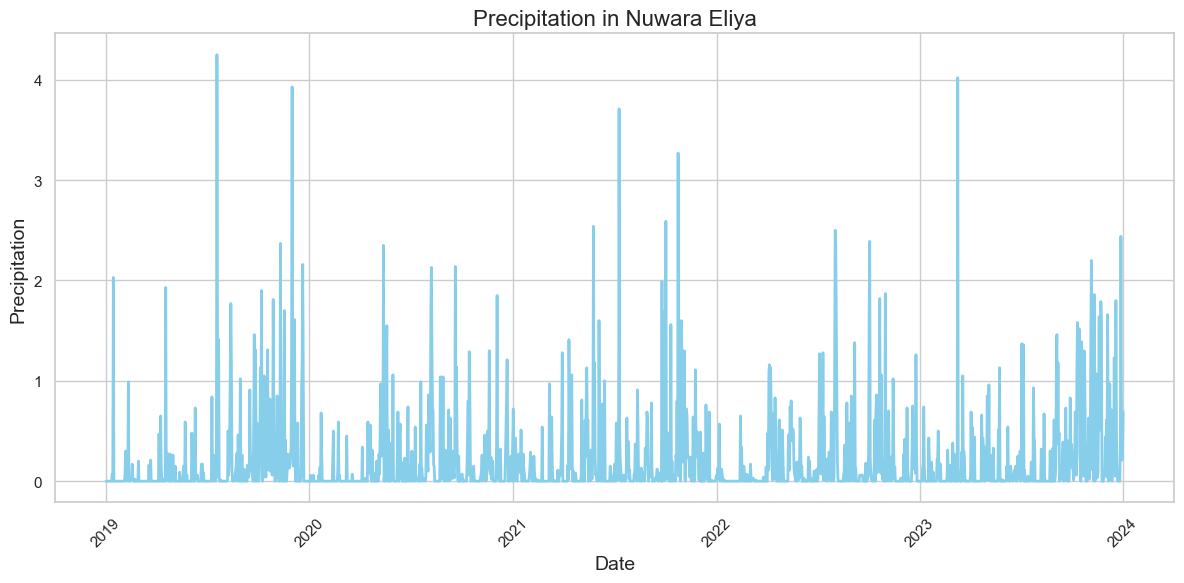

In [122]:
# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='PRCP', color='skyblue', linewidth=2)

# Customize titles and labels
plt.title('Precipitation in Nuwara Eliya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

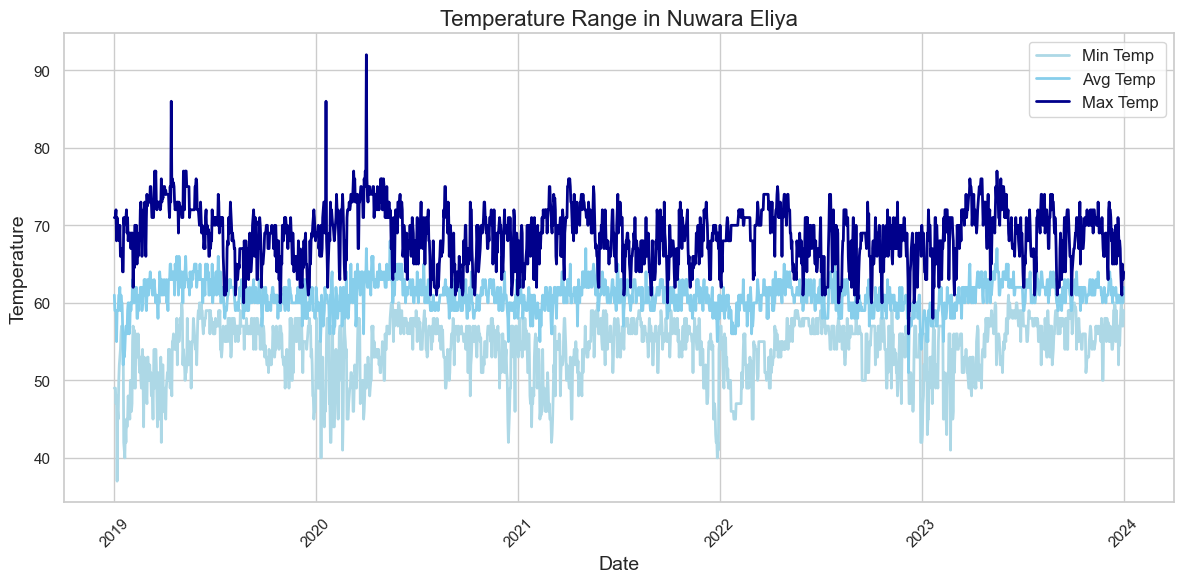

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_nuwara_eliya, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Nuwara Eliya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [124]:
fomaldihyde_nuwara_eliya = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/NuwaraEliyaHandledNullValues.csv")

In [125]:
fomaldihyde_nuwara_eliya.head()

Current Date   Next Date  HCHO reading
0   2019-01-01  2019-01-02      0.000191
1   2019-01-02  2019-01-03      0.000191
2   2019-01-03  2019-01-04      0.000191
3   2019-01-04  2019-01-05      0.000051
4   2019-01-05  2019-01-06      0.000065

In [126]:
fomaldihyde_nuwara_eliya.tail()

Current Date   Next Date  HCHO reading
1821   2023-12-27  2023-12-28      0.000043
1822   2023-12-28  2023-12-29      0.000043
1823   2023-12-29  2023-12-30      0.000043
1824   2023-12-30  2023-12-31      0.000043
1825   2023-12-31  2024-01-01      0.000043

In [127]:
fomaldihyde_nuwara_eliya.describe()

HCHO reading
count   1826.000000
mean       0.000083
std        0.000054
min       -0.000109
25%        0.000054
50%        0.000079
75%        0.000110
max        0.000293

In [128]:
weather_nuwara_eliya.head() 

Region  LATITUDE  LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  \
0  Nuwara Eliya Proper     6.967     80.767     1880.0   0.0  61.0  71.0   
1  Nuwara Eliya Proper     6.967     80.767     1880.0   0.0  59.0  71.0   
2  Nuwara Eliya Proper     6.967     80.767     1880.0   0.0  59.0  71.0   
3  Nuwara Eliya Proper     6.967     80.767     1880.0   0.0  59.0  72.0   
4  Nuwara Eliya Proper     6.967     80.767     1880.0   0.0  55.0  68.0   

   TMIN       DATE  
0  49.0 2019-01-01  
1  49.0 2019-01-02  
2  49.0 2019-01-03  
3  47.0 2019-01-04  
4  48.0 2019-01-05

In [129]:
weather_nuwara_eliya.rename(columns={"DATE":"Current Date"}, inplace=True)

In [130]:
# Convert the column in the 'object' type DataFrame to 'datetime64[ns]'
fomaldihyde_nuwara_eliya['Current Date'] = pd.to_datetime(fomaldihyde_nuwara_eliya['Current Date'])

# Perform outer join
nuwara_eliya_data = pd.merge(fomaldihyde_nuwara_eliya, weather_nuwara_eliya, on='Current Date', how='outer')

In [131]:
weather_nuwara_eliya["Current Date"].unique().shape

(1827,)

In [132]:
weather_nuwara_eliya.isnull().sum() 

Region          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
Current Date    0
dtype: int64

In [133]:
nuwara_eliya_data.drop(1826, inplace=True)
nuwara_eliya_data.shape

(1826, 11)

In [134]:
nuwara_eliya_data.head()

Current Date   Next Date  HCHO reading               Region  LATITUDE  \
0   2019-01-01  2019-01-02      0.000191  Nuwara Eliya Proper     6.967   
1   2019-01-02  2019-01-03      0.000191  Nuwara Eliya Proper     6.967   
2   2019-01-03  2019-01-04      0.000191  Nuwara Eliya Proper     6.967   
3   2019-01-04  2019-01-05      0.000051  Nuwara Eliya Proper     6.967   
4   2019-01-05  2019-01-06      0.000065  Nuwara Eliya Proper     6.967   

   LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  TMIN  
0     80.767     1880.0   0.0  61.0  71.0  49.0  
1     80.767     1880.0   0.0  59.0  71.0  49.0  
2     80.767     1880.0   0.0  59.0  71.0  49.0  
3     80.767     1880.0   0.0  59.0  72.0  47.0  
4     80.767     1880.0   0.0  55.0  68.0  48.0

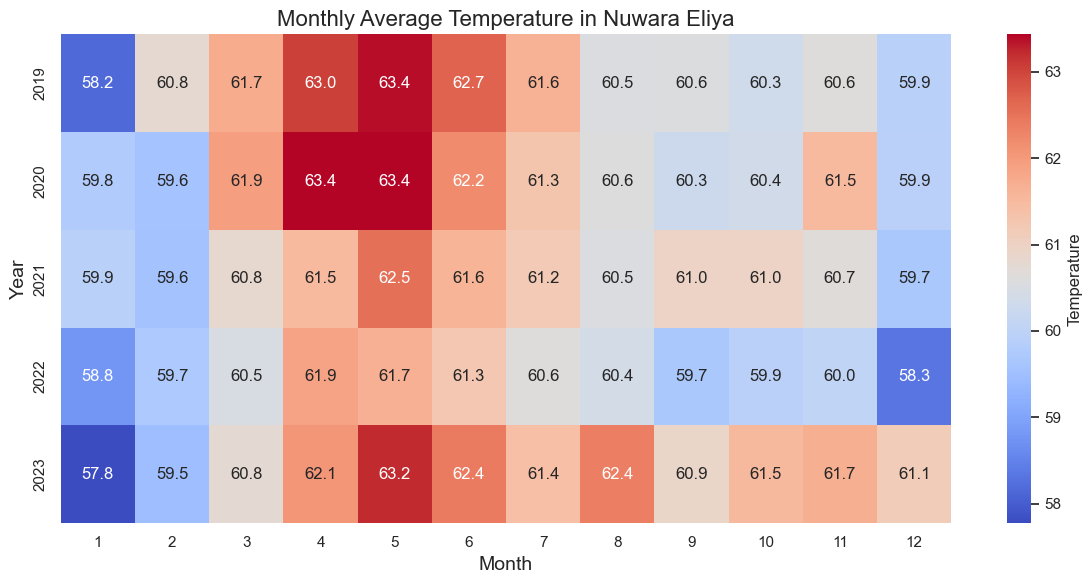

In [135]:
# Convert the 'Current Date' column to datetime format
nuwara_eliya_data['Year'] = nuwara_eliya_data['Current Date'].dt.year
nuwara_eliya_data['Month'] = nuwara_eliya_data['Current Date'].dt.month

# Pivot the data to have years as rows and months as columns
weather_pivot = nuwara_eliya_data.pivot_table(index='Year', columns='Month', values='TAVG', aggfunc='mean')

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the heatmap
sns.heatmap(weather_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Temperature'})

# Customize titles and labels
plt.title('Monthly Average Temperature in Nuwara Eliya', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [136]:
nuwara_eliya_data.drop(columns=["Year", "Month"], inplace=True)

In [137]:
nuwara_eliya_data.tail()

Current Date   Next Date  HCHO reading               Region  LATITUDE  \
1821   2023-12-27  2023-12-28      0.000043  Nuwara Eliya Proper     6.967   
1822   2023-12-28  2023-12-29      0.000043  Nuwara Eliya Proper     6.967   
1823   2023-12-29  2023-12-30      0.000043  Nuwara Eliya Proper     6.967   
1824   2023-12-30  2023-12-31      0.000043  Nuwara Eliya Proper     6.967   
1825   2023-12-31  2024-01-01      0.000043  Nuwara Eliya Proper     6.967   

      LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  TMIN  
1821     80.767     1880.0  0.35  61.0  64.0  59.0  
1822     80.767     1880.0  2.44  61.0  62.0  60.0  
1823     80.767     1880.0  0.64  60.0  61.0  59.0  
1824     80.767     1880.0  0.21  60.0  65.0  57.0  
1825     80.767     1880.0  0.28  60.0  63.0  57.0

In [138]:
nuwara_eliya_data.describe()

Current Date  HCHO reading      LATITUDE  LONGITUDE  ELEVATION  \
count                 1826   1826.000000  1.826000e+03   1826.000     1826.0   
mean   2021-07-01 12:00:00      0.000083  6.967000e+00     80.767     1880.0   
min    2019-01-01 00:00:00     -0.000109  6.967000e+00     80.767     1880.0   
25%    2020-04-01 06:00:00      0.000054  6.967000e+00     80.767     1880.0   
50%    2021-07-01 12:00:00      0.000079  6.967000e+00     80.767     1880.0   
75%    2022-09-30 18:00:00      0.000110  6.967000e+00     80.767     1880.0   
max    2023-12-31 00:00:00      0.000293  6.967000e+00     80.767     1880.0   
std                    NaN      0.000054  8.884217e-16      0.000        0.0   

              PRCP         TAVG         TMAX         TMIN  
count  1826.000000  1826.000000  1826.000000  1826.000000  
mean      0.199343    60.922508    68.795728    54.127601  
min       0.000000    51.000000    56.000000    37.000000  
25%       0.000000    60.000000    66.000000    52.000000  
50%       0.010000    61.000000    69.000000    55.000000  
75%       0.190000    62.000000    71.000000    57.000000  
max       4.250000    68.000000    92.000000    61.000000  
std       0.424073     1.931468     3.631771     3.831718

In [139]:
nuwara_eliya_data[nuwara_eliya_data["LATITUDE"].isna() == True] 

Empty DataFrame
Columns: [Current Date, Next Date, HCHO reading, Region, LATITUDE, LONGITUDE, ELEVATION, PRCP, TAVG, TMAX, TMIN]
Index: []

In [140]:
nuwara_eliya_data_copy = nuwara_eliya_data.copy()

# Drop specified columns
nuwara_eliya_data_copy.drop(columns=["LATITUDE", "LONGITUDE", "ELEVATION"], inplace=True)

# Calculate correlation matrix using Pearson method
correlation_matrix =  nuwara_eliya_data_copy.corr(method="pearson", numeric_only=True)
correlation_matrix

HCHO reading      PRCP      TAVG      TMAX      TMIN
HCHO reading      1.000000 -0.025234  0.029537  0.153014 -0.139301
PRCP             -0.025234  1.000000 -0.086181 -0.273322  0.201576
TAVG              0.029537 -0.086181  1.000000  0.522359  0.326624
TMAX              0.153014 -0.273322  0.522359  1.000000 -0.363431
TMIN             -0.139301  0.201576  0.326624 -0.363431  1.000000

In [141]:
#### This shows that Maximum and Minimum temperatures have a very slight correlation with HCHO reading

In [142]:
nuwara_eliya_data_copy.corr(method="pearson", numeric_only=True)["HCHO reading"]

HCHO reading    1.000000
PRCP           -0.025234
TAVG            0.029537
TMAX            0.153014
TMIN           -0.139301
Name: HCHO reading, dtype: float64

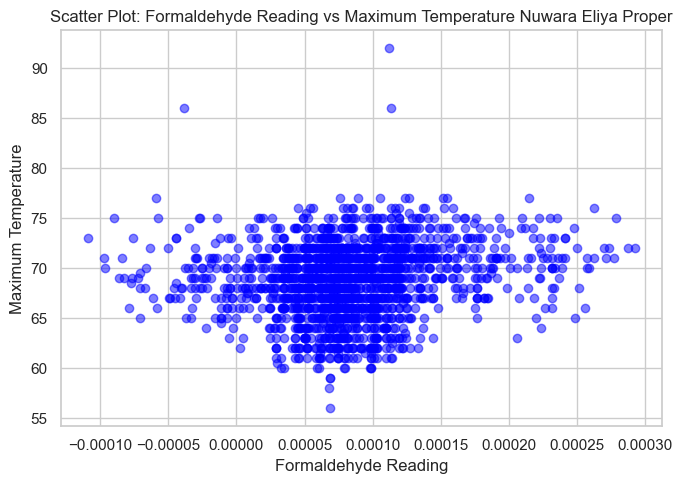

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(nuwara_eliya_data["HCHO reading"], nuwara_eliya_data["TMAX"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Maximum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Maximum Temperature Nuwara Eliya Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout() 
plt.show()

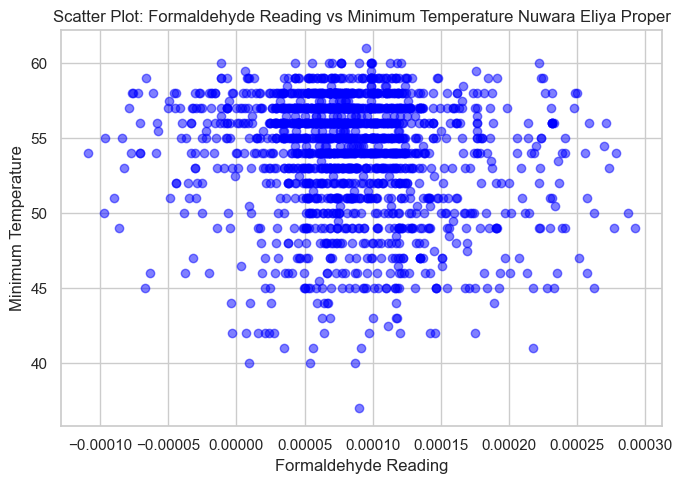

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(nuwara_eliya_data["HCHO reading"], nuwara_eliya_data["TMIN"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Minimum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Minimum Temperature Nuwara Eliya Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show() 

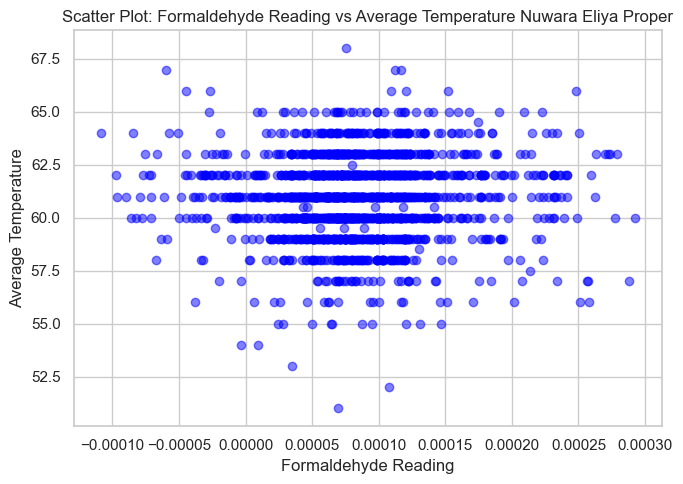

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(nuwara_eliya_data["HCHO reading"], nuwara_eliya_data["TAVG"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Average Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Average Temperature Nuwara Eliya Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### source of data : https://power.larc.nasa.gov/data-access-viewer/

#### https://www.latlong.net/place/kandy-sri-lanka-4684.html

## Kandy Weather Analysis

In [146]:
weather_kandy = pd.read_csv("../FomaldihydeAnalysis/OtherData/kandy.csv")

In [147]:
weather_kandy.shape

(1826, 8)

In [148]:
weather_kandy.isnull().sum()

YEAR           0
MO             0
DY             0
T2M            0
T2M_MAX        0
T2M_MIN        0
PRECTOTCORR    0
QV2M           0
dtype: int64

In [149]:
weather_kandy.drop(columns=["QV2M"], inplace=True)

In [150]:
weather_kandy.head()

YEAR  MO  DY    T2M  T2M_MAX  T2M_MIN  PRECTOTCORR
0  2019   1   1  21.72    26.44    18.53         0.09
1  2019   1   2  21.18    25.98    17.62         0.01
2  2019   1   3  20.96    26.36    16.80         0.02
3  2019   1   4  20.68    26.45    16.23         0.00
4  2019   1   5  22.26    28.07    17.80         0.04

In [151]:
weather_kandy.rename(columns={"T2M":"TAVG", "T2M_MAX":"TMAX", "T2M_MIN":"TMIN"
                             , "PRECTOTCORR":"PRCP"}, inplace=True)

In [152]:
weather_kandy.head()

YEAR  MO  DY   TAVG   TMAX   TMIN  PRCP
0  2019   1   1  21.72  26.44  18.53  0.09
1  2019   1   2  21.18  25.98  17.62  0.01
2  2019   1   3  20.96  26.36  16.80  0.02
3  2019   1   4  20.68  26.45  16.23  0.00
4  2019   1   5  22.26  28.07  17.80  0.04

In [153]:
weather_kandy['DATE'] = pd.to_datetime({
    'year': weather_kandy['YEAR'],
    'month': weather_kandy['MO'],
    'day': weather_kandy['DY']
})

In [154]:
weather_kandy.shape

(1826, 8)

In [155]:
weather_kandy.head()

YEAR  MO  DY   TAVG   TMAX   TMIN  PRCP       DATE
0  2019   1   1  21.72  26.44  18.53  0.09 2019-01-01
1  2019   1   2  21.18  25.98  17.62  0.01 2019-01-02
2  2019   1   3  20.96  26.36  16.80  0.02 2019-01-03
3  2019   1   4  20.68  26.45  16.23  0.00 2019-01-04
4  2019   1   5  22.26  28.07  17.80  0.04 2019-01-05

In [156]:
weather_kandy.drop(columns=["YEAR", "MO", "DY"], inplace=True)

In [157]:
weather_kandy.head()

TAVG   TMAX   TMIN  PRCP       DATE
0  21.72  26.44  18.53  0.09 2019-01-01
1  21.18  25.98  17.62  0.01 2019-01-02
2  20.96  26.36  16.80  0.02 2019-01-03
3  20.68  26.45  16.23  0.00 2019-01-04
4  22.26  28.07  17.80  0.04 2019-01-05

In [158]:
weather_kandy['TAVG'] = (weather_kandy['TAVG'] * 9/5) + 32
weather_kandy['TMAX'] = (weather_kandy['TMAX'] * 9/5) + 32
weather_kandy['TMIN'] = (weather_kandy['TMIN'] * 9/5) + 32

In [159]:
weather_kandy.head()

TAVG    TMAX    TMIN  PRCP       DATE
0  71.096  79.592  65.354  0.09 2019-01-01
1  70.124  78.764  63.716  0.01 2019-01-02
2  69.728  79.448  62.240  0.02 2019-01-03
3  69.224  79.610  61.214  0.00 2019-01-04
4  72.068  82.526  64.040  0.04 2019-01-05

In [160]:
weather_kandy["LATITUDE"] = 7.29 
weather_kandy["LONGITUDE"] = 80.63

In [161]:
weather_kandy.shape

(1826, 7)

In [162]:
weather_kandy.head()

TAVG    TMAX    TMIN  PRCP       DATE  LATITUDE  LONGITUDE
0  71.096  79.592  65.354  0.09 2019-01-01      7.29      80.63
1  70.124  78.764  63.716  0.01 2019-01-02      7.29      80.63
2  69.728  79.448  62.240  0.02 2019-01-03      7.29      80.63
3  69.224  79.610  61.214  0.00 2019-01-04      7.29      80.63
4  72.068  82.526  64.040  0.04 2019-01-05      7.29      80.63

In [163]:
weather_kandy["ELEVATION"] = 500

In [164]:
weather_kandy.head()

TAVG    TMAX    TMIN  PRCP       DATE  LATITUDE  LONGITUDE  ELEVATION
0  71.096  79.592  65.354  0.09 2019-01-01      7.29      80.63        500
1  70.124  78.764  63.716  0.01 2019-01-02      7.29      80.63        500
2  69.728  79.448  62.240  0.02 2019-01-03      7.29      80.63        500
3  69.224  79.610  61.214  0.00 2019-01-04      7.29      80.63        500
4  72.068  82.526  64.040  0.04 2019-01-05      7.29      80.63        500

In [165]:
weather_kandy["Region"] = "Kandy Proper"

In [166]:
weather_kandy = weather_kandy[["Region", "LATITUDE", "LONGITUDE", "ELEVATION", "PRCP", "TAVG", "TMAX", "TMIN", "DATE"]]
weather_kandy.head()

Region  LATITUDE  LONGITUDE  ELEVATION  PRCP    TAVG    TMAX    TMIN  \
0  Kandy Proper      7.29      80.63        500  0.09  71.096  79.592  65.354   
1  Kandy Proper      7.29      80.63        500  0.01  70.124  78.764  63.716   
2  Kandy Proper      7.29      80.63        500  0.02  69.728  79.448  62.240   
3  Kandy Proper      7.29      80.63        500  0.00  69.224  79.610  61.214   
4  Kandy Proper      7.29      80.63        500  0.04  72.068  82.526  64.040   

        DATE  
0 2019-01-01  
1 2019-01-02  
2 2019-01-03  
3 2019-01-04  
4 2019-01-05

In [167]:
weather_kandy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Region     1826 non-null   object        
 1   LATITUDE   1826 non-null   float64       
 2   LONGITUDE  1826 non-null   float64       
 3   ELEVATION  1826 non-null   int64         
 4   PRCP       1826 non-null   float64       
 5   TAVG       1826 non-null   float64       
 6   TMAX       1826 non-null   float64       
 7   TMIN       1826 non-null   float64       
 8   DATE       1826 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 128.5+ KB


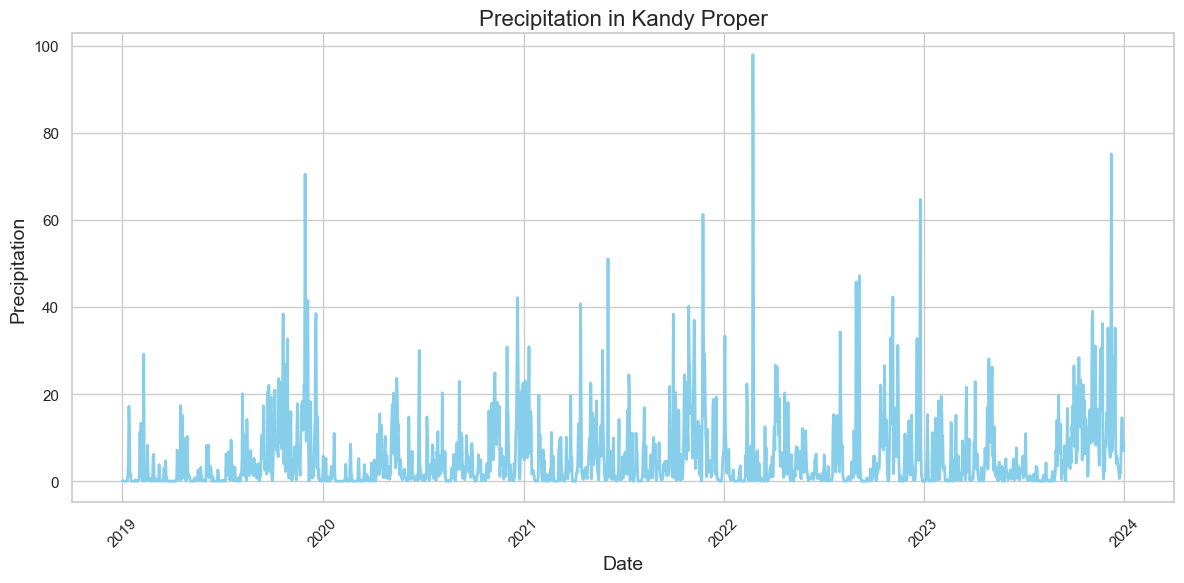

In [168]:
# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_kandy, x='DATE', y='PRCP', color='skyblue', linewidth=2)

# Customize titles and labels
plt.title('Precipitation in Kandy Proper', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

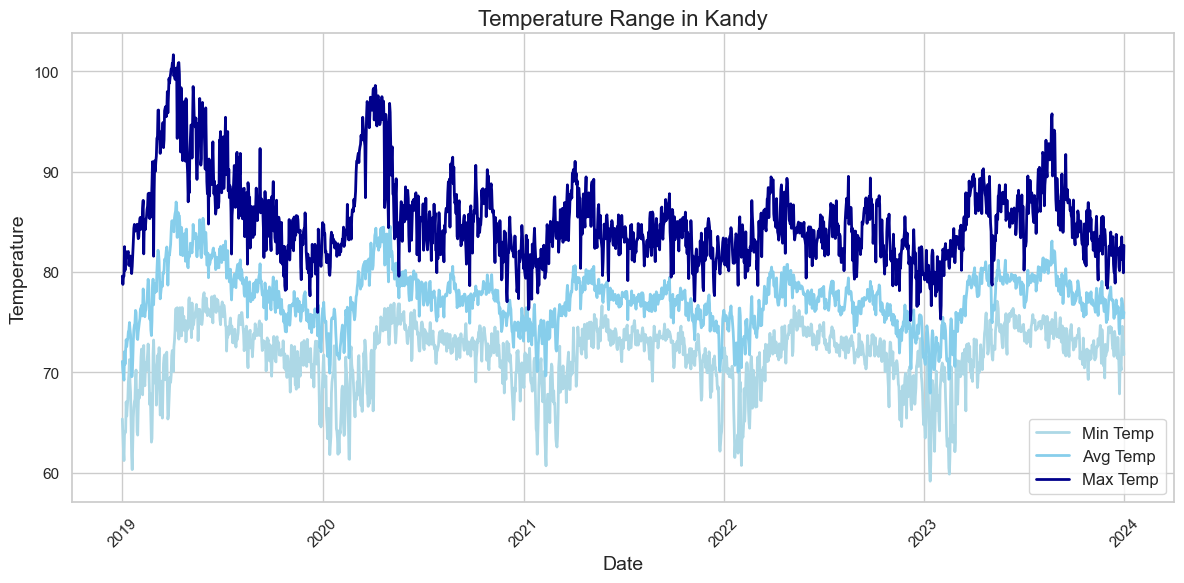

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_kandy, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_kandy, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_kandy, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Kandy', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [170]:
fomaldihyde_kandy = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/KandyHandledNullValues.csv")

In [171]:
fomaldihyde_kandy.head()

Current Date   Next Date  HCHO reading
0   2019-01-01  2019-01-02      0.000176
1   2019-01-02  2019-01-03      0.000092
2   2019-01-03  2019-01-04      0.000134
3   2019-01-04  2019-01-05      0.000191
4   2019-01-05  2019-01-06      0.000122

In [172]:
fomaldihyde_kandy.tail()

Current Date   Next Date  HCHO reading
1821   2023-12-27  2023-12-28      0.000070
1822   2023-12-28  2023-12-29      0.000032
1823   2023-12-29  2023-12-30      0.000032
1824   2023-12-30  2023-12-31      0.000056
1825   2023-12-31  2024-01-01      0.000049

In [173]:
fomaldihyde_kandy.describe()

HCHO reading
count   1826.000000
mean       0.000101
std        0.000068
min       -0.000120
25%        0.000061
50%        0.000099
75%        0.000139
max        0.000322

In [174]:
weather_kandy.head() 

Region  LATITUDE  LONGITUDE  ELEVATION  PRCP    TAVG    TMAX    TMIN  \
0  Kandy Proper      7.29      80.63        500  0.09  71.096  79.592  65.354   
1  Kandy Proper      7.29      80.63        500  0.01  70.124  78.764  63.716   
2  Kandy Proper      7.29      80.63        500  0.02  69.728  79.448  62.240   
3  Kandy Proper      7.29      80.63        500  0.00  69.224  79.610  61.214   
4  Kandy Proper      7.29      80.63        500  0.04  72.068  82.526  64.040   

        DATE  
0 2019-01-01  
1 2019-01-02  
2 2019-01-03  
3 2019-01-04  
4 2019-01-05

In [175]:
weather_kandy.rename(columns={"DATE":"Current Date"}, inplace=True)

In [176]:
# Convert the column in the 'object' type DataFrame to 'datetime64[ns]'
fomaldihyde_kandy['Current Date'] = pd.to_datetime(fomaldihyde_kandy['Current Date'])

# Perform outer join
kandy_data = pd.merge(fomaldihyde_kandy, weather_kandy, on='Current Date', how='outer')

In [177]:
kandy_data.head()

Current Date   Next Date  HCHO reading        Region  LATITUDE  LONGITUDE  \
0   2019-01-01  2019-01-02      0.000176  Kandy Proper      7.29      80.63   
1   2019-01-02  2019-01-03      0.000092  Kandy Proper      7.29      80.63   
2   2019-01-03  2019-01-04      0.000134  Kandy Proper      7.29      80.63   
3   2019-01-04  2019-01-05      0.000191  Kandy Proper      7.29      80.63   
4   2019-01-05  2019-01-06      0.000122  Kandy Proper      7.29      80.63   

   ELEVATION  PRCP    TAVG    TMAX    TMIN  
0        500  0.09  71.096  79.592  65.354  
1        500  0.01  70.124  78.764  63.716  
2        500  0.02  69.728  79.448  62.240  
3        500  0.00  69.224  79.610  61.214  
4        500  0.04  72.068  82.526  64.040

In [178]:
weather_kandy["Current Date"].unique().shape

(1826,)

In [179]:
weather_kandy.isnull().sum() 

Region          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
Current Date    0
dtype: int64

In [180]:
kandy_data.head() 

Current Date   Next Date  HCHO reading        Region  LATITUDE  LONGITUDE  \
0   2019-01-01  2019-01-02      0.000176  Kandy Proper      7.29      80.63   
1   2019-01-02  2019-01-03      0.000092  Kandy Proper      7.29      80.63   
2   2019-01-03  2019-01-04      0.000134  Kandy Proper      7.29      80.63   
3   2019-01-04  2019-01-05      0.000191  Kandy Proper      7.29      80.63   
4   2019-01-05  2019-01-06      0.000122  Kandy Proper      7.29      80.63   

   ELEVATION  PRCP    TAVG    TMAX    TMIN  
0        500  0.09  71.096  79.592  65.354  
1        500  0.01  70.124  78.764  63.716  
2        500  0.02  69.728  79.448  62.240  
3        500  0.00  69.224  79.610  61.214  
4        500  0.04  72.068  82.526  64.040

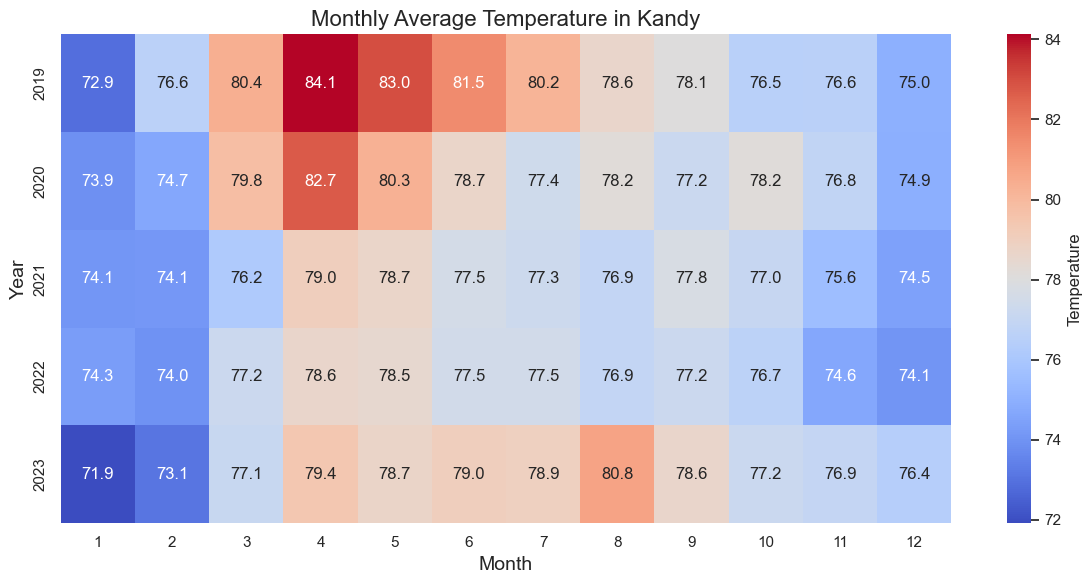

In [181]:
# Convert the 'Current Date' column to datetime format
kandy_data['Year'] = kandy_data['Current Date'].dt.year
kandy_data['Month'] = kandy_data['Current Date'].dt.month

# Pivot the data to have years as rows and months as columns
weather_pivot = kandy_data.pivot_table(index='Year', columns='Month', values='TAVG', aggfunc='mean')

# Set up the figure and axes
plt.figure(figsize=(12, 6)) 

# Plot the heatmap
sns.heatmap(weather_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Temperature'})

# Customize titles and labels
plt.title('Monthly Average Temperature in Kandy', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [182]:
kandy_data.drop(columns=["Year", "Month"], inplace=True) 

In [183]:
kandy_data.tail() 

Current Date   Next Date  HCHO reading        Region  LATITUDE  \
1821   2023-12-27  2023-12-28      0.000070  Kandy Proper      7.29   
1822   2023-12-28  2023-12-29      0.000032  Kandy Proper      7.29   
1823   2023-12-29  2023-12-30      0.000032  Kandy Proper      7.29   
1824   2023-12-30  2023-12-31      0.000056  Kandy Proper      7.29   
1825   2023-12-31  2024-01-01      0.000049  Kandy Proper      7.29   

      LONGITUDE  ELEVATION   PRCP    TAVG    TMAX    TMIN  
1821      80.63        500  14.56  77.360  83.498  73.184  
1822      80.63        500  14.48  77.090  81.230  74.588  
1823      80.63        500   9.29  76.640  82.094  73.526  
1824      80.63        500   6.99  75.416  79.916  72.824  
1825      80.63        500   8.61  75.992  82.652  71.762

In [184]:
kandy_data.describe() 

Current Date  HCHO reading      LATITUDE  LONGITUDE  ELEVATION  \
count                 1826   1826.000000  1.826000e+03    1826.00     1826.0   
mean   2021-07-01 12:00:00      0.000101  7.290000e+00      80.63      500.0   
min    2019-01-01 00:00:00     -0.000120  7.290000e+00      80.63      500.0   
25%    2020-04-01 06:00:00      0.000061  7.290000e+00      80.63      500.0   
50%    2021-07-01 12:00:00      0.000099  7.290000e+00      80.63      500.0   
75%    2022-09-30 18:00:00      0.000139  7.290000e+00      80.63      500.0   
max    2023-12-31 00:00:00      0.000322  7.290000e+00      80.63      500.0   
std                    NaN      0.000068  2.665265e-15       0.00        0.0   

              PRCP         TAVG         TMAX         TMIN  
count  1826.000000  1826.000000  1826.000000  1826.000000  
mean      5.450772    77.341882    85.201129    71.713244  
min       0.000000    67.928000    75.164000    59.162000  
25%       0.292500    75.704000    82.418000    70.308500  
50%       2.100000    77.414000    84.416000    72.428000  
75%       7.090000    78.944000    87.089000    73.850000  
max      97.890000    86.972000   101.642000    77.936000  
std       8.319945     2.783011     4.254674     3.172491

In [185]:
kandy_data[kandy_data["LATITUDE"].isna() == True]   

Empty DataFrame
Columns: [Current Date, Next Date, HCHO reading, Region, LATITUDE, LONGITUDE, ELEVATION, PRCP, TAVG, TMAX, TMIN]
Index: []

In [186]:
kandy_data_copy = kandy_data.copy()

# Drop specified columns
kandy_data_copy.drop(columns=["LATITUDE", "LONGITUDE", "ELEVATION"], inplace=True)

# Calculate correlation matrix using Pearson method
correlation_matrix =  kandy_data_copy.corr(method="pearson", numeric_only=True)
correlation_matrix 

HCHO reading      PRCP      TAVG      TMAX      TMIN
HCHO reading      1.000000 -0.023929  0.162298  0.248444 -0.044744
PRCP             -0.023929  1.000000 -0.117315 -0.296111  0.123072
TAVG              0.162298 -0.117315  1.000000  0.848373  0.745154
TMAX              0.248444 -0.296111  0.848373  1.000000  0.304645
TMIN             -0.044744  0.123072  0.745154  0.304645  1.000000

In [187]:
kandy_data_copy.corr(method="pearson", numeric_only=True)["HCHO reading"]

HCHO reading    1.000000
PRCP           -0.023929
TAVG            0.162298
TMAX            0.248444
TMIN           -0.044744
Name: HCHO reading, dtype: float64

#### There is a slight correlation with maximum temperature and Fomaldihyde rates

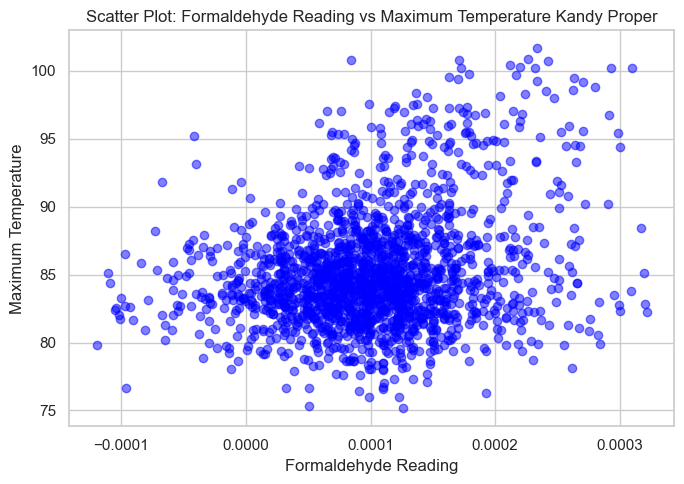

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot 
plt.scatter(kandy_data["HCHO reading"], kandy_data["TMAX"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Maximum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Maximum Temperature Kandy Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout() 
plt.show()

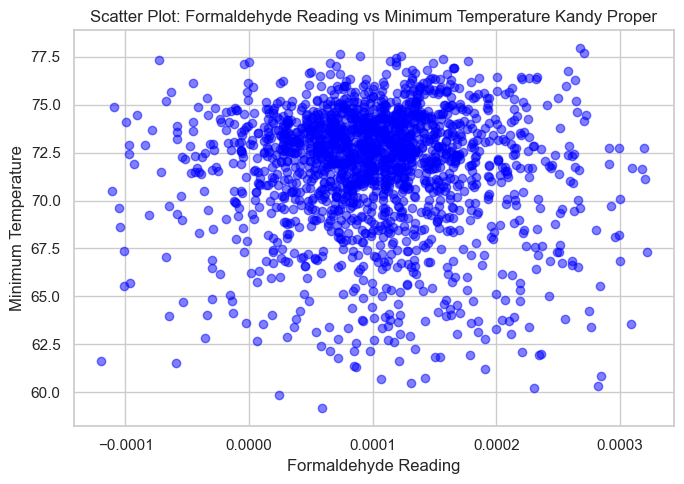

In [189]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
 
# Create a scatter plot
plt.scatter(kandy_data["HCHO reading"], kandy_data["TMIN"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Minimum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Minimum Temperature Kandy Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show() 

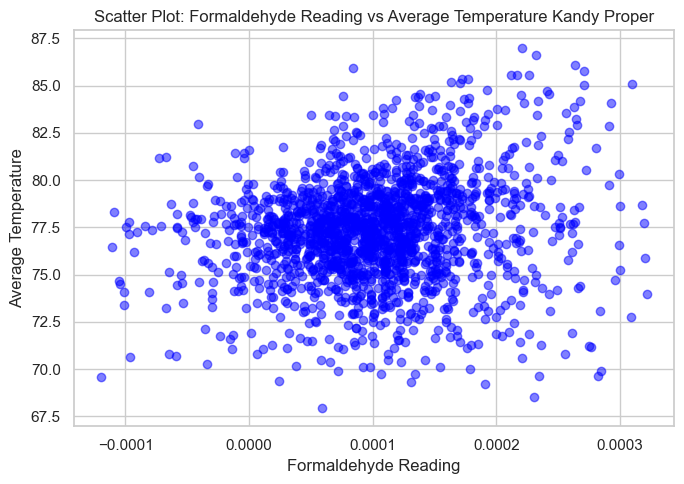

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(kandy_data["HCHO reading"], kandy_data["TAVG"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading') 
plt.ylabel('Average Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Average Temperature Kandy Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [191]:
kandy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Current Date  1826 non-null   datetime64[ns]
 1   Next Date     1826 non-null   object        
 2   HCHO reading  1826 non-null   float64       
 3   Region        1826 non-null   object        
 4   LATITUDE      1826 non-null   float64       
 5   LONGITUDE     1826 non-null   float64       
 6   ELEVATION     1826 non-null   int64         
 7   PRCP          1826 non-null   float64       
 8   TAVG          1826 non-null   float64       
 9   TMAX          1826 non-null   float64       
 10  TMIN          1826 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 157.1+ KB


In [192]:
kandy_data.head()

Current Date   Next Date  HCHO reading        Region  LATITUDE  LONGITUDE  \
0   2019-01-01  2019-01-02      0.000176  Kandy Proper      7.29      80.63   
1   2019-01-02  2019-01-03      0.000092  Kandy Proper      7.29      80.63   
2   2019-01-03  2019-01-04      0.000134  Kandy Proper      7.29      80.63   
3   2019-01-04  2019-01-05      0.000191  Kandy Proper      7.29      80.63   
4   2019-01-05  2019-01-06      0.000122  Kandy Proper      7.29      80.63   

   ELEVATION  PRCP    TAVG    TMAX    TMIN  
0        500  0.09  71.096  79.592  65.354  
1        500  0.01  70.124  78.764  63.716  
2        500  0.02  69.728  79.448  62.240  
3        500  0.00  69.224  79.610  61.214  
4        500  0.04  72.068  82.526  64.040

## Jaffna Proper weather Analysis

#### source : https://latitudelongitude.org/lk/jaffna/

In [193]:
weather_jaffna = pd.read_csv("../FomaldihydeAnalysis/OtherData/jaffna.csv")

In [194]:
weather_jaffna.shape 

(1826, 8)

In [195]:
weather_jaffna.isnull().sum()

YEAR           0
MO             0
DY             0
T2M            0
T2M_MAX        0
T2M_MIN        0
PRECTOTCORR    0
QV2M           0
dtype: int64

In [196]:
weather_jaffna.drop(columns=["QV2M"], inplace=True)

In [197]:
weather_jaffna.head()

YEAR  MO  DY    T2M  T2M_MAX  T2M_MIN  PRECTOTCORR
0  2019   1   1  25.09    26.42    23.92         0.00
1  2019   1   2  25.07    26.55    23.65         0.00
2  2019   1   3  25.35    26.84    24.11         0.00
3  2019   1   4  25.31    26.84    23.95         0.00
4  2019   1   5  25.55    26.95    24.41         0.03

In [198]:
weather_jaffna.rename(columns={"T2M":"TAVG", "T2M_MAX":"TMAX", "T2M_MIN":"TMIN"
                             , "PRECTOTCORR":"PRCP"}, inplace=True)

In [199]:
weather_jaffna.head()

YEAR  MO  DY   TAVG   TMAX   TMIN  PRCP
0  2019   1   1  25.09  26.42  23.92  0.00
1  2019   1   2  25.07  26.55  23.65  0.00
2  2019   1   3  25.35  26.84  24.11  0.00
3  2019   1   4  25.31  26.84  23.95  0.00
4  2019   1   5  25.55  26.95  24.41  0.03

In [200]:
weather_jaffna['DATE'] = pd.to_datetime({
    'year': weather_jaffna['YEAR'],
    'month': weather_jaffna['MO'],
    'day': weather_jaffna['DY']
})

In [201]:
weather_jaffna.shape

(1826, 8)

In [202]:
weather_jaffna.head()

YEAR  MO  DY   TAVG   TMAX   TMIN  PRCP       DATE
0  2019   1   1  25.09  26.42  23.92  0.00 2019-01-01
1  2019   1   2  25.07  26.55  23.65  0.00 2019-01-02
2  2019   1   3  25.35  26.84  24.11  0.00 2019-01-03
3  2019   1   4  25.31  26.84  23.95  0.00 2019-01-04
4  2019   1   5  25.55  26.95  24.41  0.03 2019-01-05

In [203]:
weather_jaffna.drop(columns=["YEAR", "MO", "DY"], inplace=True)

In [204]:
weather_jaffna.head()

TAVG   TMAX   TMIN  PRCP       DATE
0  25.09  26.42  23.92  0.00 2019-01-01
1  25.07  26.55  23.65  0.00 2019-01-02
2  25.35  26.84  24.11  0.00 2019-01-03
3  25.31  26.84  23.95  0.00 2019-01-04
4  25.55  26.95  24.41  0.03 2019-01-05

In [205]:
weather_jaffna['TAVG'] = (weather_jaffna['TAVG'] * 9/5) + 32
weather_jaffna['TMAX'] = (weather_jaffna['TMAX'] * 9/5) + 32
weather_jaffna['TMIN'] = (weather_jaffna['TMIN'] * 9/5) + 32

In [206]:
weather_jaffna.head()

TAVG    TMAX    TMIN  PRCP       DATE
0  77.162  79.556  75.056  0.00 2019-01-01
1  77.126  79.790  74.570  0.00 2019-01-02
2  77.630  80.312  75.398  0.00 2019-01-03
3  77.558  80.312  75.110  0.00 2019-01-04
4  77.990  80.510  75.938  0.03 2019-01-05

In [207]:
weather_jaffna["LATITUDE"] = 9.66
weather_jaffna["LONGITUDE"] = 80.00

In [208]:
weather_jaffna.shape

(1826, 7)

In [209]:
weather_jaffna.head()

TAVG    TMAX    TMIN  PRCP       DATE  LATITUDE  LONGITUDE
0  77.162  79.556  75.056  0.00 2019-01-01      9.66       80.0
1  77.126  79.790  74.570  0.00 2019-01-02      9.66       80.0
2  77.630  80.312  75.398  0.00 2019-01-03      9.66       80.0
3  77.558  80.312  75.110  0.00 2019-01-04      9.66       80.0
4  77.990  80.510  75.938  0.03 2019-01-05      9.66       80.0

In [210]:
weather_jaffna["ELEVATION"] = 5

In [211]:
weather_jaffna.head()

TAVG    TMAX    TMIN  PRCP       DATE  LATITUDE  LONGITUDE  ELEVATION
0  77.162  79.556  75.056  0.00 2019-01-01      9.66       80.0          5
1  77.126  79.790  74.570  0.00 2019-01-02      9.66       80.0          5
2  77.630  80.312  75.398  0.00 2019-01-03      9.66       80.0          5
3  77.558  80.312  75.110  0.00 2019-01-04      9.66       80.0          5
4  77.990  80.510  75.938  0.03 2019-01-05      9.66       80.0          5

In [212]:
weather_jaffna["Region"] = "Jaffna Proper"

In [213]:
weather_jaffna = weather_jaffna[["Region", "LATITUDE", "LONGITUDE", "ELEVATION", "PRCP", "TAVG", "TMAX", "TMIN", "DATE"]]
weather_jaffna.head()

Region  LATITUDE  LONGITUDE  ELEVATION  PRCP    TAVG    TMAX  \
0  Jaffna Proper      9.66       80.0          5  0.00  77.162  79.556   
1  Jaffna Proper      9.66       80.0          5  0.00  77.126  79.790   
2  Jaffna Proper      9.66       80.0          5  0.00  77.630  80.312   
3  Jaffna Proper      9.66       80.0          5  0.00  77.558  80.312   
4  Jaffna Proper      9.66       80.0          5  0.03  77.990  80.510   

     TMIN       DATE  
0  75.056 2019-01-01  
1  74.570 2019-01-02  
2  75.398 2019-01-03  
3  75.110 2019-01-04  
4  75.938 2019-01-05

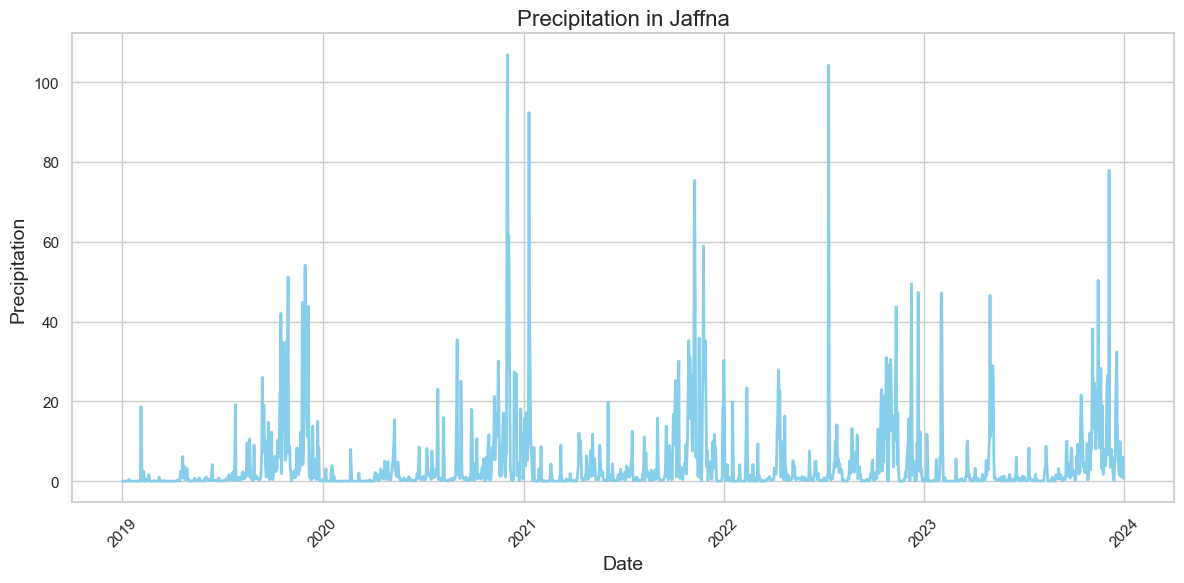

In [214]:
# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_jaffna, x='DATE', y='PRCP', color='skyblue', linewidth=2)

# Customize titles and labels
plt.title('Precipitation in Jaffna', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

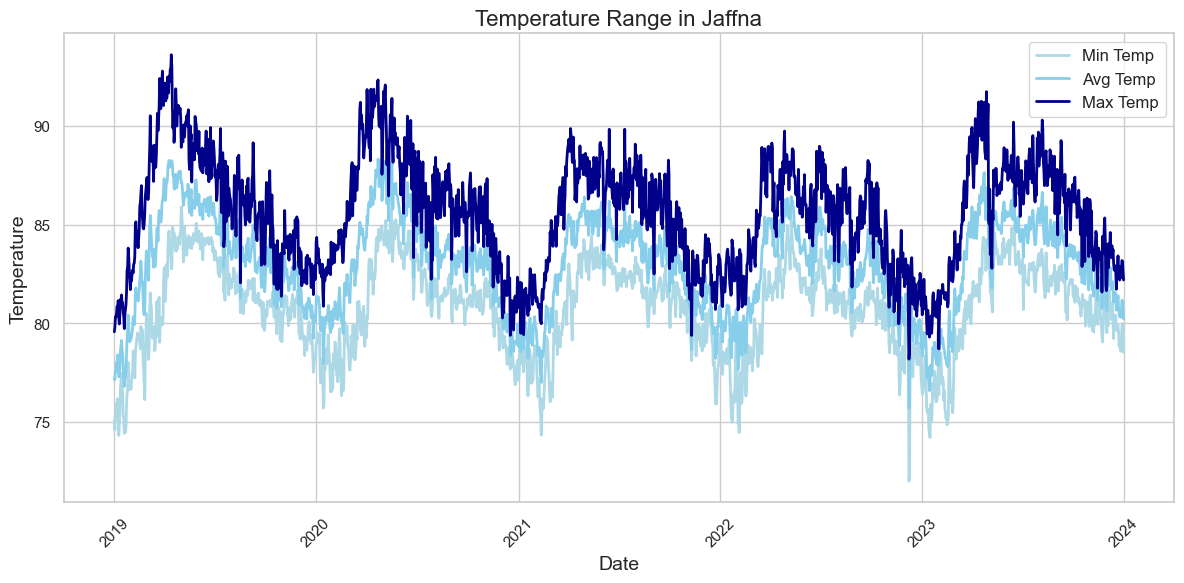

In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_jaffna, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_jaffna, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_jaffna, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Jaffna', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [216]:
fomaldihyde_jaffna = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/jaffnaHandledNullValues.csv")

In [217]:
fomaldihyde_jaffna.head()

Current Date   Next Date  HCHO reading
0   2019-01-01  2019-01-02      0.000058
1   2019-01-02  2019-01-03      0.000102
2   2019-01-03  2019-01-04      0.000039
3   2019-01-04  2019-01-05     -0.000002
4   2019-01-05  2019-01-06      0.000159

In [218]:
fomaldihyde_jaffna.tail()

Current Date   Next Date  HCHO reading
1821   2023-12-27  2023-12-28      0.000067
1822   2023-12-28  2023-12-29      0.000051
1823   2023-12-29  2023-12-30      0.000127
1824   2023-12-30  2023-12-31      0.000117
1825   2023-12-31  2024-01-01      0.000065

In [219]:
fomaldihyde_jaffna.describe()

HCHO reading
count   1826.000000
mean       0.000105
std        0.000060
min       -0.000089
25%        0.000067
50%        0.000101
75%        0.000139
max        0.000302

In [220]:
weather_jaffna.head() 

Region  LATITUDE  LONGITUDE  ELEVATION  PRCP    TAVG    TMAX  \
0  Jaffna Proper      9.66       80.0          5  0.00  77.162  79.556   
1  Jaffna Proper      9.66       80.0          5  0.00  77.126  79.790   
2  Jaffna Proper      9.66       80.0          5  0.00  77.630  80.312   
3  Jaffna Proper      9.66       80.0          5  0.00  77.558  80.312   
4  Jaffna Proper      9.66       80.0          5  0.03  77.990  80.510   

     TMIN       DATE  
0  75.056 2019-01-01  
1  74.570 2019-01-02  
2  75.398 2019-01-03  
3  75.110 2019-01-04  
4  75.938 2019-01-05

In [221]:
weather_jaffna.rename(columns={"DATE":"Current Date"}, inplace=True)

In [222]:
# Convert the column in the 'object' type DataFrame to 'datetime64[ns]'
fomaldihyde_jaffna['Current Date'] = pd.to_datetime(fomaldihyde_jaffna['Current Date'])

# Perform outer join
jaffna_data = pd.merge(fomaldihyde_jaffna, weather_jaffna, on='Current Date', how='outer')

In [223]:
weather_jaffna["Current Date"].unique().shape

(1826,)

In [224]:
weather_jaffna.isnull().sum() 

Region          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
Current Date    0
dtype: int64

In [225]:
jaffna_data.head() 

Current Date   Next Date  HCHO reading         Region  LATITUDE  LONGITUDE  \
0   2019-01-01  2019-01-02      0.000058  Jaffna Proper      9.66       80.0   
1   2019-01-02  2019-01-03      0.000102  Jaffna Proper      9.66       80.0   
2   2019-01-03  2019-01-04      0.000039  Jaffna Proper      9.66       80.0   
3   2019-01-04  2019-01-05     -0.000002  Jaffna Proper      9.66       80.0   
4   2019-01-05  2019-01-06      0.000159  Jaffna Proper      9.66       80.0   

   ELEVATION  PRCP    TAVG    TMAX    TMIN  
0          5  0.00  77.162  79.556  75.056  
1          5  0.00  77.126  79.790  74.570  
2          5  0.00  77.630  80.312  75.398  
3          5  0.00  77.558  80.312  75.110  
4          5  0.03  77.990  80.510  75.938

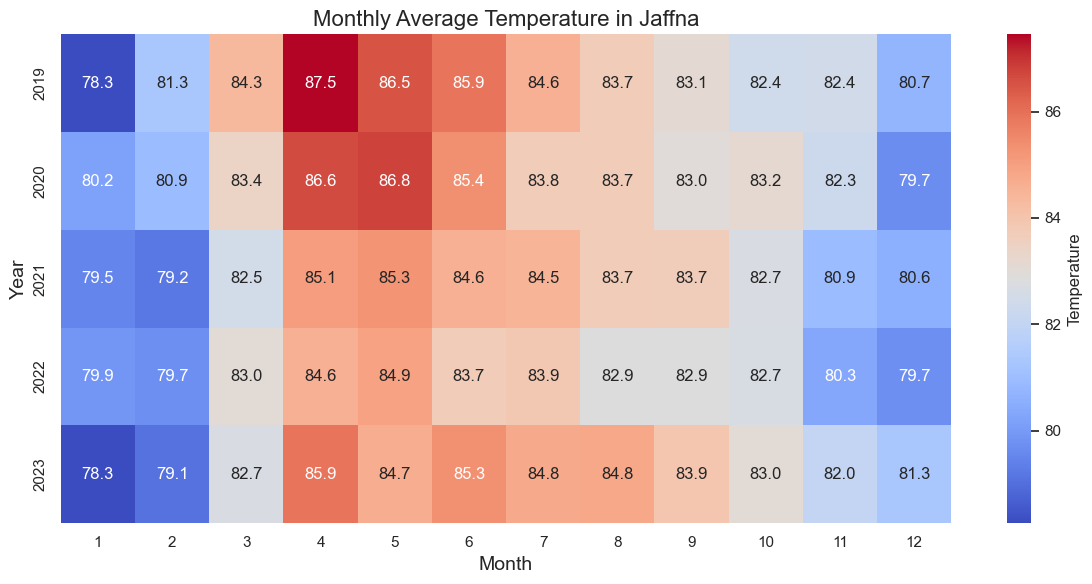

In [226]:
# Convert the 'Current Date' column to datetime format
jaffna_data['Year'] = jaffna_data['Current Date'].dt.year
jaffna_data['Month'] = jaffna_data['Current Date'].dt.month

# Pivot the data to have years as rows and months as columns
weather_pivot = jaffna_data.pivot_table(index='Year', columns='Month', values='TAVG', aggfunc='mean')

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the heatmap
sns.heatmap(weather_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Temperature'})

# Customize titles and labels
plt.title('Monthly Average Temperature in Jaffna', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [227]:
jaffna_data.drop(columns=["Year", "Month"], inplace=True)

In [228]:
jaffna_data.tail() 

Current Date   Next Date  HCHO reading         Region  LATITUDE  \
1821   2023-12-27  2023-12-28      0.000067  Jaffna Proper      9.66   
1822   2023-12-28  2023-12-29      0.000051  Jaffna Proper      9.66   
1823   2023-12-29  2023-12-30      0.000127  Jaffna Proper      9.66   
1824   2023-12-30  2023-12-31      0.000117  Jaffna Proper      9.66   
1825   2023-12-31  2024-01-01      0.000065  Jaffna Proper      9.66   

      LONGITUDE  ELEVATION  PRCP    TAVG    TMAX    TMIN  
1821       80.0          5  4.53  80.618  82.382  78.962  
1822       80.0          5  5.88  81.158  83.174  79.826  
1823       80.0          5  6.06  81.140  83.138  79.970  
1824       80.0          5  0.79  80.654  82.616  79.286  
1825       80.0          5  0.61  80.204  82.184  78.512

In [229]:
jaffna_data.describe() 

Current Date  HCHO reading      LATITUDE  LONGITUDE  ELEVATION  \
count                 1826   1826.000000  1.826000e+03     1826.0     1826.0   
mean   2021-07-01 12:00:00      0.000105  9.660000e+00       80.0        5.0   
min    2019-01-01 00:00:00     -0.000089  9.660000e+00       80.0        5.0   
25%    2020-04-01 06:00:00      0.000067  9.660000e+00       80.0        5.0   
50%    2021-07-01 12:00:00      0.000101  9.660000e+00       80.0        5.0   
75%    2022-09-30 18:00:00      0.000139  9.660000e+00       80.0        5.0   
max    2023-12-31 00:00:00      0.000302  9.660000e+00       80.0        5.0   
std                    NaN      0.000060  1.776843e-15        0.0        0.0   

              PRCP         TAVG         TMAX         TMIN  
count  1826.000000  1826.000000  1826.000000  1826.000000  
mean      4.170789    82.946733    85.547062    80.780789  
min       0.000000    75.668000    78.170000    71.978000  
25%       0.120000    81.140000    83.318000    79.272500  
50%       0.735000    83.219000    85.730000    81.104000  
75%       3.737500    84.740000    87.620000    82.400000  
max     106.880000    88.322000    93.614000    85.892000  
std       9.153512     2.384658     2.819028     2.287490

In [230]:
jaffna_data[jaffna_data["LATITUDE"].isna() == True]  

Empty DataFrame
Columns: [Current Date, Next Date, HCHO reading, Region, LATITUDE, LONGITUDE, ELEVATION, PRCP, TAVG, TMAX, TMIN]
Index: []

In [231]:
jaffna_data_copy = jaffna_data.copy()

# Drop specified columns
jaffna_data_copy.drop(columns=["LATITUDE", "LONGITUDE", "ELEVATION"], inplace=True)

# Calculate correlation matrix using Pearson method
correlation_matrix =  jaffna_data_copy.corr(method="pearson", numeric_only=True)
correlation_matrix

HCHO reading      PRCP      TAVG      TMAX      TMIN
HCHO reading      1.000000 -0.030000  0.273649  0.277234  0.231368
PRCP             -0.030000  1.000000 -0.213309 -0.318674 -0.095004
TAVG              0.273649 -0.213309  1.000000  0.947952  0.934553
TMAX              0.277234 -0.318674  0.947952  1.000000  0.785812
TMIN              0.231368 -0.095004  0.934553  0.785812  1.000000

In [232]:
jaffna_data_copy.corr(method="pearson", numeric_only=True)["HCHO reading"] 

HCHO reading    1.000000
PRCP           -0.030000
TAVG            0.273649
TMAX            0.277234
TMIN            0.231368
Name: HCHO reading, dtype: float64

#### There is a slight correlation of Average,Minimum and Maximum temperatures in Jaffna with Fomaldihyde emission

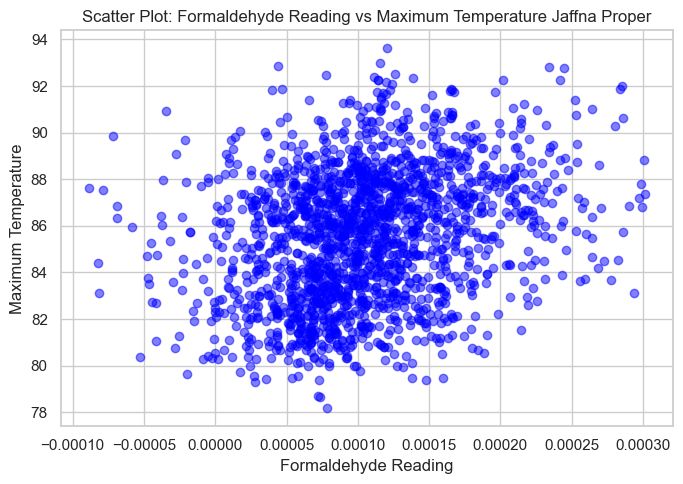

In [233]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(jaffna_data["HCHO reading"], jaffna_data["TMAX"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Maximum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Maximum Temperature Jaffna Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout() 
plt.show()

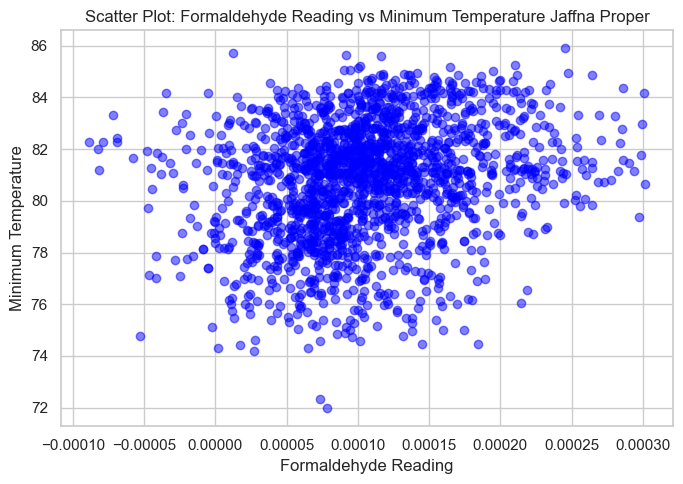

In [234]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot 
plt.scatter(jaffna_data["HCHO reading"], jaffna_data["TMIN"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Minimum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Minimum Temperature Jaffna Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show() 

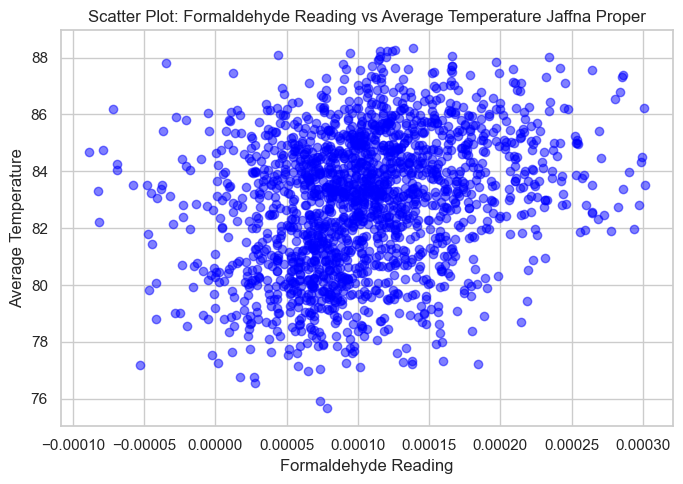

In [235]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(jaffna_data["HCHO reading"], jaffna_data["TAVG"], color='blue', alpha=0.5)
 
# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Average Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Average Temperature Jaffna Proper')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Monaragala Bibile Weather Data Analysis

#### Monaragala source : https://www.latlong.net/place/monaragala-sri-lanka-10180.html

In [236]:
weather_monaragala = pd.read_csv("../FomaldihydeAnalysis/OtherData/Monaragala.csv")

In [237]:
weather_monaragala.isnull().sum()

YEAR           0
MO             0
DY             0
T2M            0
T2M_MAX        0
T2M_MIN        0
PRECTOTCORR    0
QV2M           0
dtype: int64

In [238]:
weather_monaragala.drop(columns=["QV2M"], inplace=True)

In [239]:
weather_monaragala.head()

YEAR  MO  DY    T2M  T2M_MAX  T2M_MIN  PRECTOTCORR
0  2019   1   1  21.79    26.15    18.60         0.22
1  2019   1   2  21.09    25.80    17.52         0.03
2  2019   1   3  21.03    26.32    17.05         0.03
3  2019   1   4  20.88    26.46    16.77         0.02
4  2019   1   5  22.12    27.42    17.82         0.14

In [240]:
weather_monaragala.rename(columns={"T2M":"TAVG", "T2M_MAX":"TMAX", "T2M_MIN":"TMIN"
                             , "PRECTOTCORR":"PRCP"}, inplace=True)

In [241]:
weather_monaragala.head()

YEAR  MO  DY   TAVG   TMAX   TMIN  PRCP
0  2019   1   1  21.79  26.15  18.60  0.22
1  2019   1   2  21.09  25.80  17.52  0.03
2  2019   1   3  21.03  26.32  17.05  0.03
3  2019   1   4  20.88  26.46  16.77  0.02
4  2019   1   5  22.12  27.42  17.82  0.14

In [242]:
weather_monaragala['DATE'] = pd.to_datetime({
    'year': weather_monaragala['YEAR'],
    'month': weather_monaragala['MO'],
    'day': weather_monaragala['DY']
})

In [243]:
weather_monaragala.shape

(1826, 8)

In [244]:
weather_monaragala.head()

YEAR  MO  DY   TAVG   TMAX   TMIN  PRCP       DATE
0  2019   1   1  21.79  26.15  18.60  0.22 2019-01-01
1  2019   1   2  21.09  25.80  17.52  0.03 2019-01-02
2  2019   1   3  21.03  26.32  17.05  0.03 2019-01-03
3  2019   1   4  20.88  26.46  16.77  0.02 2019-01-04
4  2019   1   5  22.12  27.42  17.82  0.14 2019-01-05

In [245]:
weather_monaragala.drop(columns=["YEAR", "MO", "DY"], inplace=True)

In [246]:
weather_monaragala.head()

TAVG   TMAX   TMIN  PRCP       DATE
0  21.79  26.15  18.60  0.22 2019-01-01
1  21.09  25.80  17.52  0.03 2019-01-02
2  21.03  26.32  17.05  0.03 2019-01-03
3  20.88  26.46  16.77  0.02 2019-01-04
4  22.12  27.42  17.82  0.14 2019-01-05

In [247]:
weather_monaragala['TAVG'] = (weather_monaragala['TAVG'] * 9/5) + 32
weather_monaragala['TMAX'] = (weather_monaragala['TMAX'] * 9/5) + 32
weather_monaragala['TMIN'] = (weather_monaragala['TMIN'] * 9/5) + 32

In [248]:
weather_monaragala.head()

TAVG    TMAX    TMIN  PRCP       DATE
0  71.222  79.070  65.480  0.22 2019-01-01
1  69.962  78.440  63.536  0.03 2019-01-02
2  69.854  79.376  62.690  0.03 2019-01-03
3  69.584  79.628  62.186  0.02 2019-01-04
4  71.816  81.356  64.076  0.14 2019-01-05

In [249]:
weather_monaragala["LATITUDE"] = 6.89
weather_monaragala["LONGITUDE"] = 81.34

In [250]:
weather_monaragala.shape

(1826, 7)

In [251]:
weather_monaragala.head()

TAVG    TMAX    TMIN  PRCP       DATE  LATITUDE  LONGITUDE
0  71.222  79.070  65.480  0.22 2019-01-01      6.89      81.34
1  69.962  78.440  63.536  0.03 2019-01-02      6.89      81.34
2  69.854  79.376  62.690  0.03 2019-01-03      6.89      81.34
3  69.584  79.628  62.186  0.02 2019-01-04      6.89      81.34
4  71.816  81.356  64.076  0.14 2019-01-05      6.89      81.34

In [252]:
weather_monaragala["ELEVATION"] = 151

In [253]:
weather_monaragala.head()

TAVG    TMAX    TMIN  PRCP       DATE  LATITUDE  LONGITUDE  ELEVATION
0  71.222  79.070  65.480  0.22 2019-01-01      6.89      81.34        151
1  69.962  78.440  63.536  0.03 2019-01-02      6.89      81.34        151
2  69.854  79.376  62.690  0.03 2019-01-03      6.89      81.34        151
3  69.584  79.628  62.186  0.02 2019-01-04      6.89      81.34        151
4  71.816  81.356  64.076  0.14 2019-01-05      6.89      81.34        151

In [254]:
weather_monaragala["Region"] = "Bibile, Monaragala"

In [255]:
weather_monaragala = weather_monaragala[["Region", "LATITUDE", "LONGITUDE", "ELEVATION", "PRCP", "TAVG", "TMAX", "TMIN", "DATE"]]
weather_monaragala.head()

Region  LATITUDE  LONGITUDE  ELEVATION  PRCP    TAVG    TMAX  \
0  Bibile, Monaragala      6.89      81.34        151  0.22  71.222  79.070   
1  Bibile, Monaragala      6.89      81.34        151  0.03  69.962  78.440   
2  Bibile, Monaragala      6.89      81.34        151  0.03  69.854  79.376   
3  Bibile, Monaragala      6.89      81.34        151  0.02  69.584  79.628   
4  Bibile, Monaragala      6.89      81.34        151  0.14  71.816  81.356   

     TMIN       DATE  
0  65.480 2019-01-01  
1  63.536 2019-01-02  
2  62.690 2019-01-03  
3  62.186 2019-01-04  
4  64.076 2019-01-05

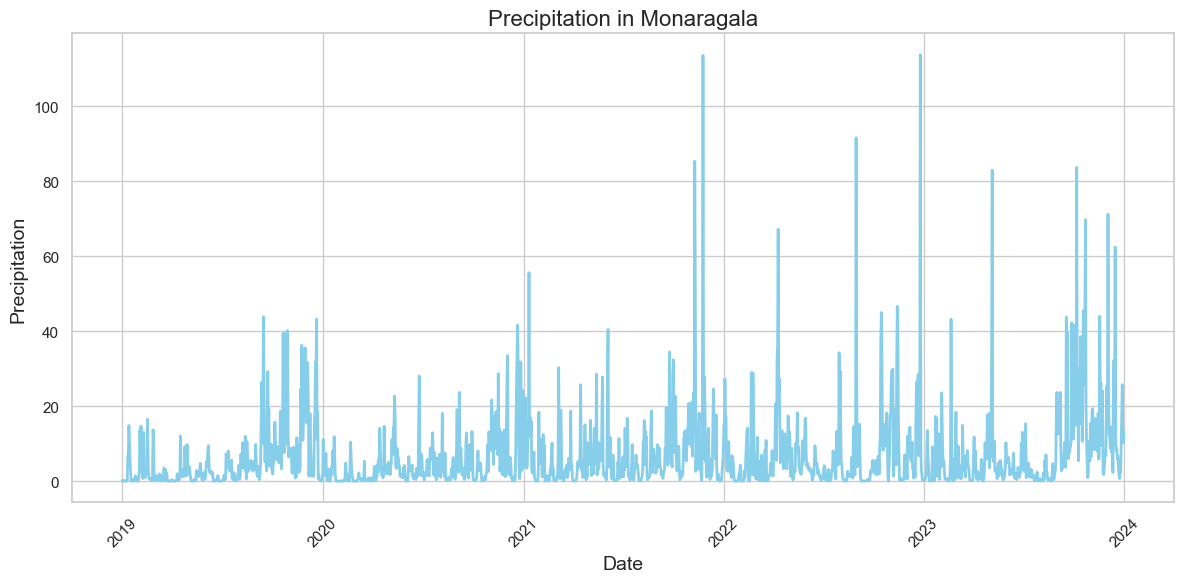

In [256]:
# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_monaragala, x='DATE', y='PRCP', color='skyblue', linewidth=2)

# Customize titles and labels
plt.title('Precipitation in Monaragala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

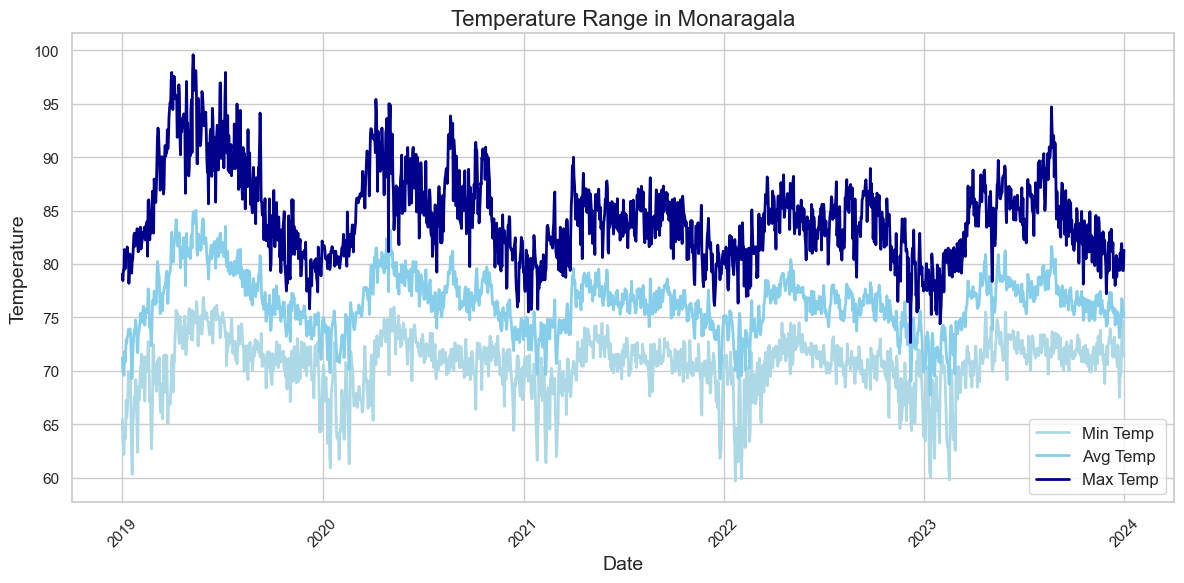

In [257]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_monaragala, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_monaragala, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_monaragala, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Monaragala', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [258]:
fomaldihyde_monaragala = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/BibileMonaragalaHandledNullValues.csv")

In [259]:
fomaldihyde_monaragala.head()

Current Date   Next Date  HCHO reading
0   2019-01-01  2019-01-02      0.000019
1   2019-01-02  2019-01-03      0.000019
2   2019-01-03  2019-01-04      0.000028
3   2019-01-04  2019-01-05      0.000037
4   2019-01-05  2019-01-06     -0.000018

In [260]:
fomaldihyde_monaragala.tail()

Current Date   Next Date  HCHO reading
1821   2023-12-27  2023-12-28      0.000061
1822   2023-12-28  2023-12-29      0.000061
1823   2023-12-29  2023-12-30      0.000036
1824   2023-12-30  2023-12-31      0.000036
1825   2023-12-31  2024-01-01      0.000036

In [261]:
fomaldihyde_monaragala.describe()

HCHO reading
count   1826.000000
mean       0.000120
std        0.000073
min       -0.000125
25%        0.000072
50%        0.000119
75%        0.000166
max        0.000373

In [262]:
weather_monaragala.head() 

Region  LATITUDE  LONGITUDE  ELEVATION  PRCP    TAVG    TMAX  \
0  Bibile, Monaragala      6.89      81.34        151  0.22  71.222  79.070   
1  Bibile, Monaragala      6.89      81.34        151  0.03  69.962  78.440   
2  Bibile, Monaragala      6.89      81.34        151  0.03  69.854  79.376   
3  Bibile, Monaragala      6.89      81.34        151  0.02  69.584  79.628   
4  Bibile, Monaragala      6.89      81.34        151  0.14  71.816  81.356   

     TMIN       DATE  
0  65.480 2019-01-01  
1  63.536 2019-01-02  
2  62.690 2019-01-03  
3  62.186 2019-01-04  
4  64.076 2019-01-05

In [263]:
weather_monaragala.rename(columns={"DATE":"Current Date"}, inplace=True)

In [264]:
# Convert the column in the 'object' type DataFrame to 'datetime64[ns]'
fomaldihyde_monaragala['Current Date'] = pd.to_datetime(fomaldihyde_monaragala['Current Date'])

# Perform outer join
monaragala_data = pd.merge(fomaldihyde_monaragala, weather_monaragala, on='Current Date', how='outer')

In [265]:
weather_monaragala["Current Date"].unique().shape

(1826,)

In [266]:
weather_monaragala.isnull().sum()

Region          0
LATITUDE        0
LONGITUDE       0
ELEVATION       0
PRCP            0
TAVG            0
TMAX            0
TMIN            0
Current Date    0
dtype: int64

In [267]:
monaragala_data.head()

Current Date   Next Date  HCHO reading              Region  LATITUDE  \
0   2019-01-01  2019-01-02      0.000019  Bibile, Monaragala      6.89   
1   2019-01-02  2019-01-03      0.000019  Bibile, Monaragala      6.89   
2   2019-01-03  2019-01-04      0.000028  Bibile, Monaragala      6.89   
3   2019-01-04  2019-01-05      0.000037  Bibile, Monaragala      6.89   
4   2019-01-05  2019-01-06     -0.000018  Bibile, Monaragala      6.89   

   LONGITUDE  ELEVATION  PRCP    TAVG    TMAX    TMIN  
0      81.34        151  0.22  71.222  79.070  65.480  
1      81.34        151  0.03  69.962  78.440  63.536  
2      81.34        151  0.03  69.854  79.376  62.690  
3      81.34        151  0.02  69.584  79.628  62.186  
4      81.34        151  0.14  71.816  81.356  64.076

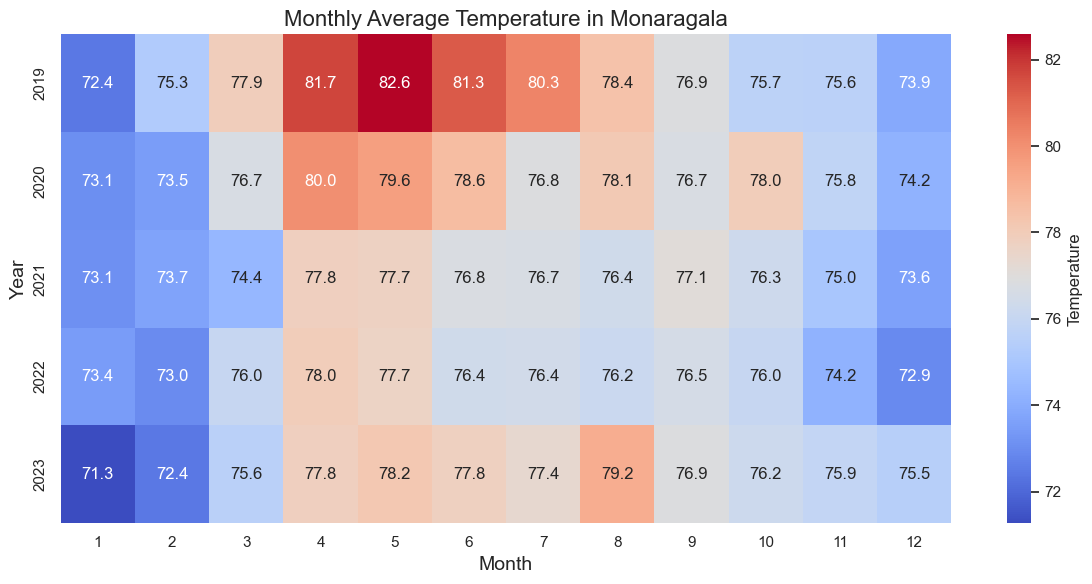

In [268]:
# Convert the 'Current Date' column to datetime format
monaragala_data['Year'] = monaragala_data['Current Date'].dt.year
monaragala_data['Month'] = monaragala_data['Current Date'].dt.month

# Pivot the data to have years as rows and months as columns
weather_pivot = monaragala_data.pivot_table(index='Year', columns='Month', values='TAVG', aggfunc='mean')

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the heatmap
sns.heatmap(weather_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Temperature'})

# Customize titles and labels
plt.title('Monthly Average Temperature in Monaragala', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [269]:
monaragala_data.drop(columns=["Year", "Month"], inplace=True)

In [270]:
monaragala_data.tail()

Current Date   Next Date  HCHO reading              Region  LATITUDE  \
1821   2023-12-27  2023-12-28      0.000061  Bibile, Monaragala      6.89   
1822   2023-12-28  2023-12-29      0.000061  Bibile, Monaragala      6.89   
1823   2023-12-29  2023-12-30      0.000036  Bibile, Monaragala      6.89   
1824   2023-12-30  2023-12-31      0.000036  Bibile, Monaragala      6.89   
1825   2023-12-31  2024-01-01      0.000036  Bibile, Monaragala      6.89   

      LONGITUDE  ELEVATION   PRCP    TAVG    TMAX    TMIN  
1821      81.34        151  18.29  76.766  81.914  73.418  
1822      81.34        151  25.73  76.622  79.502  74.768  
1823      81.34        151  14.50  75.632  79.376  72.914  
1824      81.34        151  10.27  75.020  79.394  72.374  
1825      81.34        151  13.07  75.452  81.284  71.366

In [271]:
monaragala_data.describe() 

Current Date  HCHO reading  LATITUDE     LONGITUDE  ELEVATION  \
count                 1826   1826.000000   1826.00  1.826000e+03     1826.0   
mean   2021-07-01 12:00:00      0.000120      6.89  8.134000e+01      151.0   
min    2019-01-01 00:00:00     -0.000125      6.89  8.134000e+01      151.0   
25%    2020-04-01 06:00:00      0.000072      6.89  8.134000e+01      151.0   
50%    2021-07-01 12:00:00      0.000119      6.89  8.134000e+01      151.0   
75%    2022-09-30 18:00:00      0.000166      6.89  8.134000e+01      151.0   
max    2023-12-31 00:00:00      0.000373      6.89  8.134000e+01      151.0   
std                    NaN      0.000073      0.00  1.421475e-14        0.0   

              PRCP         TAVG         TMAX         TMIN  
count  1826.000000  1826.000000  1826.000000  1826.000000  
mean      6.596407    76.384225    84.385432    70.573596  
min       0.000000    67.730000    72.644000    59.684000  
25%       0.852500    74.750000    81.396500    69.548000  
50%       3.260000    76.451000    83.939000    70.988000  
75%       8.407500    77.900000    86.558000    72.243500  
max     113.740000    85.028000    99.572000    76.874000  
std       9.918879     2.660828     4.184418     2.668312

In [272]:
monaragala_data[monaragala_data["LATITUDE"].isna() == True]

Empty DataFrame
Columns: [Current Date, Next Date, HCHO reading, Region, LATITUDE, LONGITUDE, ELEVATION, PRCP, TAVG, TMAX, TMIN]
Index: []

In [273]:
monaragala_data_copy = monaragala_data.copy()

# Drop specified columns 
monaragala_data_copy.drop(columns=["LATITUDE", "LONGITUDE", "ELEVATION"], inplace=True)

# Calculate correlation matrix using Pearson method 
correlation_matrix =  monaragala_data_copy.corr(method="pearson", numeric_only=True)
correlation_matrix

HCHO reading      PRCP      TAVG      TMAX      TMIN
HCHO reading      1.000000 -0.045412  0.374357  0.357828  0.275180
PRCP             -0.045412  1.000000 -0.107879 -0.306182  0.176686
TAVG              0.374357 -0.107879  1.000000  0.890991  0.786938
TMAX              0.357828 -0.306182  0.890991  1.000000  0.451086
TMIN              0.275180  0.176686  0.786938  0.451086  1.000000

In [274]:
monaragala_data_copy.corr(method="pearson", numeric_only=True)["HCHO reading"]

HCHO reading    1.000000
PRCP           -0.045412
TAVG            0.374357
TMAX            0.357828
TMIN            0.275180
Name: HCHO reading, dtype: float64

#### Average and Maximum temperatures have average correlations with fomaldihyde emission rates

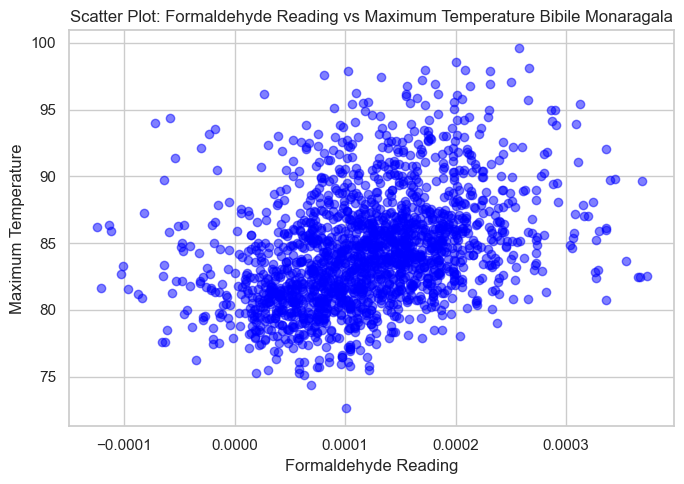

In [275]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(monaragala_data["HCHO reading"], monaragala_data["TMAX"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Maximum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Maximum Temperature Bibile Monaragala')

# Displaying the plot
plt.grid(True)
plt.tight_layout() 
plt.show()

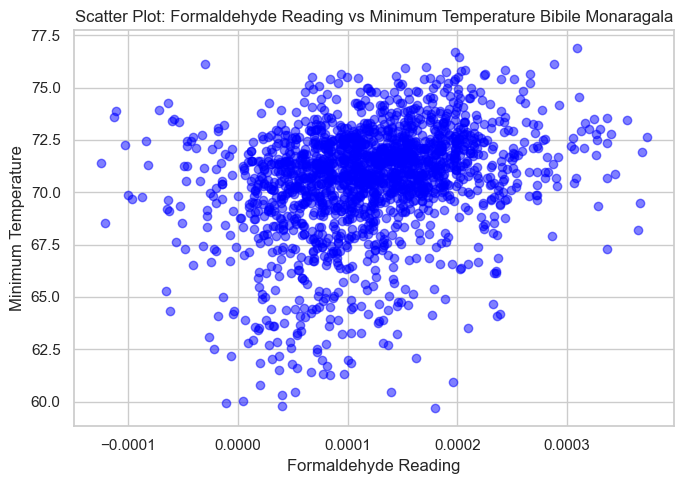

In [276]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(monaragala_data["HCHO reading"], monaragala_data["TMIN"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Minimum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Minimum Temperature Bibile Monaragala')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show() 

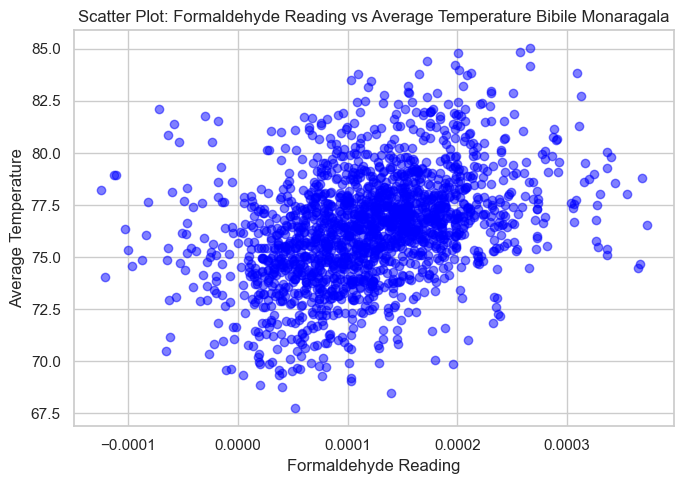

In [277]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(monaragala_data["HCHO reading"], monaragala_data["TAVG"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Average Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Average Temperature Bibile Monaragala')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Matara Deniyaya Weather Analysis

#### source : https://www.mindat.org/maps.php?id=214407

#### source : https://en-in.topographic-map.com/map-22dgp/Matara/

In [278]:
weather_matara = pd.read_csv("../FomaldihydeAnalysis/OtherData/Matara.csv")

In [279]:
weather_matara.isnull().sum()

YEAR           0
MO             0
DY             0
T2M_MAX        0
T2M_MIN        0
T2M            0
QV2M           0
PRECTOTCORR    0
dtype: int64

In [280]:
weather_matara.drop(columns=["QV2M"], inplace=True)

In [281]:
weather_matara.head()

YEAR  MO  DY  T2M_MAX  T2M_MIN    T2M  PRECTOTCORR
0  2019   1   1    29.11    24.20  26.30         0.27
1  2019   1   2    28.51    23.62  25.80         0.06
2  2019   1   3    28.93    23.48  25.96         0.03
3  2019   1   4    28.69    23.16  25.76         0.02
4  2019   1   5    29.51    23.15  26.15         0.09

In [282]:
weather_matara.rename(columns={"T2M":"TAVG", "T2M_MAX":"TMAX", "T2M_MIN":"TMIN"
                             , "PRECTOTCORR":"PRCP"}, inplace=True)

In [283]:
weather_matara.head()

YEAR  MO  DY   TMAX   TMIN   TAVG  PRCP
0  2019   1   1  29.11  24.20  26.30  0.27
1  2019   1   2  28.51  23.62  25.80  0.06
2  2019   1   3  28.93  23.48  25.96  0.03
3  2019   1   4  28.69  23.16  25.76  0.02
4  2019   1   5  29.51  23.15  26.15  0.09

In [284]:
weather_matara['DATE'] = pd.to_datetime({
    'year': weather_matara['YEAR'],
    'month': weather_matara['MO'],
    'day': weather_matara['DY']
})

In [285]:
weather_matara.shape

(1826, 8)

In [286]:
weather_matara.head()

YEAR  MO  DY   TMAX   TMIN   TAVG  PRCP       DATE
0  2019   1   1  29.11  24.20  26.30  0.27 2019-01-01
1  2019   1   2  28.51  23.62  25.80  0.06 2019-01-02
2  2019   1   3  28.93  23.48  25.96  0.03 2019-01-03
3  2019   1   4  28.69  23.16  25.76  0.02 2019-01-04
4  2019   1   5  29.51  23.15  26.15  0.09 2019-01-05

In [287]:
weather_matara.drop(columns=["YEAR", "MO", "DY"], inplace=True)

In [288]:
weather_matara.head()

TMAX   TMIN   TAVG  PRCP       DATE
0  29.11  24.20  26.30  0.27 2019-01-01
1  28.51  23.62  25.80  0.06 2019-01-02
2  28.93  23.48  25.96  0.03 2019-01-03
3  28.69  23.16  25.76  0.02 2019-01-04
4  29.51  23.15  26.15  0.09 2019-01-05

In [289]:
weather_matara['TAVG'] = (weather_matara['TAVG'] * 9/5) + 32
weather_matara['TMAX'] = (weather_matara['TMAX'] * 9/5) + 32
weather_matara['TMIN'] = (weather_matara['TMIN'] * 9/5) + 32

In [290]:
weather_matara.head()

TMAX    TMIN    TAVG  PRCP       DATE
0  84.398  75.560  79.340  0.27 2019-01-01
1  83.318  74.516  78.440  0.06 2019-01-02
2  84.074  74.264  78.728  0.03 2019-01-03
3  83.642  73.688  78.368  0.02 2019-01-04
4  85.118  73.670  79.070  0.09 2019-01-05

In [291]:
weather_matara["LATITUDE"] = 6.34
weather_matara["LONGITUDE"] = 80.55

In [292]:
weather_matara.shape

(1826, 7)

In [293]:
weather_matara.head()

TMAX    TMIN    TAVG  PRCP       DATE  LATITUDE  LONGITUDE
0  84.398  75.560  79.340  0.27 2019-01-01      6.34      80.55
1  83.318  74.516  78.440  0.06 2019-01-02      6.34      80.55
2  84.074  74.264  78.728  0.03 2019-01-03      6.34      80.55
3  83.642  73.688  78.368  0.02 2019-01-04      6.34      80.55
4  85.118  73.670  79.070  0.09 2019-01-05      6.34      80.55

In [294]:
weather_matara["ELEVATION"] = 7

In [295]:
weather_matara.head()

TMAX    TMIN    TAVG  PRCP       DATE  LATITUDE  LONGITUDE  ELEVATION
0  84.398  75.560  79.340  0.27 2019-01-01      6.34      80.55          7
1  83.318  74.516  78.440  0.06 2019-01-02      6.34      80.55          7
2  84.074  74.264  78.728  0.03 2019-01-03      6.34      80.55          7
3  83.642  73.688  78.368  0.02 2019-01-04      6.34      80.55          7
4  85.118  73.670  79.070  0.09 2019-01-05      6.34      80.55          7

In [296]:
weather_matara["Region"] = "Deniyaya, Matara"

In [297]:
weather_matara = weather_matara[["Region", "LATITUDE", "LONGITUDE", "ELEVATION", "PRCP", "TAVG", "TMAX", "TMIN", "DATE"]]
weather_matara.head()

Region  LATITUDE  LONGITUDE  ELEVATION  PRCP    TAVG    TMAX  \
0  Deniyaya, Matara      6.34      80.55          7  0.27  79.340  84.398   
1  Deniyaya, Matara      6.34      80.55          7  0.06  78.440  83.318   
2  Deniyaya, Matara      6.34      80.55          7  0.03  78.728  84.074   
3  Deniyaya, Matara      6.34      80.55          7  0.02  78.368  83.642   
4  Deniyaya, Matara      6.34      80.55          7  0.09  79.070  85.118   

     TMIN       DATE  
0  75.560 2019-01-01  
1  74.516 2019-01-02  
2  74.264 2019-01-03  
3  73.688 2019-01-04  
4  73.670 2019-01-05

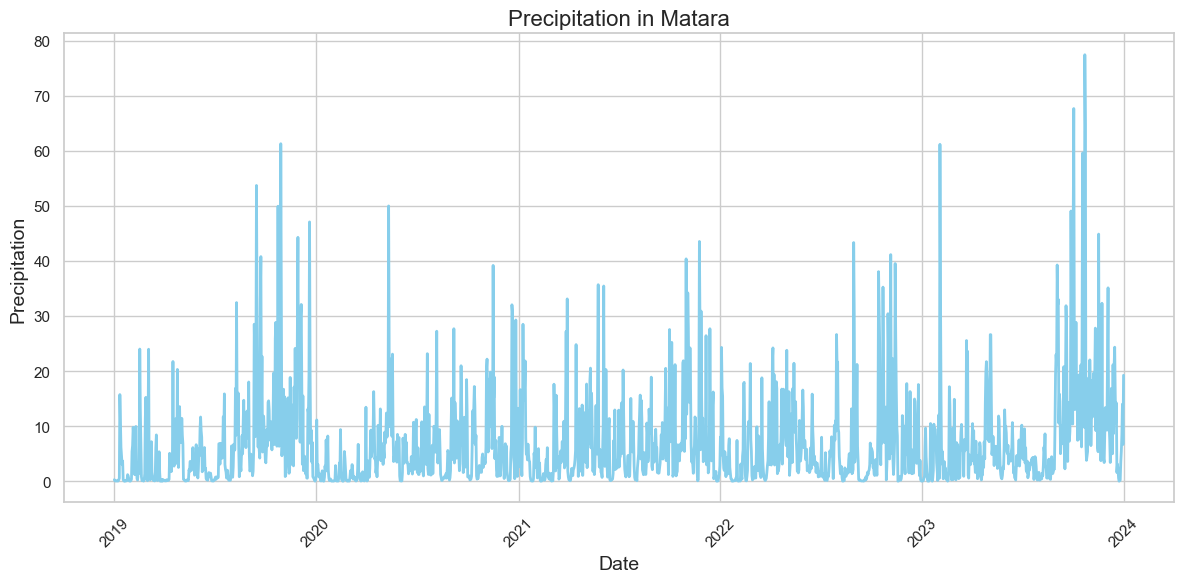

In [298]:
# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_matara, x='DATE', y='PRCP', color='skyblue', linewidth=2)

# Customize titles and labels
plt.title('Precipitation in Matara', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


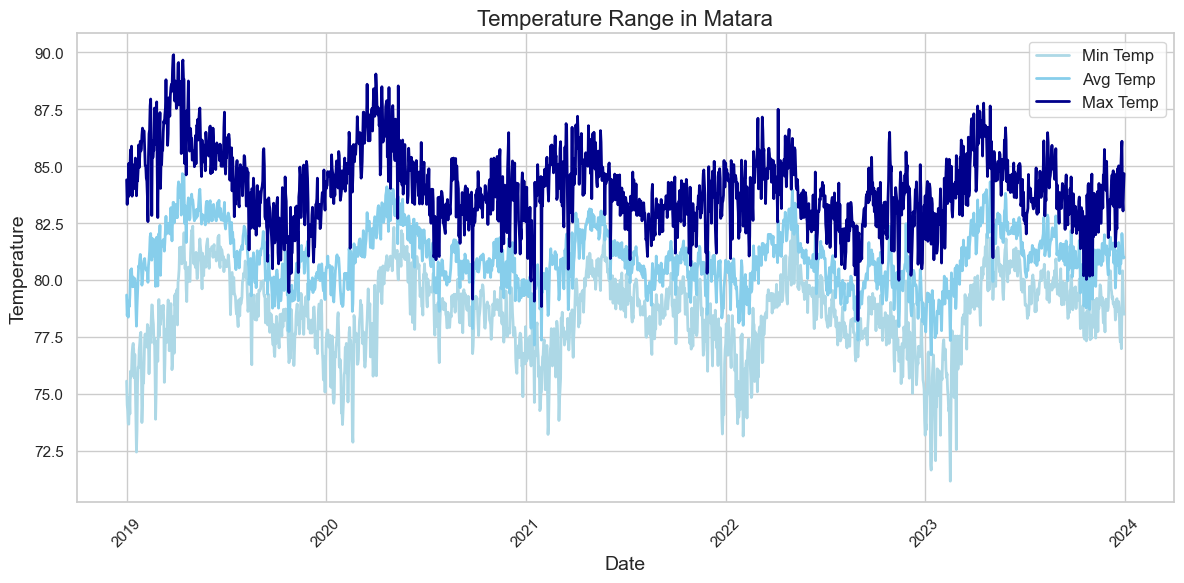

In [299]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=weather_matara, x='DATE', y='TMIN', color='lightblue', linewidth=2, label='Min Temp')
sns.lineplot(data=weather_matara, x='DATE', y='TAVG', color='skyblue', linewidth=2, label='Avg Temp')
sns.lineplot(data=weather_matara, x='DATE', y='TMAX', color='darkblue', linewidth=2, label='Max Temp')

# Customize titles and labels
plt.title('Temperature Range in Matara', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [300]:
fomaldihyde_matara = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/MataraDeniyayaHandledNullValues.csv")

In [301]:
fomaldihyde_matara.head()

Current Date   Next Date  HCHO reading
0   2019-01-01  2019-01-02      0.000006
1   2019-01-02  2019-01-03      0.000006
2   2019-01-03  2019-01-04      0.000236
3   2019-01-04  2019-01-05      0.000064
4   2019-01-05  2019-01-06      0.000053

In [302]:
fomaldihyde_matara.tail()

Current Date   Next Date  HCHO reading
1821   2023-12-27  2023-12-28      0.000228
1822   2023-12-28  2023-12-29      0.000082
1823   2023-12-29  2023-12-30      0.000082
1824   2023-12-30  2023-12-31      0.000116
1825   2023-12-31  2024-01-01      0.000076

In [303]:
fomaldihyde_matara.describe()

HCHO reading
count   1826.000000
mean       0.000088
std        0.000060
min       -0.000123
25%        0.000054
50%        0.000083
75%        0.000120
max        0.000320

In [304]:
weather_matara.head() 

Region  LATITUDE  LONGITUDE  ELEVATION  PRCP    TAVG    TMAX  \
0  Deniyaya, Matara      6.34      80.55          7  0.27  79.340  84.398   
1  Deniyaya, Matara      6.34      80.55          7  0.06  78.440  83.318   
2  Deniyaya, Matara      6.34      80.55          7  0.03  78.728  84.074   
3  Deniyaya, Matara      6.34      80.55          7  0.02  78.368  83.642   
4  Deniyaya, Matara      6.34      80.55          7  0.09  79.070  85.118   

     TMIN       DATE  
0  75.560 2019-01-01  
1  74.516 2019-01-02  
2  74.264 2019-01-03  
3  73.688 2019-01-04  
4  73.670 2019-01-05

In [305]:
weather_matara.rename(columns={"DATE":"Current Date"}, inplace=True)

In [306]:
# Convert the column in the 'object' type DataFrame to 'datetime64[ns]'
fomaldihyde_matara['Current Date'] = pd.to_datetime(fomaldihyde_matara['Current Date'])

# Perform outer join
matara_data = pd.merge(fomaldihyde_matara, weather_matara, on='Current Date', how='outer')

In [307]:
weather_matara["Current Date"].unique().shape

(1826,)

In [308]:
matara_data.head() 

Current Date   Next Date  HCHO reading            Region  LATITUDE  \
0   2019-01-01  2019-01-02      0.000006  Deniyaya, Matara      6.34   
1   2019-01-02  2019-01-03      0.000006  Deniyaya, Matara      6.34   
2   2019-01-03  2019-01-04      0.000236  Deniyaya, Matara      6.34   
3   2019-01-04  2019-01-05      0.000064  Deniyaya, Matara      6.34   
4   2019-01-05  2019-01-06      0.000053  Deniyaya, Matara      6.34   

   LONGITUDE  ELEVATION  PRCP    TAVG    TMAX    TMIN  
0      80.55          7  0.27  79.340  84.398  75.560  
1      80.55          7  0.06  78.440  83.318  74.516  
2      80.55          7  0.03  78.728  84.074  74.264  
3      80.55          7  0.02  78.368  83.642  73.688  
4      80.55          7  0.09  79.070  85.118  73.670

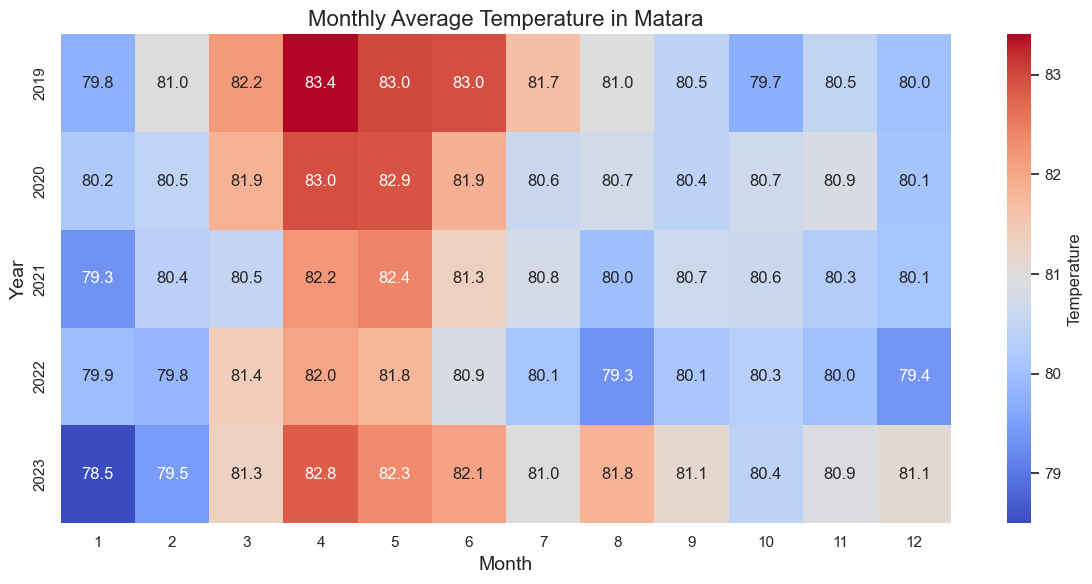

In [309]:
# Convert the 'Current Date' column to datetime format
matara_data['Year'] = matara_data['Current Date'].dt.year
matara_data['Month'] = matara_data['Current Date'].dt.month

# Pivot the data to have years as rows and months as columns
weather_pivot = matara_data.pivot_table(index='Year', columns='Month', values='TAVG', aggfunc='mean')

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot the heatmap
sns.heatmap(weather_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Temperature'})

# Customize titles and labels
plt.title('Monthly Average Temperature in Matara', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In [310]:
matara_data.drop(columns=["Year", "Month"], inplace=True)

In [311]:
matara_data.tail() 

Current Date   Next Date  HCHO reading            Region  LATITUDE  \
1821   2023-12-27  2023-12-28      0.000228  Deniyaya, Matara      6.34   
1822   2023-12-28  2023-12-29      0.000082  Deniyaya, Matara      6.34   
1823   2023-12-29  2023-12-30      0.000082  Deniyaya, Matara      6.34   
1824   2023-12-30  2023-12-31      0.000116  Deniyaya, Matara      6.34   
1825   2023-12-31  2024-01-01      0.000076  Deniyaya, Matara      6.34   

      LONGITUDE  ELEVATION   PRCP    TAVG    TMAX    TMIN  
1821      80.55          7   5.43  82.040  86.090  78.872  
1822      80.55          7   8.47  81.572  83.498  80.402  
1823      80.55          7  13.99  81.140  83.030  79.484  
1824      80.55          7   6.66  80.960  84.020  78.620  
1825      80.55          7  19.23  80.996  84.668  78.494

In [312]:
matara_data.describe() 

Current Date  HCHO reading      LATITUDE  LONGITUDE  ELEVATION  \
count                 1826   1826.000000  1.826000e+03    1826.00     1826.0   
mean   2021-07-01 12:00:00      0.000088  6.340000e+00      80.55        7.0   
min    2019-01-01 00:00:00     -0.000123  6.340000e+00      80.55        7.0   
25%    2020-04-01 06:00:00      0.000054  6.340000e+00      80.55        7.0   
50%    2021-07-01 12:00:00      0.000083  6.340000e+00      80.55        7.0   
75%    2022-09-30 18:00:00      0.000120  6.340000e+00      80.55        7.0   
max    2023-12-31 00:00:00      0.000320  6.340000e+00      80.55        7.0   
std                    NaN      0.000060  1.776843e-15       0.00        0.0   

              PRCP         TAVG         TMAX         TMIN  
count  1826.000000  1826.000000  1826.000000  1826.000000  
mean      6.790816    80.927894    84.063038    78.491762  
min       0.000000    76.712000    78.224000    71.168000  
25%       1.210000    80.064500    82.994000    77.540000  
50%       4.075000    80.870000    84.002000    78.674000  
75%       9.145000    81.734000    85.046000    79.646000  
max      77.440000    84.668000    89.888000    82.364000  
std       8.430701     1.272339     1.653690     1.725569

In [313]:
matara_data[matara_data["LATITUDE"].isna() == True]  

Empty DataFrame
Columns: [Current Date, Next Date, HCHO reading, Region, LATITUDE, LONGITUDE, ELEVATION, PRCP, TAVG, TMAX, TMIN]
Index: []

In [314]:
matara_data_copy = nuwara_eliya_data.copy()
 
# Drop specified columns
matara_data_copy.drop(columns=["LATITUDE", "LONGITUDE", "ELEVATION"], inplace=True)

# Calculate correlation matrix using Pearson method
correlation_matrix =  matara_data_copy.corr(method="pearson", numeric_only=True)
correlation_matrix

HCHO reading      PRCP      TAVG      TMAX      TMIN
HCHO reading      1.000000 -0.025234  0.029537  0.153014 -0.139301
PRCP             -0.025234  1.000000 -0.086181 -0.273322  0.201576
TAVG              0.029537 -0.086181  1.000000  0.522359  0.326624
TMAX              0.153014 -0.273322  0.522359  1.000000 -0.363431
TMIN             -0.139301  0.201576  0.326624 -0.363431  1.000000

In [315]:
matara_data_copy.corr(method="pearson", numeric_only=True)["HCHO reading"]

HCHO reading    1.000000
PRCP           -0.025234
TAVG            0.029537
TMAX            0.153014
TMIN           -0.139301
Name: HCHO reading, dtype: float64

#### There is a very low correlation with fomaldihyde emission rates in Matara region temperatures

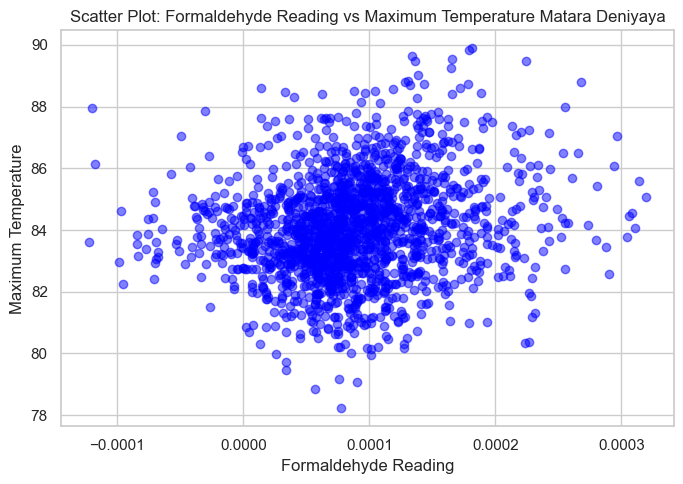

In [316]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot 
plt.scatter(matara_data["HCHO reading"], matara_data["TMAX"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Maximum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Maximum Temperature Matara Deniyaya')

# Displaying the plot
plt.grid(True)
plt.tight_layout() 
plt.show()

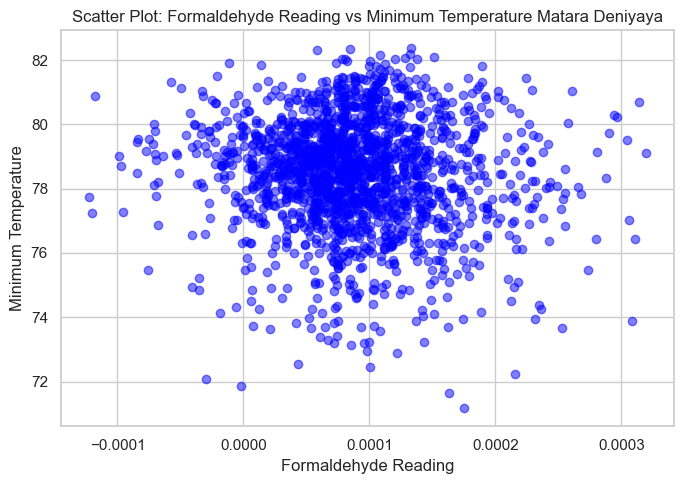

In [317]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(matara_data["HCHO reading"], matara_data["TMIN"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Minimum Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Minimum Temperature Matara Deniyaya')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

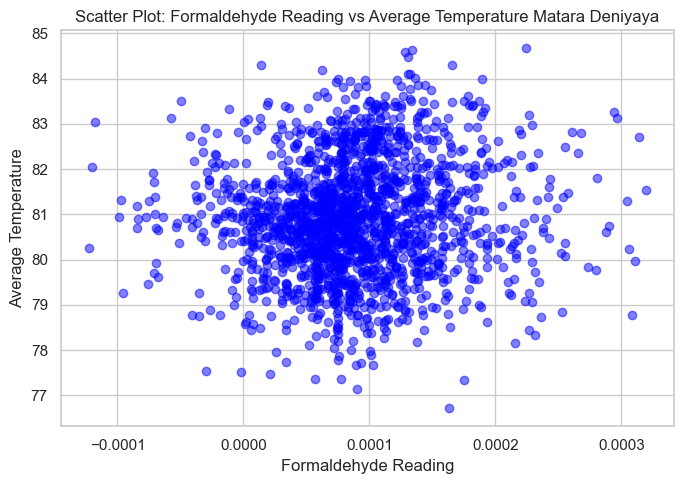

In [318]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Create a scatter plot
plt.scatter(matara_data["HCHO reading"], matara_data["TAVG"], color='blue', alpha=0.5)

# Adding labels and title
plt.xlabel('Formaldehyde Reading')
plt.ylabel('Average Temperature')
plt.title('Scatter Plot: Formaldehyde Reading vs Average Temperature Matara Deniyaya')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## population data Adding

#### area details - https://www.citypopulation.de/en/srilanka/prov/admin/

#### site to refer - https://www.rgd.gov.lk/web/index.php?option=com_content&view=article&id=136&Itemid=294&lang=si#%E0%B7%80%E0%B7%83%E0%B6%BB-%E0%B6%B8%E0%B7%90%E0%B6%AF-%E0%B6%A2%E0%B6%B1%E0%B6%9C%E0%B7%84%E0%B6%B1%E0%B6%BA-%E0%B6%B4%E0%B7%92%E0%B7%85%E0%B7%92%E0%B6%B6%E0%B6%B3-%E0%B6%87%E0%B7%83%E0%B7%8A%E0%B6%AD%E0%B6%B8%E0%B7%9A%E0%B6%B1%E0%B7%8A%E0%B6%AD%E0%B7%94

#### Assumption - population data will not change in higher ratios between 5 year. (2021 data is taken)

#### Colombo data population

In [319]:
colombo_data.head()

Current Date   Next Date  HCHO reading          Region  LATITUDE  LONGITUDE  \
0   2019-01-01  2019-01-02      0.000197  Colombo Proper       6.9     79.867   
1   2019-01-02  2019-01-03      0.000263  Colombo Proper       6.9     79.867   
2   2019-01-03  2019-01-04      0.000099  Colombo Proper       6.9     79.867   
3   2019-01-04  2019-01-05      0.000210  Colombo Proper       6.9     79.867   
4   2019-01-05  2019-01-06      0.000179  Colombo Proper       6.9     79.867   

   ELEVATION  PRCP  TAVG  TMAX  TMIN  
0        7.0   0.0  81.0  89.0  74.0  
1        7.0   0.0  78.0  89.0  74.0  
2        7.0   0.0  81.0  90.0  74.0  
3        7.0   0.0  81.0  91.0  72.0  
4        7.0   0.0  81.0  90.0  74.0

In [320]:
population_values = {
    2019: 2448000,
    2020: 2455000,
    2021: 2480000,
    2022: 2478000,
    2023: 2460000
}

colombo_data['Year'] = pd.to_datetime(colombo_data['Current Date']).dt.year

colombo_data['Population'] = colombo_data['Year'].map(population_values)

colombo_data.drop(columns=["Year"], inplace=True)

colombo_data["Area_sq_km"] = [699 for x in range(0, len(colombo_data))]

colombo_data["population_density"] = (colombo_data['Population'] / colombo_data["Area_sq_km"])

colombo_data["population_density"] = colombo_data["population_density"].round(2) 

In [321]:
colombo_data.head()

Current Date   Next Date  HCHO reading          Region  LATITUDE  LONGITUDE  \
0   2019-01-01  2019-01-02      0.000197  Colombo Proper       6.9     79.867   
1   2019-01-02  2019-01-03      0.000263  Colombo Proper       6.9     79.867   
2   2019-01-03  2019-01-04      0.000099  Colombo Proper       6.9     79.867   
3   2019-01-04  2019-01-05      0.000210  Colombo Proper       6.9     79.867   
4   2019-01-05  2019-01-06      0.000179  Colombo Proper       6.9     79.867   

   ELEVATION  PRCP  TAVG  TMAX  TMIN  Population  Area_sq_km  \
0        7.0   0.0  81.0  89.0  74.0     2448000         699   
1        7.0   0.0  78.0  89.0  74.0     2448000         699   
2        7.0   0.0  81.0  90.0  74.0     2448000         699   
3        7.0   0.0  81.0  91.0  72.0     2448000         699   
4        7.0   0.0  81.0  90.0  74.0     2448000         699   

   population_density  
0             3502.15  
1             3502.15  
2             3502.15  
3             3502.15  
4             3502.15

In [322]:
colombo_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Region                0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
PRCP                  0
TAVG                  0
TMAX                  0
TMIN                  0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

#### Matara Data Population

In [323]:
matara_data = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/MataraDeniyayaHandledNullValues.csv")
matara_data.head()

Current Date   Next Date  HCHO reading
0   2019-01-01  2019-01-02      0.000006
1   2019-01-02  2019-01-03      0.000006
2   2019-01-03  2019-01-04      0.000236
3   2019-01-04  2019-01-05      0.000064
4   2019-01-05  2019-01-06      0.000053

In [324]:
population_values = {
    2019: 863000,
    2020: 866000,
    2021: 873000,
    2022: 874000,
    2023: 869000
}

matara_data['Year'] = pd.to_datetime(matara_data['Current Date']).dt.year

matara_data['Population'] = matara_data['Year'].map(population_values)

matara_data.drop(columns=["Year"], inplace=True)

matara_data["Area_sq_km"] = [1283 for x in range(0, len(matara_data))]

matara_data["population_density"] = (matara_data['Population'] /  matara_data["Area_sq_km"])

matara_data["population_density"] = matara_data["population_density"].round(2) 

In [325]:
matara_data.head()

Current Date   Next Date  HCHO reading  Population  Area_sq_km  \
0   2019-01-01  2019-01-02      0.000006      863000        1283   
1   2019-01-02  2019-01-03      0.000006      863000        1283   
2   2019-01-03  2019-01-04      0.000236      863000        1283   
3   2019-01-04  2019-01-05      0.000064      863000        1283   
4   2019-01-05  2019-01-06      0.000053      863000        1283   

   population_density  
0              672.64  
1              672.64  
2              672.64  
3              672.64  
4              672.64

In [326]:
matara_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

#### Nuwara Eliya data Population

In [327]:
nuwara_eliya_data.head()

Current Date   Next Date  HCHO reading               Region  LATITUDE  \
0   2019-01-01  2019-01-02      0.000191  Nuwara Eliya Proper     6.967   
1   2019-01-02  2019-01-03      0.000191  Nuwara Eliya Proper     6.967   
2   2019-01-03  2019-01-04      0.000191  Nuwara Eliya Proper     6.967   
3   2019-01-04  2019-01-05      0.000051  Nuwara Eliya Proper     6.967   
4   2019-01-05  2019-01-06      0.000065  Nuwara Eliya Proper     6.967   

   LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  TMIN  
0     80.767     1880.0   0.0  61.0  71.0  49.0  
1     80.767     1880.0   0.0  59.0  71.0  49.0  
2     80.767     1880.0   0.0  59.0  71.0  49.0  
3     80.767     1880.0   0.0  59.0  72.0  47.0  
4     80.767     1880.0   0.0  55.0  68.0  48.0

In [328]:
population_values = {
    2019: 768000,
    2020: 773000,
    2021: 780000,
    2022: 783000,
    2023: 781000
}

nuwara_eliya_data['Year'] = pd.to_datetime(nuwara_eliya_data['Current Date']).dt.year

nuwara_eliya_data['Population'] = nuwara_eliya_data['Year'].map(population_values) 

nuwara_eliya_data.drop(columns=["Year"], inplace=True)

nuwara_eliya_data["Area_sq_km"] = [1741 for x in range(0, len(nuwara_eliya_data))]

nuwara_eliya_data["population_density"] = (nuwara_eliya_data['Population'] /  nuwara_eliya_data["Area_sq_km"])

nuwara_eliya_data["population_density"] = nuwara_eliya_data["population_density"].round(2) 

In [329]:
nuwara_eliya_data.head()

Current Date   Next Date  HCHO reading               Region  LATITUDE  \
0   2019-01-01  2019-01-02      0.000191  Nuwara Eliya Proper     6.967   
1   2019-01-02  2019-01-03      0.000191  Nuwara Eliya Proper     6.967   
2   2019-01-03  2019-01-04      0.000191  Nuwara Eliya Proper     6.967   
3   2019-01-04  2019-01-05      0.000051  Nuwara Eliya Proper     6.967   
4   2019-01-05  2019-01-06      0.000065  Nuwara Eliya Proper     6.967   

   LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  TMIN  Population  Area_sq_km  \
0     80.767     1880.0   0.0  61.0  71.0  49.0      768000        1741   
1     80.767     1880.0   0.0  59.0  71.0  49.0      768000        1741   
2     80.767     1880.0   0.0  59.0  71.0  49.0      768000        1741   
3     80.767     1880.0   0.0  59.0  72.0  47.0      768000        1741   
4     80.767     1880.0   0.0  55.0  68.0  48.0      768000        1741   

   population_density  
0              441.13  
1              441.13  
2              441.13  
3              441.13  
4              441.13

In [330]:
nuwara_eliya_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Region                0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
PRCP                  0
TAVG                  0
TMAX                  0
TMIN                  0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

#### Bibile Monaragala data Population

In [331]:
bibile_monaragala_data = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/BibileMonaragalaHandledNullValues.csv")
bibile_monaragala_data.head() 

Current Date   Next Date  HCHO reading
0   2019-01-01  2019-01-02      0.000019
1   2019-01-02  2019-01-03      0.000019
2   2019-01-03  2019-01-04      0.000028
3   2019-01-04  2019-01-05      0.000037
4   2019-01-05  2019-01-06     -0.000018

In [332]:
population_values = {
    2019: 496000,
    2020: 501000,
    2021: 505000,
    2022: 509000,
    2023: 509000
}

bibile_monaragala_data['Year'] = pd.to_datetime(bibile_monaragala_data['Current Date']).dt.year

bibile_monaragala_data['Population'] = bibile_monaragala_data['Year'].map(population_values) 

bibile_monaragala_data.drop(columns=["Year"], inplace=True)

bibile_monaragala_data["Area_sq_km"] = [5639 for x in range(0, len(bibile_monaragala_data))]

bibile_monaragala_data["population_density"] = (bibile_monaragala_data['Population'] /  bibile_monaragala_data["Area_sq_km"])

bibile_monaragala_data["population_density"] = bibile_monaragala_data["population_density"].round(2)

In [333]:
bibile_monaragala_data.head()

Current Date   Next Date  HCHO reading  Population  Area_sq_km  \
0   2019-01-01  2019-01-02      0.000019      496000        5639   
1   2019-01-02  2019-01-03      0.000019      496000        5639   
2   2019-01-03  2019-01-04      0.000028      496000        5639   
3   2019-01-04  2019-01-05      0.000037      496000        5639   
4   2019-01-05  2019-01-06     -0.000018      496000        5639   

   population_density  
0               87.96  
1               87.96  
2               87.96  
3               87.96  
4               87.96

In [334]:
bibile_monaragala_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

#### Kurunegala data Population

In [335]:
kurunegala_data.head()

Current Date   Next Date  HCHO reading             Region  LATITUDE  \
0   2019-01-01  2019-01-02      0.000088  Kurunegala Proper     7.467   
1   2019-01-02  2019-01-03      0.000137  Kurunegala Proper     7.467   
2   2019-01-03  2019-01-04      0.000148  Kurunegala Proper     7.467   
3   2019-01-04  2019-01-05     -0.000002  Kurunegala Proper     7.467   
4   2019-01-05  2019-01-06      0.000249  Kurunegala Proper     7.467   

   LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  TMIN  
0     80.367      116.0   0.0  78.0  87.0  72.0  
1     80.367      116.0   0.0  78.0  87.0  72.0  
2     80.367      116.0   0.0  81.0  87.0  71.0  
3     80.367      116.0   0.0  83.0  88.0  69.0  
4     80.367      116.0   0.0  84.0  90.0  65.0

In [336]:
population_values = {
    2019: 1719000,
    2020: 1726000,
    2021: 1743000,
    2022: 1742000,
    2023: 1727000
}

kurunegala_data['Year'] = pd.to_datetime(kurunegala_data['Current Date']).dt.year

kurunegala_data['Population'] = kurunegala_data['Year'].map(population_values) 

kurunegala_data.drop(columns=["Year"], inplace=True)

kurunegala_data["Area_sq_km"] = [4816 for x in range(0, len(kurunegala_data))]

kurunegala_data["population_density"] = (kurunegala_data['Population'] /  kurunegala_data["Area_sq_km"])

kurunegala_data["population_density"] = kurunegala_data["population_density"].round(2) 

In [337]:
kurunegala_data.head()

Current Date   Next Date  HCHO reading             Region  LATITUDE  \
0   2019-01-01  2019-01-02      0.000088  Kurunegala Proper     7.467   
1   2019-01-02  2019-01-03      0.000137  Kurunegala Proper     7.467   
2   2019-01-03  2019-01-04      0.000148  Kurunegala Proper     7.467   
3   2019-01-04  2019-01-05     -0.000002  Kurunegala Proper     7.467   
4   2019-01-05  2019-01-06      0.000249  Kurunegala Proper     7.467   

   LONGITUDE  ELEVATION  PRCP  TAVG  TMAX  TMIN  Population  Area_sq_km  \
0     80.367      116.0   0.0  78.0  87.0  72.0     1719000        4816   
1     80.367      116.0   0.0  78.0  87.0  72.0     1719000        4816   
2     80.367      116.0   0.0  81.0  87.0  71.0     1719000        4816   
3     80.367      116.0   0.0  83.0  88.0  69.0     1719000        4816   
4     80.367      116.0   0.0  84.0  90.0  65.0     1719000        4816   

   population_density  
0              356.94  
1              356.94  
2              356.94  
3              356.94  
4              356.94

In [338]:
kurunegala_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Region                0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
PRCP                  0
TAVG                  0
TMAX                  0
TMIN                  0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

#### Jaffna data Population

In [339]:
jaffna_data = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/jaffnaHandledNullValues.csv")
jaffna_data.head() 

Current Date   Next Date  HCHO reading
0   2019-01-01  2019-01-02      0.000058
1   2019-01-02  2019-01-03      0.000102
2   2019-01-03  2019-01-04      0.000039
3   2019-01-04  2019-01-05     -0.000002
4   2019-01-05  2019-01-06      0.000159

In [340]:
population_values = {
    2019: 617000,
    2020: 621000,
    2021: 626000,
    2022: 629000,
    2023: 628000
}

jaffna_data['Year'] = pd.to_datetime(jaffna_data['Current Date']).dt.year

jaffna_data['Population'] = jaffna_data['Year'].map(population_values) 

jaffna_data.drop(columns=["Year"], inplace=True)

jaffna_data["Area_sq_km"] = [1025 for x in range(0, len(jaffna_data))]

jaffna_data["population_density"] = (jaffna_data['Population'] /  jaffna_data["Area_sq_km"])

jaffna_data["population_density"] = jaffna_data["population_density"].round(2)

In [341]:
jaffna_data.head() 

Current Date   Next Date  HCHO reading  Population  Area_sq_km  \
0   2019-01-01  2019-01-02      0.000058      617000        1025   
1   2019-01-02  2019-01-03      0.000102      617000        1025   
2   2019-01-03  2019-01-04      0.000039      617000        1025   
3   2019-01-04  2019-01-05     -0.000002      617000        1025   
4   2019-01-05  2019-01-06      0.000159      617000        1025   

   population_density  
0              601.95  
1              601.95  
2              601.95  
3              601.95  
4              601.95

In [342]:
jaffna_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

#### Kandy data Population

In [343]:
kandy_data = pd.read_csv("../FomaldihydeAnalysis/NullValueHandled/KandyHandledNullValues.csv")
kandy_data.head()  

Current Date   Next Date  HCHO reading
0   2019-01-01  2019-01-02      0.000176
1   2019-01-02  2019-01-03      0.000092
2   2019-01-03  2019-01-04      0.000134
3   2019-01-04  2019-01-05      0.000191
4   2019-01-05  2019-01-06      0.000122

In [344]:
population_values = {
    2019: 1476000,
    2020: 1483000,
    2021: 1501000,
    2022: 1499000,
    2023: 1482000
}

kandy_data['Year'] = pd.to_datetime(kandy_data['Current Date']).dt.year

kandy_data['Population'] = kandy_data['Year'].map(population_values) 

kandy_data.drop(columns=["Year"], inplace=True)

kandy_data["Area_sq_km"] = [1025 for x in range(0, len(kandy_data))]

kandy_data["population_density"] = (kandy_data['Population'] /  kandy_data["Area_sq_km"])

kandy_data["Area_sq_km"] = [1940 for x in range(0, len(kandy_data))]

kandy_data["population_density"] = (kandy_data['Population'] /  kandy_data["Area_sq_km"])

kandy_data["population_density"] = kandy_data["population_density"].round(2) 

In [345]:
kandy_data.head()

Current Date   Next Date  HCHO reading  Population  Area_sq_km  \
0   2019-01-01  2019-01-02      0.000176     1476000        1940   
1   2019-01-02  2019-01-03      0.000092     1476000        1940   
2   2019-01-03  2019-01-04      0.000134     1476000        1940   
3   2019-01-04  2019-01-05      0.000191     1476000        1940   
4   2019-01-05  2019-01-06      0.000122     1476000        1940   

   population_density  
0              760.82  
1              760.82  
2              760.82  
3              760.82  
4              760.82

In [346]:
kandy_data.isnull().sum()

Current Date          0
Next Date             0
HCHO reading          0
Population            0
Area_sq_km            0
population_density    0
dtype: int64

In [347]:
kandy_data.columns

Index(['Current Date', 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density'],
      dtype='object')

#### Population based impact Analysis for Fomaldihyde emission rates

In [348]:
colombo_population = colombo_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]
matara_population = matara_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]
nuwara_eliya_population = nuwara_eliya_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]
monaragala_population = matara_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]
kurunegala_population = kurunegala_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]
jaffna_population = jaffna_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]
kandy_population = kandy_data[["Current Date", 'Next Date', 'HCHO reading', 'Population', 'Area_sq_km',
       'population_density']]

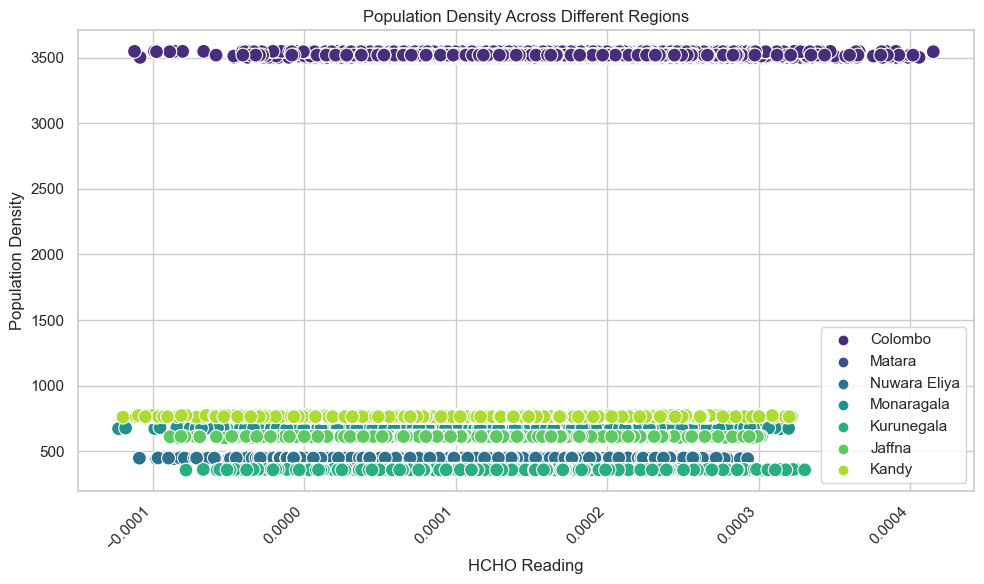

In [349]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'Region' column to each DataFrame
colombo_population['Region'] = 'Colombo'
matara_population['Region'] = 'Matara'
nuwara_eliya_population['Region'] = 'Nuwara Eliya'
monaragala_population['Region'] = 'Monaragala'
kurunegala_population['Region'] = 'Kurunegala'
jaffna_population['Region'] = 'Jaffna'
kandy_population['Region'] = 'Kandy'

# Combine data from all regions
population_data = pd.concat([colombo_population, matara_population, nuwara_eliya_population, 
                      monaragala_population, kurunegala_population, jaffna_population, 
                      kandy_population])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=population_data, x='HCHO reading', y='population_density', hue='Region', palette='viridis', s=100)
plt.xticks(rotation=45, ha='right')
plt.xlabel('HCHO Reading')
plt.ylabel('Population Density')
plt.title('Population Density Across Different Regions')
plt.legend()
plt.tight_layout()
plt.show()

In [350]:
population_data.corr(numeric_only=True)

HCHO reading  Population  Area_sq_km  population_density
HCHO reading            1.000000    0.296439    0.055384            0.250312
Population              0.296439    1.000000    0.190473            0.771794
Area_sq_km              0.055384    0.190473    1.000000           -0.439454
population_density      0.250312    0.771794   -0.439454            1.000000

In [351]:
population_data.corr(numeric_only=True)["HCHO reading"]

HCHO reading          1.000000
Population            0.296439
Area_sq_km            0.055384
population_density    0.250312
Name: HCHO reading, dtype: float64

##### There is a slight correlation between HCHO reading and population density with 0.25 
##### and population with 0.29

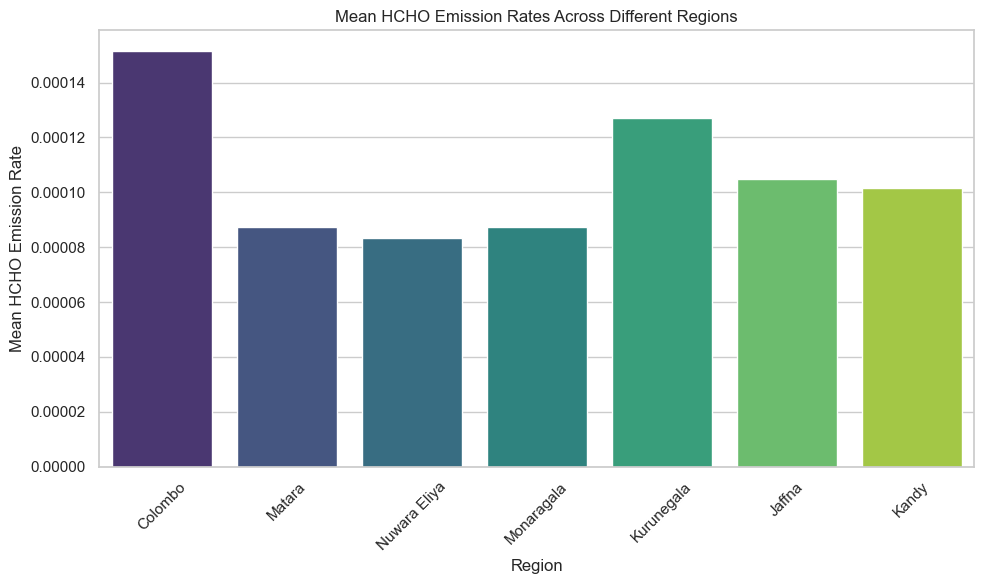

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_hcho_data = pd.DataFrame({
    'Region': ['Colombo', 'Matara', 'Nuwara Eliya', 'Monaragala', 'Kurunegala', 'Jaffna', 'Kandy'],
    'Mean HCHO Emission Rate': [
        colombo_population['HCHO reading'].mean(),
        matara_population['HCHO reading'].mean(),
        nuwara_eliya_population['HCHO reading'].mean(),
        monaragala_population['HCHO reading'].mean(),
        kurunegala_population['HCHO reading'].mean(),
        jaffna_population['HCHO reading'].mean(),
        kandy_population['HCHO reading'].mean()
    ]
})

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Mean HCHO Emission Rate', data=mean_hcho_data, palette='viridis')
plt.title('Mean HCHO Emission Rates Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Mean HCHO Emission Rate')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'Region' column to each DataFrame
colombo_population['Region'] = 'Colombo'
matara_population['Region'] = 'Matara'
nuwara_eliya_population['Region'] = 'Nuwara Eliya'
monaragala_population['Region'] = 'Monaragala'
kurunegala_population['Region'] = 'Kurunegala'
jaffna_population['Region'] = 'Jaffna'
kandy_population['Region'] = 'Kandy'

# Combine data from all regions
monthly_data = pd.concat([colombo_population, matara_population, nuwara_eliya_population, 
                      monaragala_population, kurunegala_population, jaffna_population, 
                      kandy_population])

monthly_data['Date'] = pd.to_datetime(monthly_data['Current Date'])
monthly_data['Month'] = monthly_data['Date'].dt.month
monthly_mean_data = monthly_data.groupby(['Month', 'Region']).agg({'HCHO reading': 'mean', 'Population': 'mean', 
                                                                  'population_density': 'mean'}).reset_index()
# Display mean HCHO emission rates and population for each region
print(monthly_mean_data)

    Month        Region  HCHO reading  Population  population_density
0       1       Colombo      0.000200   2464200.0            3525.322
1       1        Jaffna      0.000077    624200.0             608.974
2       1         Kandy      0.000088   1488200.0             767.112
3       1    Kurunegala      0.000120   1731400.0             359.512
4       1        Matara      0.000093    869000.0             677.320
..    ...           ...           ...         ...                 ...
79     12         Kandy      0.000098   1488200.0             767.112
80     12    Kurunegala      0.000114   1731400.0             359.512
81     12        Matara      0.000093    869000.0             677.320
82     12    Monaragala      0.000093    869000.0             677.320
83     12  Nuwara Eliya      0.000059    777000.0             446.296

[84 rows x 5 columns]


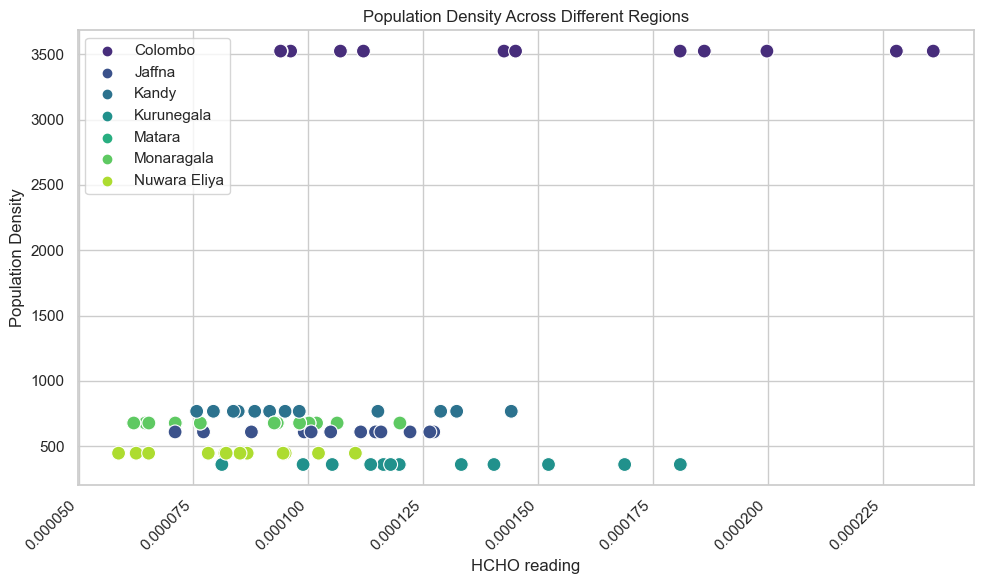

In [354]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=monthly_mean_data, x='HCHO reading', y='population_density', hue='Region', palette='viridis', s=100)
plt.xticks(rotation=45, ha='right')
plt.xlabel('HCHO reading')
plt.ylabel('Population Density')
plt.title('Population Density Across Different Regions')
plt.legend()
plt.tight_layout()
plt.show()

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'Region' column to each DataFrame
colombo_population['Region'] = 'Colombo'
matara_population['Region'] = 'Matara'
nuwara_eliya_population['Region'] = 'Nuwara Eliya'
monaragala_population['Region'] = 'Monaragala'
kurunegala_population['Region'] = 'Kurunegala'
jaffna_population['Region'] = 'Jaffna'
kandy_population['Region'] = 'Kandy'

# Combine data from all regions
yearly_data = pd.concat([colombo_population, matara_population, nuwara_eliya_population, 
                      monaragala_population, kurunegala_population, jaffna_population, 
                      kandy_population])

yearly_data['Date'] = pd.to_datetime(yearly_data['Current Date'])
yearly_data['Year'] = yearly_data['Date'].dt.year                      
yearly_mean_data = yearly_data.groupby(['Year', 'Region']).agg({'HCHO reading': 'mean', 'Population': 'mean', 
                                                                  'population_density': 'mean'}).reset_index()
# Display mean HCHO emission rates and population for each region
yearly_mean_data.sort_values("Region", inplace=True)

In [356]:
yearly_mean_data

Year        Region  HCHO reading  Population  population_density
0   2019       Colombo      0.000155   2448000.0             3502.15
14  2021       Colombo      0.000142   2480000.0             3547.93
21  2022       Colombo      0.000148   2478000.0             3545.06
7   2020       Colombo      0.000156   2455000.0             3512.16
28  2023       Colombo      0.000156   2460000.0             3519.31
22  2022        Jaffna      0.000102    629000.0              613.66
15  2021        Jaffna      0.000097    626000.0              610.73
8   2020        Jaffna      0.000106    621000.0              605.85
1   2019        Jaffna      0.000108    617000.0              601.95
29  2023        Jaffna      0.000111    628000.0              612.68
30  2023         Kandy      0.000099   1482000.0              763.92
9   2020         Kandy      0.000105   1483000.0              764.43
23  2022         Kandy      0.000105   1499000.0              772.68
2   2019         Kandy      0.000108   1476000.0              760.82
16  2021         Kandy      0.000090   1501000.0              773.71
24  2022    Kurunegala      0.000124   1742000.0              361.71
31  2023    Kurunegala      0.000126   1727000.0              358.60
17  2021    Kurunegala      0.000124   1743000.0              361.92
3   2019    Kurunegala      0.000129   1719000.0              356.94
10  2020    Kurunegala      0.000132   1726000.0              358.39
18  2021        Matara      0.000076    873000.0              680.44
32  2023        Matara      0.000085    869000.0              677.32
4   2019        Matara      0.000088    863000.0              672.64
11  2020        Matara      0.000098    866000.0              674.98
25  2022        Matara      0.000091    874000.0              681.22
5   2019    Monaragala      0.000088    863000.0              672.64
26  2022    Monaragala      0.000091    874000.0              681.22
12  2020    Monaragala      0.000098    866000.0              674.98
19  2021    Monaragala      0.000076    873000.0              680.44
33  2023    Monaragala      0.000085    869000.0              677.32
27  2022  Nuwara Eliya      0.000082    783000.0              449.74
6   2019  Nuwara Eliya      0.000088    768000.0              441.13
13  2020  Nuwara Eliya      0.000082    773000.0              444.00
20  2021  Nuwara Eliya      0.000081    780000.0              448.02
34  2023  Nuwara Eliya      0.000084    781000.0              448.59

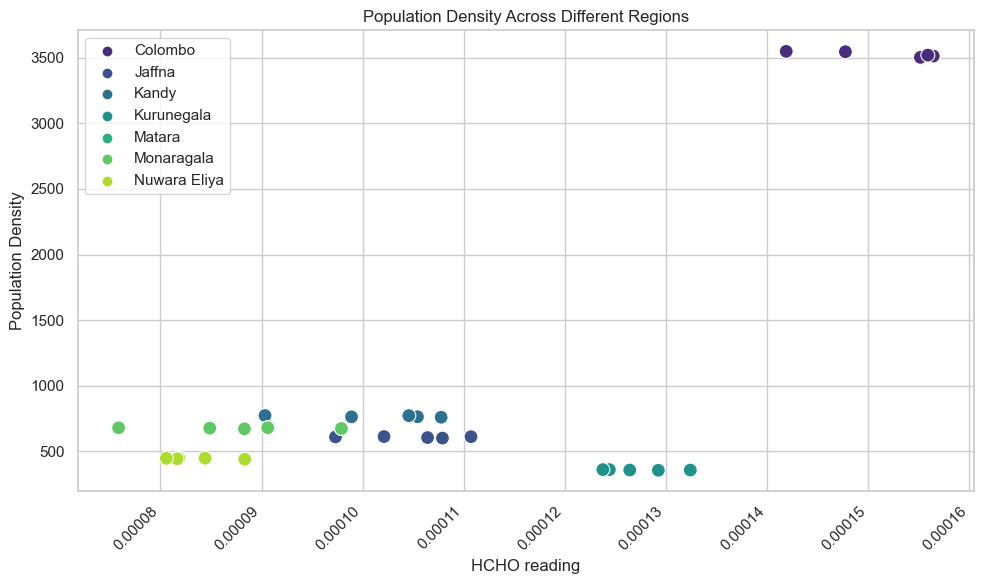

In [357]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_mean_data, x='HCHO reading', y='population_density', hue='Region', palette='viridis', s=100)
plt.xticks(rotation=45, ha='right')
plt.xlabel('HCHO reading')
plt.ylabel('Population Density')
plt.title('Population Density Across Different Regions')
plt.legend()
plt.tight_layout() 
plt.show()

In [358]:
yearly_mean_data.to_csv("../FomaldihydeAnalysis/OtherData/yearly_hcho_with_population")

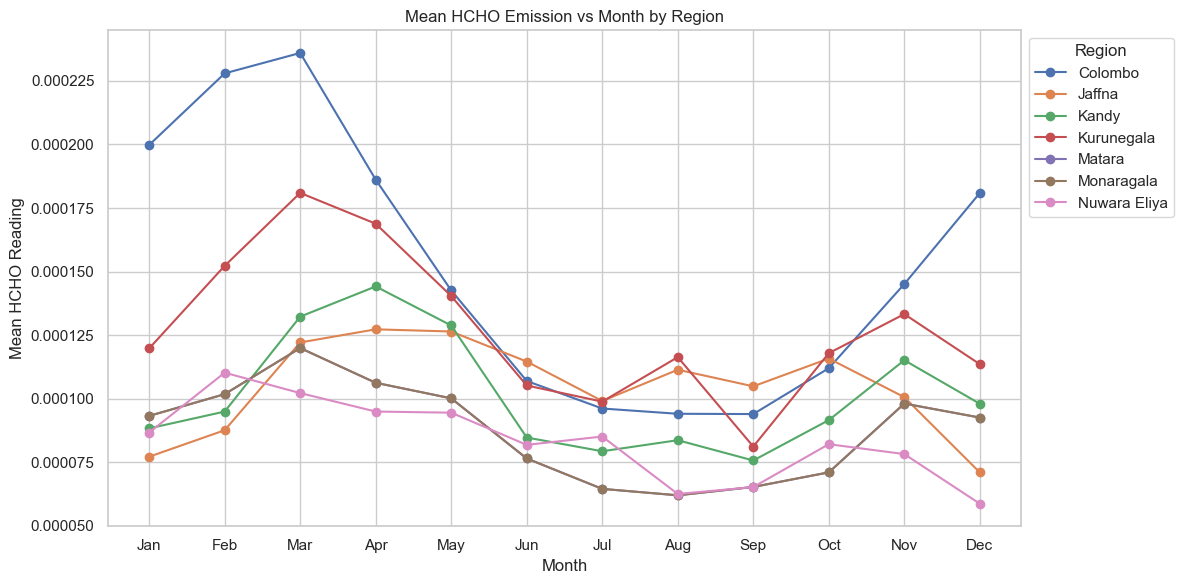

In [359]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create line plot for mean HCHO emission rates
plt.figure(figsize=(12, 6))
for region, data in monthly_mean_data.groupby('Region'):
    plt.plot(data['Month'], data['HCHO reading'], marker='o', label=region)

plt.title('Mean HCHO Emission vs Month by Region')
plt.xlabel('Month')
plt.ylabel('Mean HCHO Reading')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()